In [ ]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To tune model, get different metric scores, and split data
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
)
from sklearn import metrics

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To impute missing values
from sklearn.impute import SimpleImputer

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To do hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# To be used for creating pipelines and personalizing them
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier

# To suppress scientific notations
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To suppress warnings
import warnings

warnings.filterwarnings("ignore")

# This will help in making the Python code more structured automatically (good coding practice)
#%load_ext nb_black

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_data = pd.read_csv("/content/drive/MyDrive/Python Course/Hackathons/NBFC Loan Default/Train_set_(1)_(1).csv")
test_data = pd.read_csv("/content/drive/MyDrive/Python Course/Hackathons/NBFC Loan Default/Test_set_(1)_(2).csv")

In [ ]:
train_data.shape

(93174, 23)

In [ ]:
test_data.shape

(39933, 22)

In [ ]:
df = pd.concat([train_data, test_data], ignore_index=True)

In [ ]:
df.shape

(133107, 23)

In [ ]:
data = df.copy()

In [ ]:
data.head()

ID  loan_amnt loan_term  interest_rate loan_grade loan_subgrade  \
0  72199369       9000   3 years          9.170          B            B2   
1  14257956      18000   3 years         13.650          C            C1   
2  66216451      16000   3 years          7.260          A            A4   
3  46974169      25000   3 years         13.990          C            C4   
4  46725961      17000   3 years          6.390          A            A2   

  job_experience home_ownership  annual_income income_verification_status  \
0       <5 Years            OWN      85000.000               Not Verified   
1       <5 Years            OWN      64000.000                   Verified   
2       <5 Years       MORTGAGE     150000.000            Source Verified   
3            NaN       MORTGAGE      59800.000                   Verified   
4      10+ years       MORTGAGE      72000.000            Source Verified   

         loan_purpose state_code  debt_to_income  delinq_2yrs  public_records  \
0  debt_consolidation         NC          26.680        0.000           0.000   
1  debt_consolidation         SC          31.670        0.000           1.000   
2  debt_consolidation         TX          19.700        2.000           0.000   
3  debt_consolidation         MO          37.390        0.000           0.000   
4         credit_card         TX           8.920        0.000           0.000   

   revolving_balance  total_acc  interest_receive application_type  \
0              39519     20.000            59.600       INDIVIDUAL   
1               9783     24.000          3348.250       INDIVIDUAL   
2              13641     27.000           276.690       INDIVIDUAL   
3              35020     35.000          1106.720       INDIVIDUAL   
4              23990     26.000           725.290       INDIVIDUAL   

   last_week_pay  total_current_balance  total_revolving_limit  default  
0          4.000              95493.000              84100.000    0.000  
1         95.000             185433.000              13500.000    0.000  
2         13.000             180519.000              19300.000    0.000  
3         17.000             183208.000              55400.000    0.000  
4         39.000              23990.000              81300.000    0.000

In [ ]:
data.tail()

ID  loan_amnt loan_term  interest_rate loan_grade loan_subgrade  \
133102  57779318       5000   3 years          8.180          B            B1   
133103  59742362       1800   3 years         11.530          B            B5   
133104  72657145      15200   3 years         13.440          C            C3   
133105  15220189      14425   5 years         18.920          D            D4   
133106  21810584      27000   5 years         20.200          E            E3   

       job_experience home_ownership  annual_income  \
133102      10+ years       MORTGAGE      65000.000   
133103     6-10 years       MORTGAGE      55000.000   
133104      10+ years       MORTGAGE      78000.000   
133105       <5 Years       MORTGAGE      38000.000   
133106       <5 Years       MORTGAGE      62000.000   

       income_verification_status        loan_purpose state_code  \
133102            Source Verified    home_improvement         MI   
133103            Source Verified    home_improvement         AZ   
133104               Not Verified         credit_card         TX   
133105               Not Verified         credit_card         IN   
133106            Source Verified  debt_consolidation         FL   

        debt_to_income  delinq_2yrs  public_records  revolving_balance  \
133102          13.090        0.000           5.000               6731   
133103          25.440        0.000           1.000              11092   
133104          19.400        0.000           0.000              19688   
133105          17.400        0.000           1.000              10805   
133106          24.120        1.000           0.000              17795   

        total_acc  interest_receive application_type  last_week_pay  \
133102     24.000           187.270       INDIVIDUAL         26.000   
133103     38.000            81.240       INDIVIDUAL         26.000   
133104     26.000             0.000       INDIVIDUAL            NaN   
133105     29.000          4268.800       INDIVIDUAL         96.000   
133106     17.000          7436.410       INDIVIDUAL         78.000   

        total_current_balance  total_revolving_limit  default  
133102              14422.000              26100.000      NaN  
133103             243469.000              29200.000      NaN  
133104             145370.000              45400.000      NaN  
133105             106449.000              19700.000      NaN  
133106              55787.000              33500.000      NaN

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133107 entries, 0 to 133106
Data columns (total 23 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   ID                          133107 non-null  int64  
 1   loan_amnt                   133107 non-null  int64  
 2   loan_term                   133107 non-null  object 
 3   interest_rate               133107 non-null  float64
 4   loan_grade                  133107 non-null  object 
 5   loan_subgrade               133107 non-null  object 
 6   job_experience              126316 non-null  object 
 7   home_ownership              133107 non-null  object 
 8   annual_income               133106 non-null  float64
 9   income_verification_status  133107 non-null  object 
 10  loan_purpose                133107 non-null  object 
 11  state_code                  133107 non-null  object 
 12  debt_to_income              133107 non-null  float64
 13  delinq_2yrs   

In [ ]:
data.duplicated().sum()

0

In [ ]:
data.isnull().sum()

ID                                0
loan_amnt                         0
loan_term                         0
interest_rate                     0
loan_grade                        0
loan_subgrade                     0
job_experience                 6791
home_ownership                    0
annual_income                     1
income_verification_status        0
loan_purpose                      0
state_code                        0
debt_to_income                    0
delinq_2yrs                       3
public_records                    3
revolving_balance                 0
total_acc                         3
interest_receive                  0
application_type                  0
last_week_pay                  2730
total_current_balance         10616
total_revolving_limit         10616
default                       39933
dtype: int64

In [ ]:
(data.isnull().sum() / len(data))*100

ID                            0.000
loan_amnt                     0.000
loan_term                     0.000
interest_rate                 0.000
loan_grade                    0.000
loan_subgrade                 0.000
job_experience                5.102
home_ownership                0.000
annual_income                 0.001
income_verification_status    0.000
loan_purpose                  0.000
state_code                    0.000
debt_to_income                0.000
delinq_2yrs                   0.002
public_records                0.002
revolving_balance             0.000
total_acc                     0.002
interest_receive              0.000
application_type              0.000
last_week_pay                 2.051
total_current_balance         7.976
total_revolving_limit         7.976
default                      30.001
dtype: float64

In [ ]:
data.describe().T

count         mean          std       min  \
ID                    133107.000 34978593.169 24169911.412 70735.000   
loan_amnt             133107.000    14748.299     8428.080   500.000   
interest_rate         133107.000       13.229        4.376     5.320   
annual_income         133106.000    75099.223    65850.917  1200.000   
debt_to_income        133107.000       18.126        8.541     0.000   
delinq_2yrs           133104.000        0.316        0.873     0.000   
public_records        133104.000        0.195        0.574     0.000   
revolving_balance     133107.000    16903.913    24446.908     0.000   
total_acc             133104.000       25.254       11.829     1.000   
interest_receive      133107.000     1752.508     2090.408     0.000   
last_week_pay         130377.000       58.234       44.371     0.000   
total_current_balance 122491.000   139615.363   157355.093     0.000   
total_revolving_limit 122491.000    32195.963    51925.552     0.000   
default                93174.000        0.238        0.426     0.000   

                               25%          50%          75%          max  
ID                    10799610.500 37055508.000 58540012.000 73519746.000  
loan_amnt                 8000.000    13000.000    20000.000    35000.000  
interest_rate                9.990       12.990       16.200       28.990  
annual_income            45000.000    64800.000    90000.000  9500000.000  
debt_to_income              11.940       17.630       23.890      672.520  
delinq_2yrs                  0.000        0.000        0.000       22.000  
public_records               0.000        0.000        0.000       49.000  
revolving_balance         6447.000    11886.000    20802.500  2568995.000  
total_acc                   17.000       24.000       32.000      119.000  
interest_receive           440.190     1072.590     2231.460    23172.310  
last_week_pay               22.000       48.000       83.000      291.000  
total_current_balance    29686.500    79762.000   207876.000  8000078.000  
total_revolving_limit    14000.000    23700.000    39800.000  9999999.000  
default                      0.000        0.000        0.000        1.000

In [ ]:
data.describe(include=object).T

count unique                 top    freq
loan_term                   133107      2             3 years   93321
loan_grade                  133107      7                   B   38416
loan_subgrade               133107     35                  B3    8426
job_experience              126316      3            <5 Years   57900
home_ownership              133107      5            MORTGAGE   66453
income_verification_status  133107      3     Source Verified   49267
loan_purpose                133107      4  debt_consolidation   78714
state_code                  133107     50                  CA   19675
application_type            133107      2          INDIVIDUAL  133027

In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# Making a list of all catrgorical variables
cat_col = list(data.select_dtypes("object").columns)

# Printing number of count of each unique value in each column
for column in cat_col:
    print(data[column].value_counts())
    print("-" * 50)

3 years    93321
5 years    39786
Name: loan_term, dtype: int64
--------------------------------------------------
B    38416
C    36735
A    22298
D    20952
E    10536
F     3374
G      796
Name: loan_grade, dtype: int64
--------------------------------------------------
B3    8426
B4    8398
C1    7879
C2    7850
C3    7490
B2    7375
B5    7342
C4    7266
B1    6875
A5    6792
C5    6250
D1    5292
A4    5190
D2    4612
D3    3934
D4    3858
A3    3524
A1    3444
A2    3348
D5    3256
E1    2727
E2    2491
E3    2165
E4    1747
E5    1406
F1    1057
F2     799
F3     660
F4     502
F5     356
G1     245
G2     218
G3     151
G5      97
G4      85
Name: loan_subgrade, dtype: int64
--------------------------------------------------
<5 Years      57900
10+ years     43508
6-10 years    24908
Name: job_experience, dtype: int64
--------------------------------------------------
MORTGAGE    66453
RENT        53387
OWN         13233
OTHER          24
NONE           10
Name: home_ownership

In [ ]:
# Define the mapping of values to replace
replacement_map = {
    '3 years': 3,
    '5 years': 5
}

# Replace values in the 'loan_term' column
data['loan_term'] = data['loan_term'].replace(replacement_map)

# Convert the 'loan_term' column to numerical type
data['loan_term'] = pd.to_numeric(data['loan_term'])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133107 entries, 0 to 133106
Data columns (total 23 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   ID                          133107 non-null  int64  
 1   loan_amnt                   133107 non-null  int64  
 2   loan_term                   133107 non-null  int64  
 3   interest_rate               133107 non-null  float64
 4   loan_grade                  133107 non-null  object 
 5   loan_subgrade               133107 non-null  object 
 6   job_experience              126316 non-null  object 
 7   home_ownership              133107 non-null  object 
 8   annual_income               133106 non-null  float64
 9   income_verification_status  133107 non-null  object 
 10  loan_purpose                133107 non-null  object 
 11  state_code                  133107 non-null  object 
 12  debt_to_income              133107 non-null  float64
 13  delinq_2yrs   

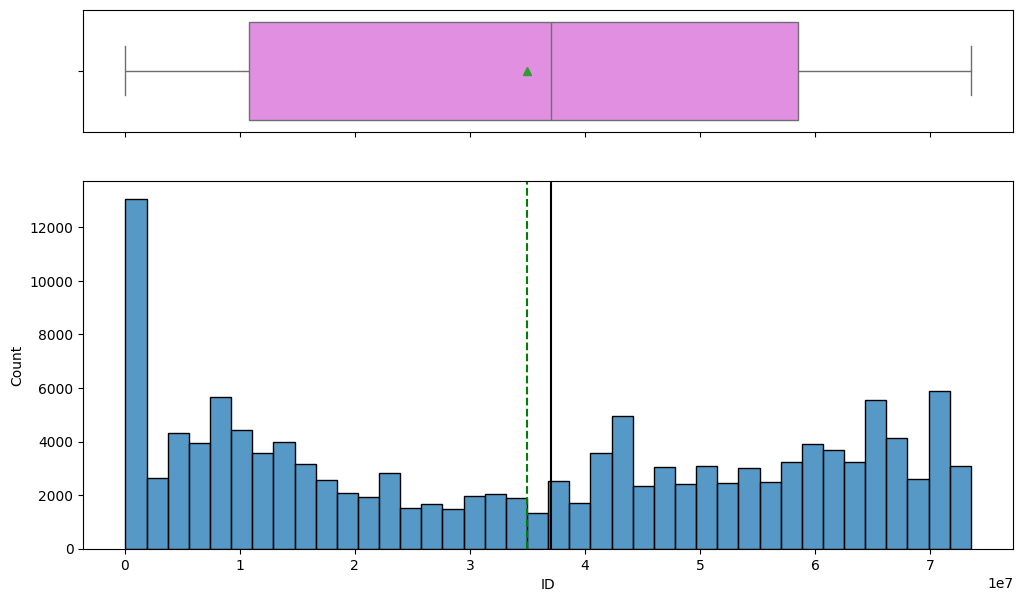

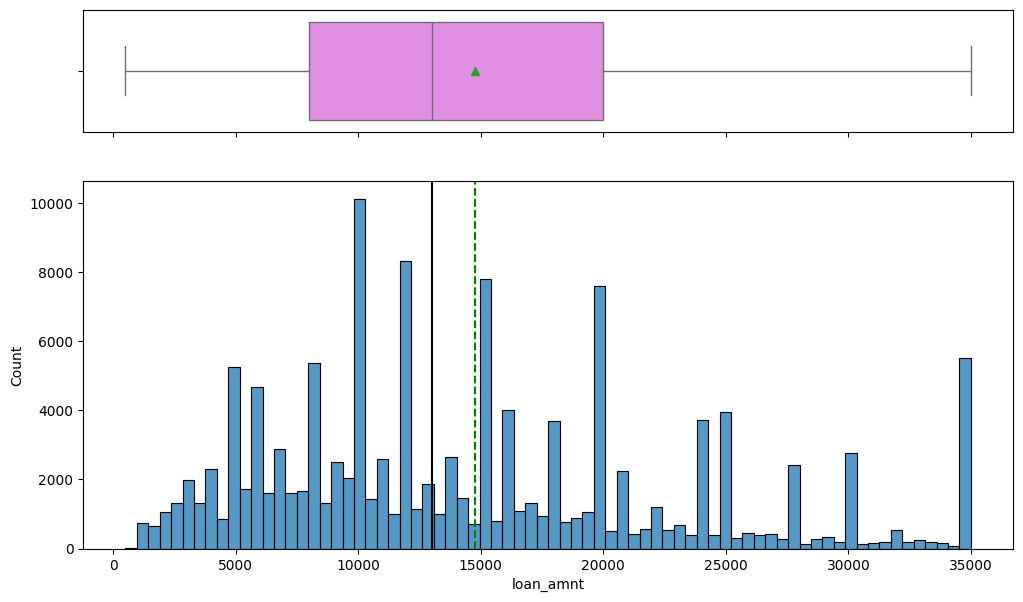

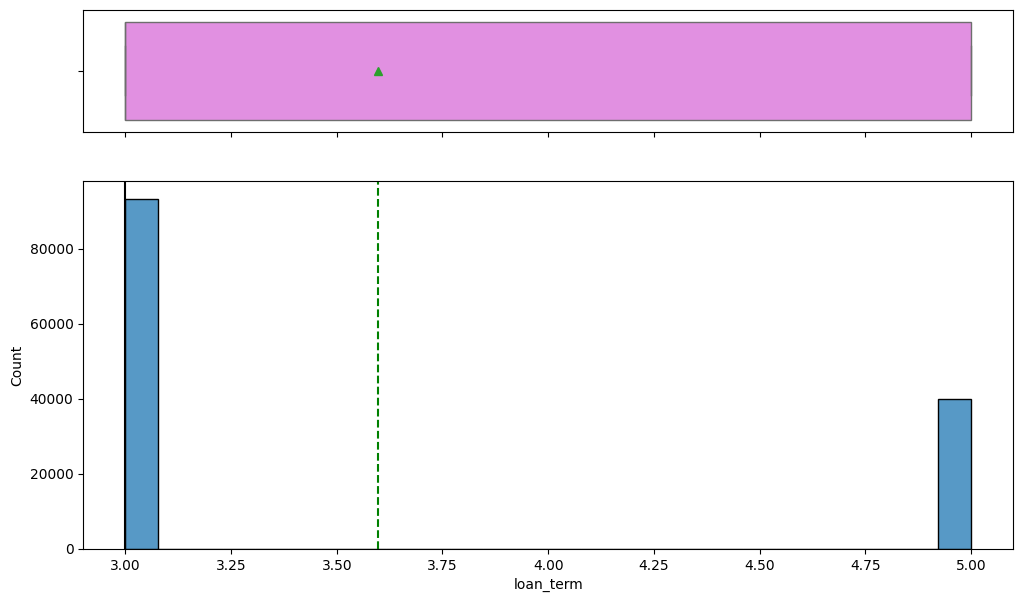

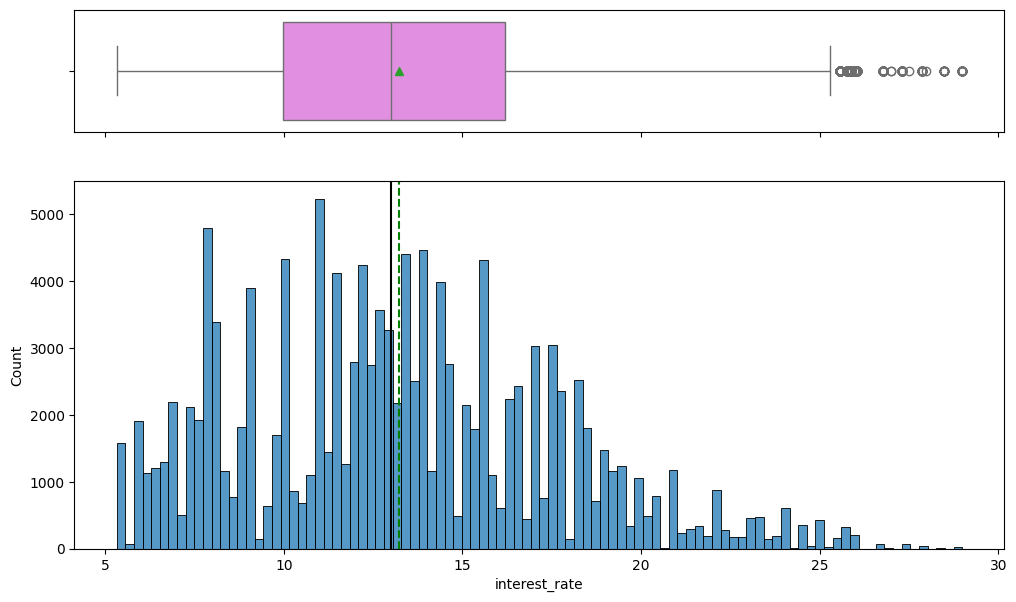

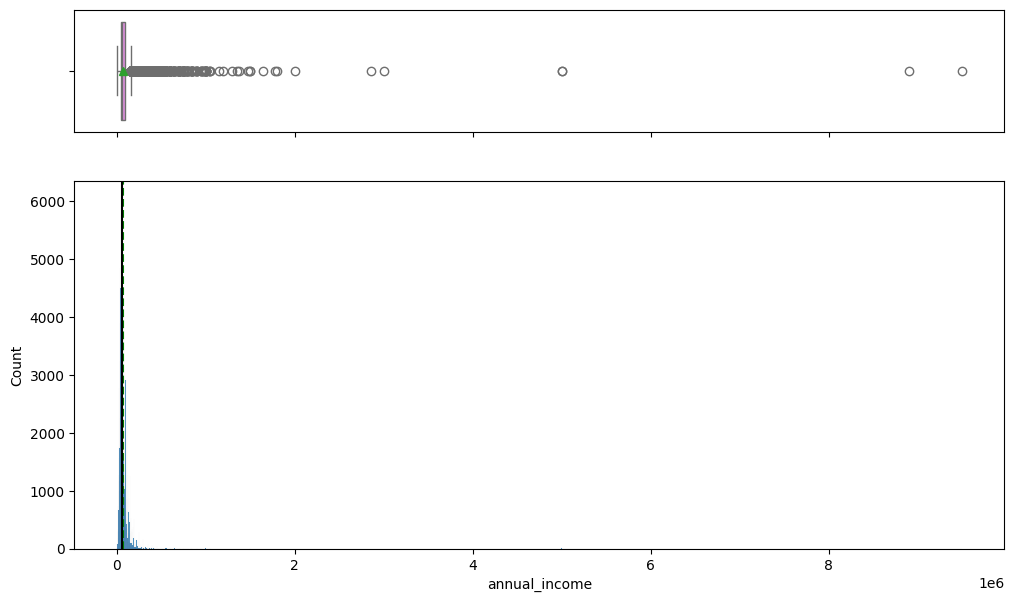

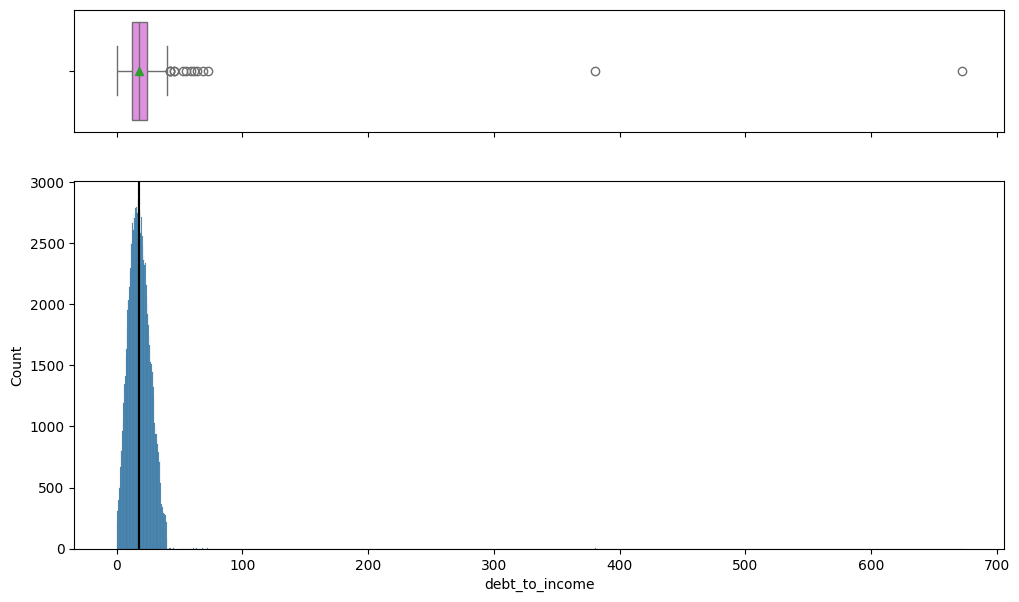

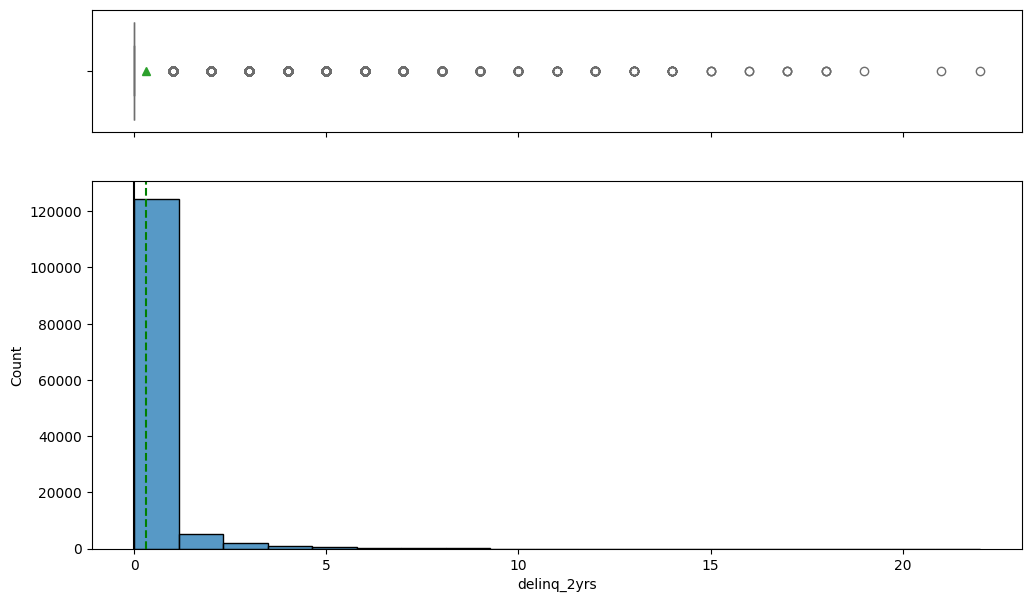

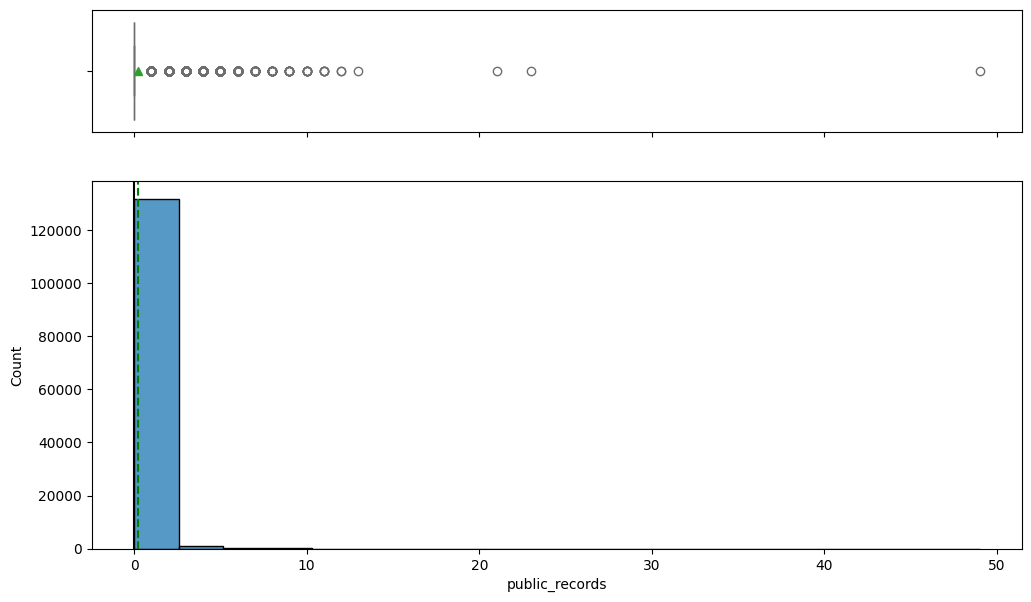

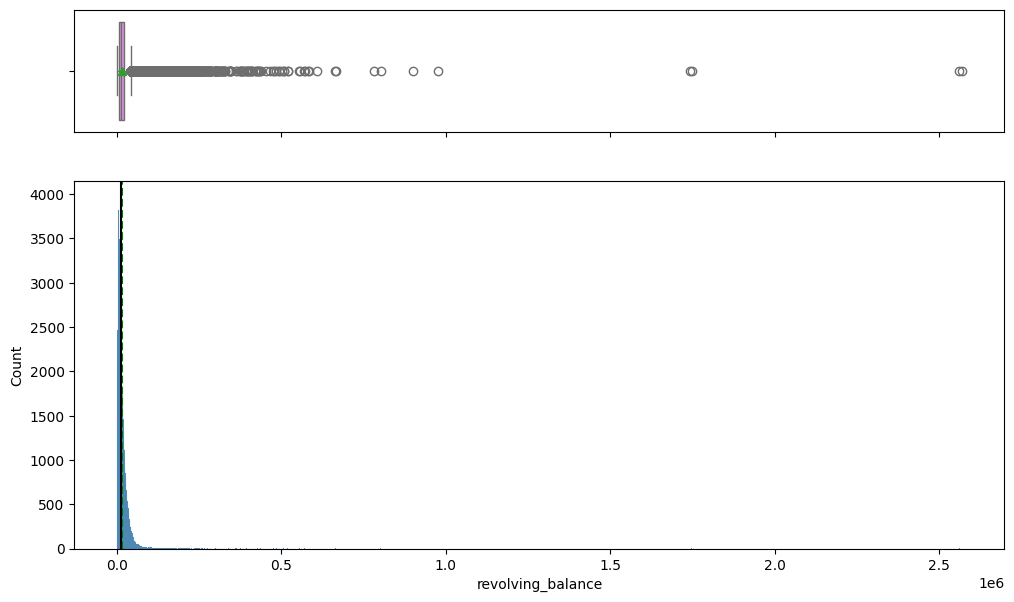

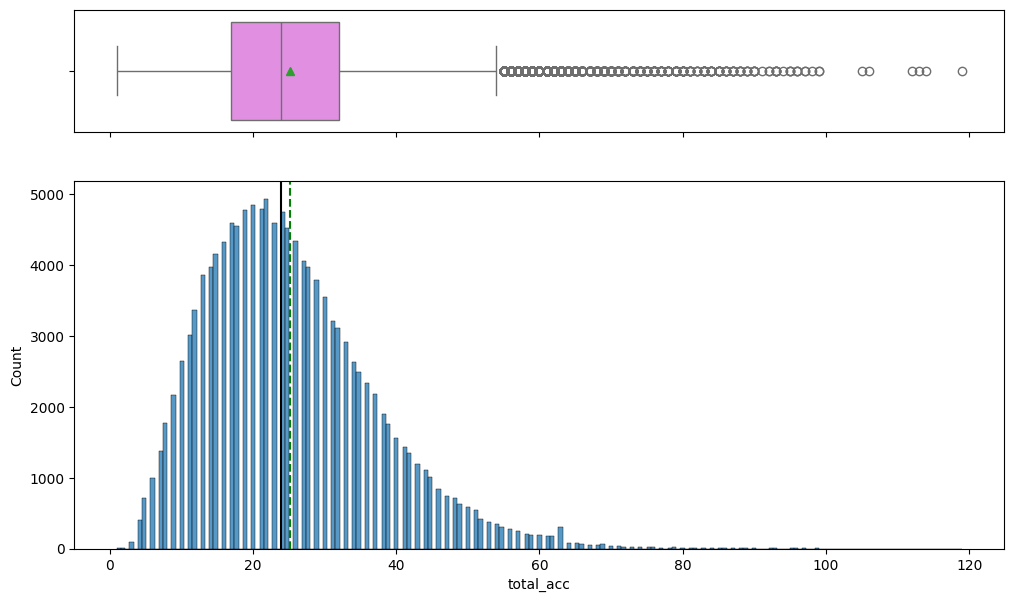

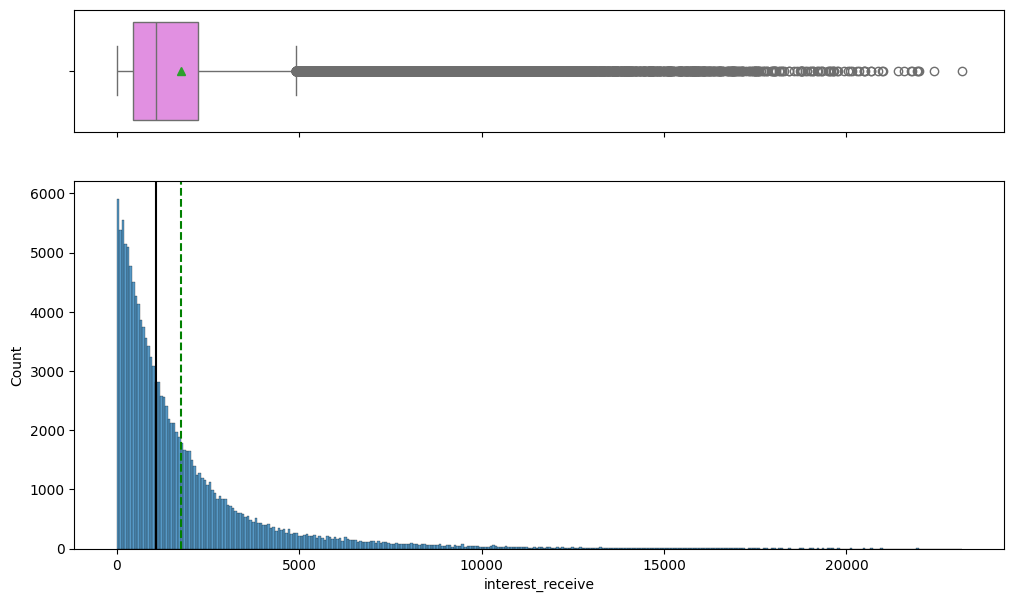

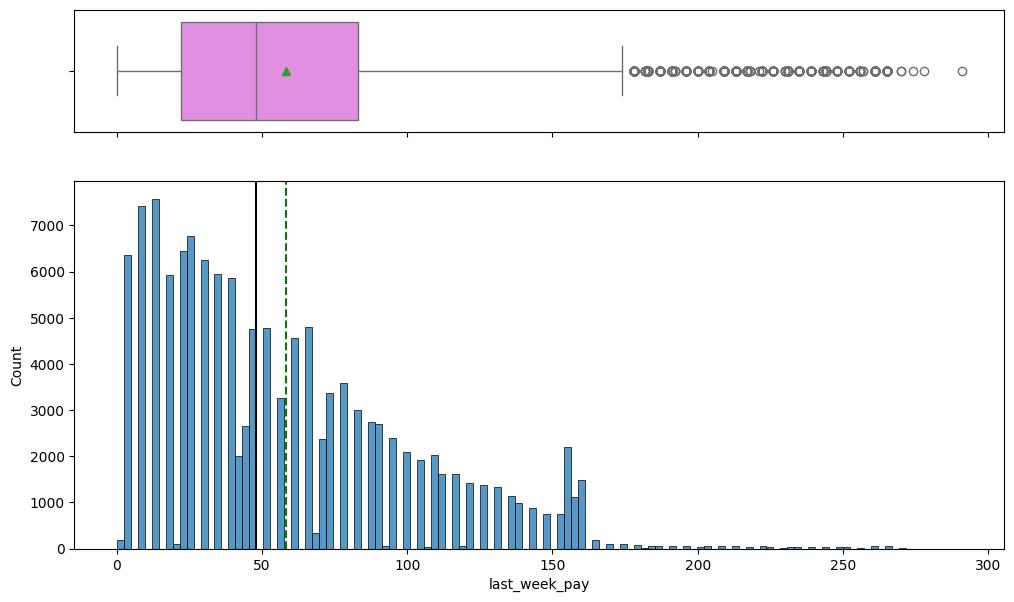

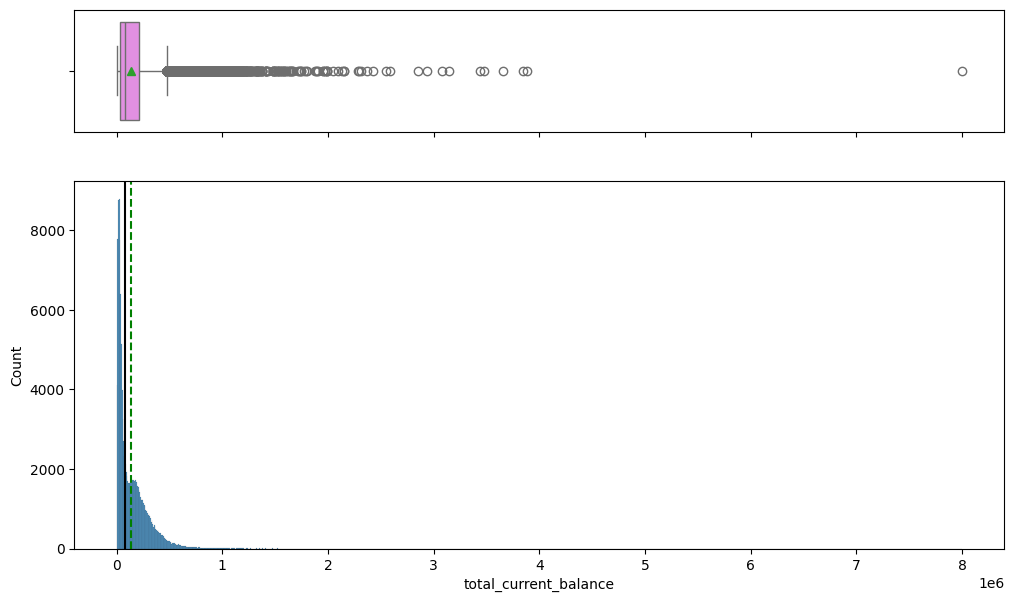

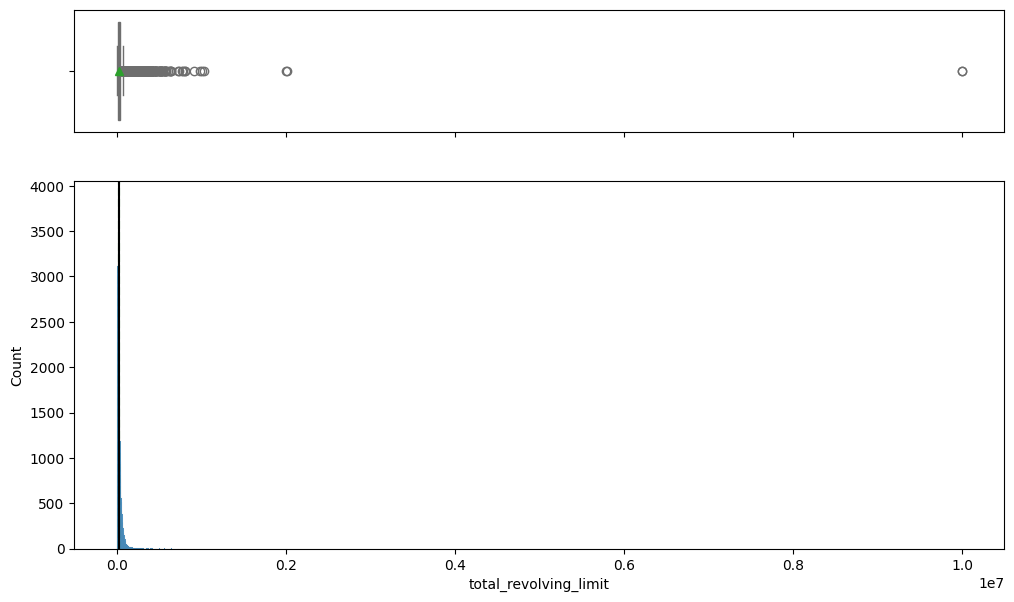

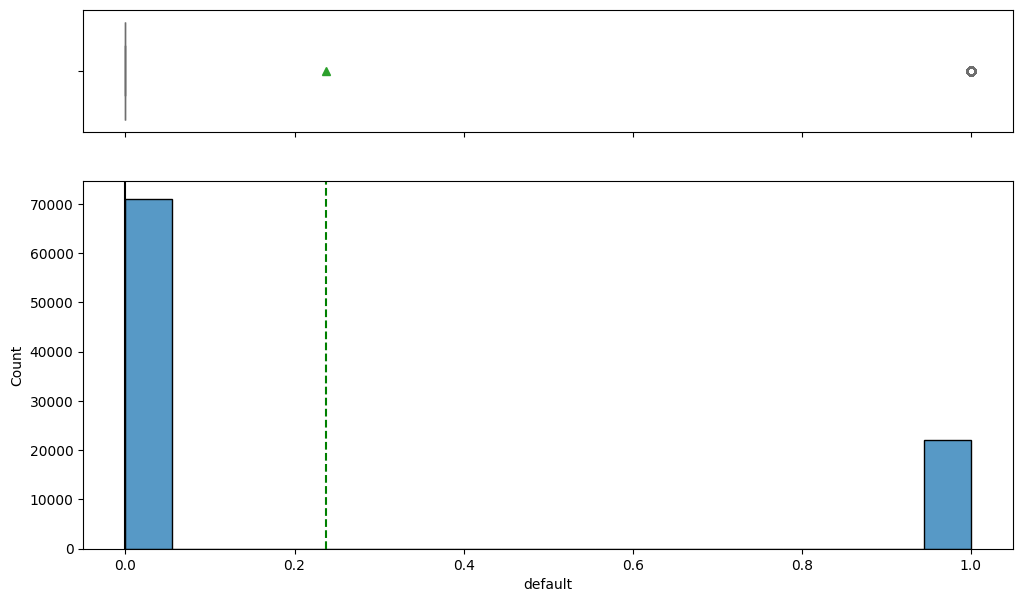

In [ ]:
for feature in data.select_dtypes(include=['number']).columns:
    histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None)

In [ ]:

# Get distinct counts
distinct_counts = data.nunique()

# Get number of null values in each column
null_values = data.isnull().sum()

# Get data types of each column
data_types = data.dtypes


# Create a new DataFrame combining distinct counts, null values, and data types
result_data = pd.DataFrame({
    'distinct_counts': distinct_counts,
    'null_values_count': null_values,
    'data_type': data_types
})
print(result_data)

                            distinct_counts  null_values_count data_type
ID                                   133107                  0     int64
loan_amnt                              1342                  0     int64
loan_term                                 2                  0     int64
interest_rate                           501                  0   float64
loan_grade                                7                  0    object
loan_subgrade                            35                  0    object
job_experience                            3               6791    object
home_ownership                            5                  0    object
annual_income                         11499                  1   float64
income_verification_status                3                  0    object
loan_purpose                              4                  0    object
state_code                               50                  0    object
debt_to_income                         4008        

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [ ]:
select_columns_train=["loan_term","loan_grade","loan_subgrade","job_experience","home_ownership","income_verification_status","loan_purpose","state_code","delinq_2yrs","public_records","total_acc","application_type","last_week_pay","default"]

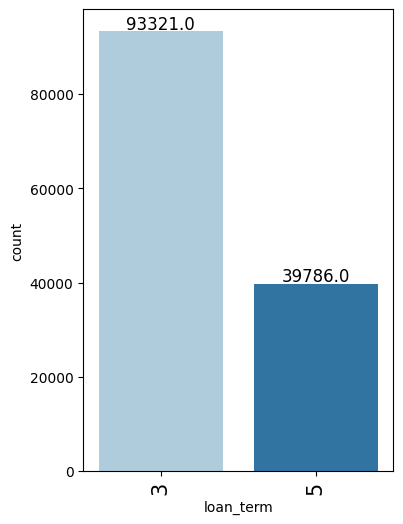

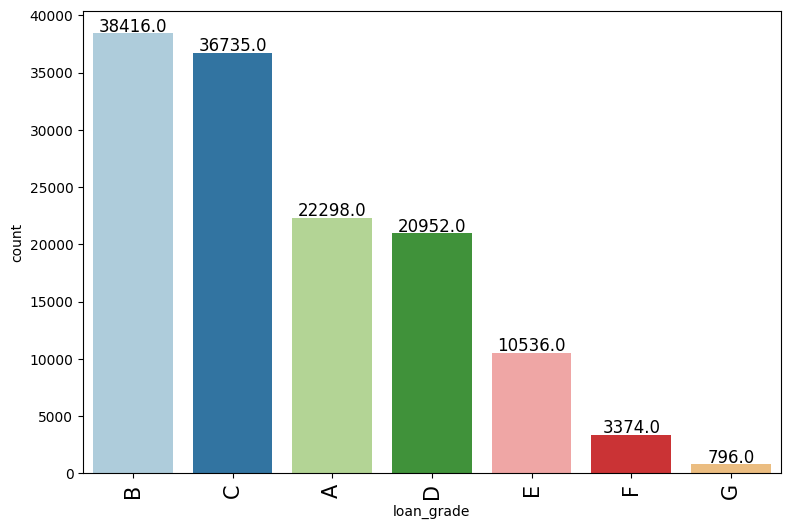

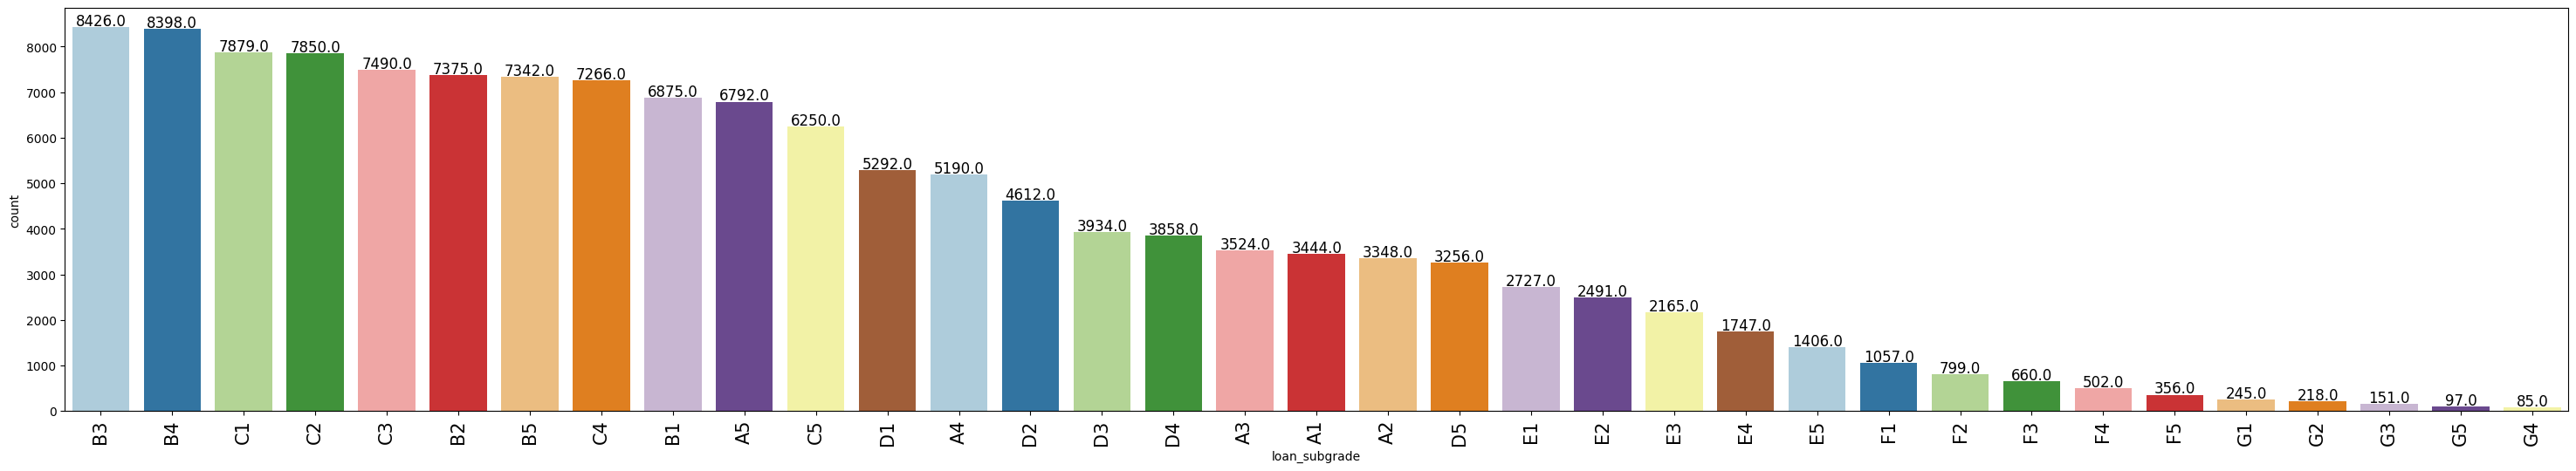

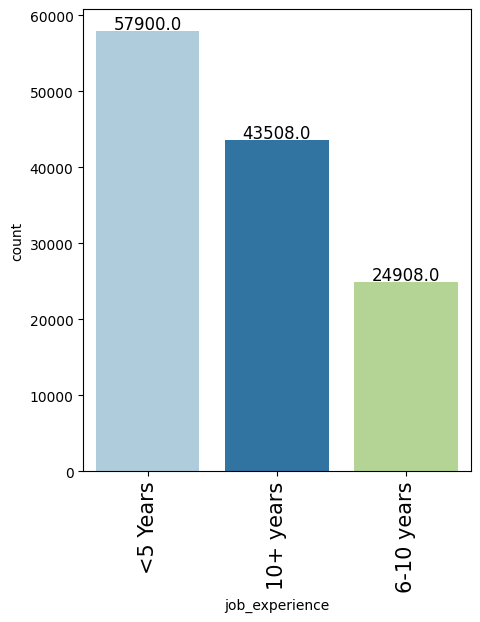

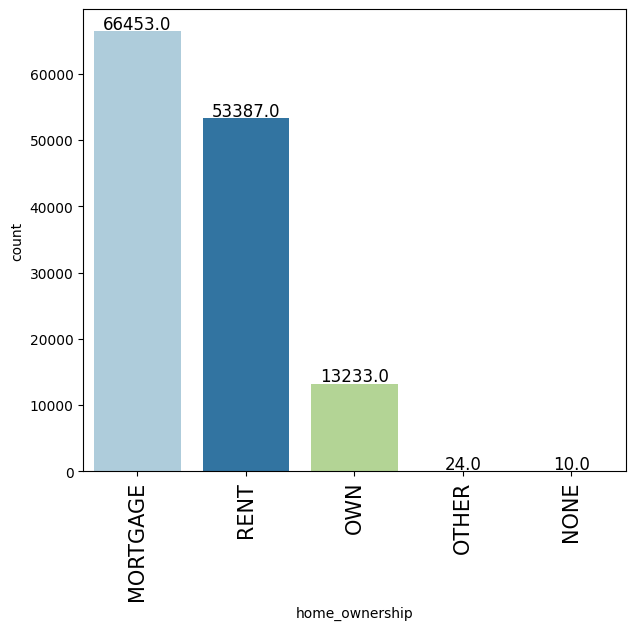

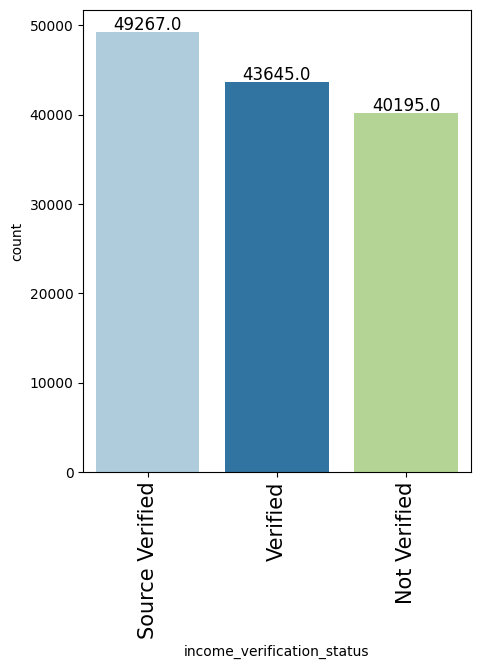

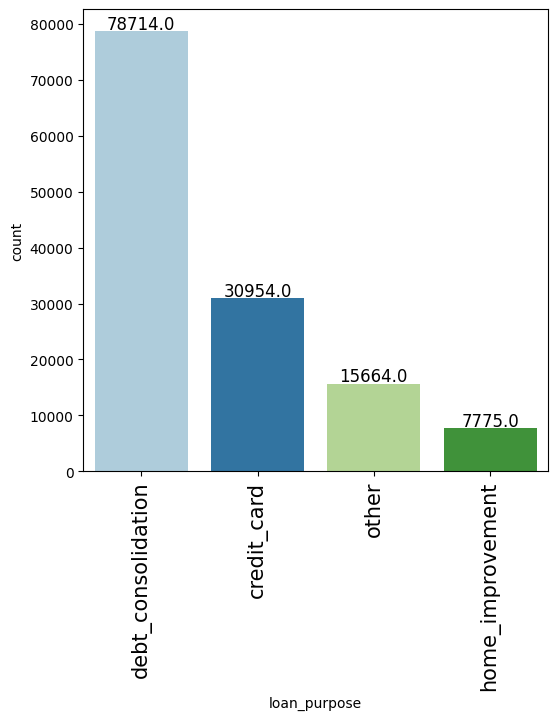

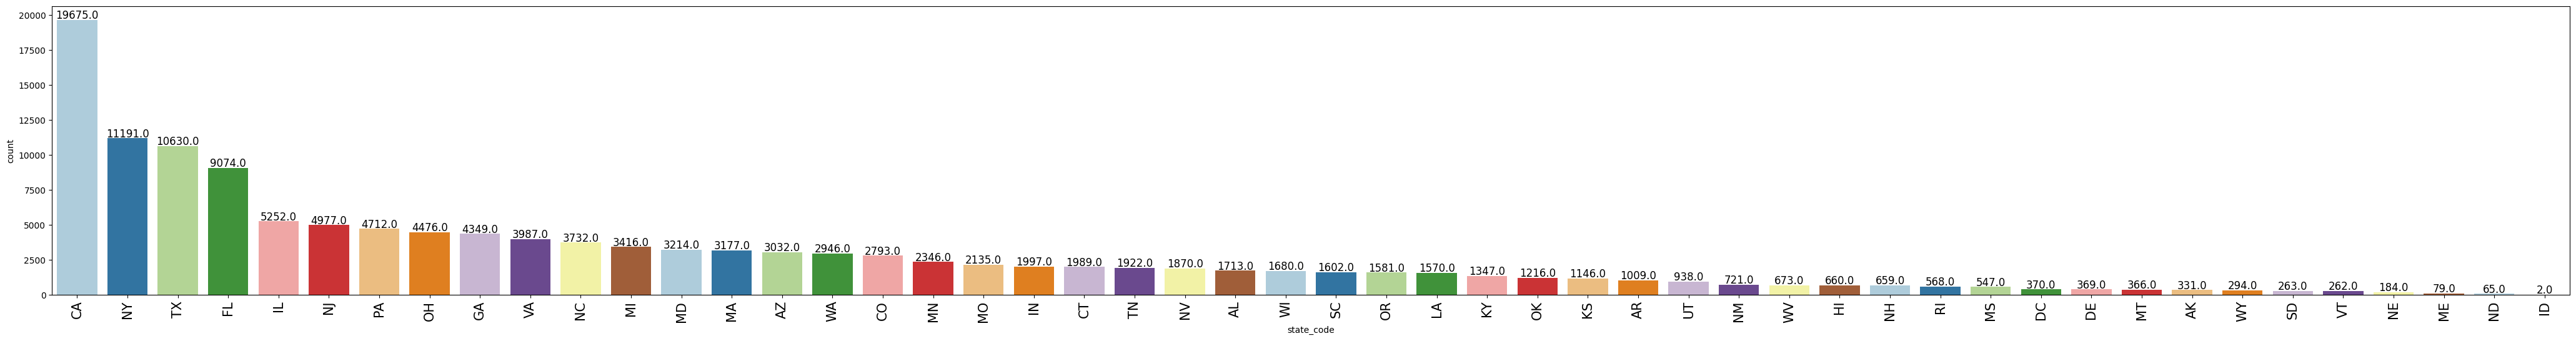

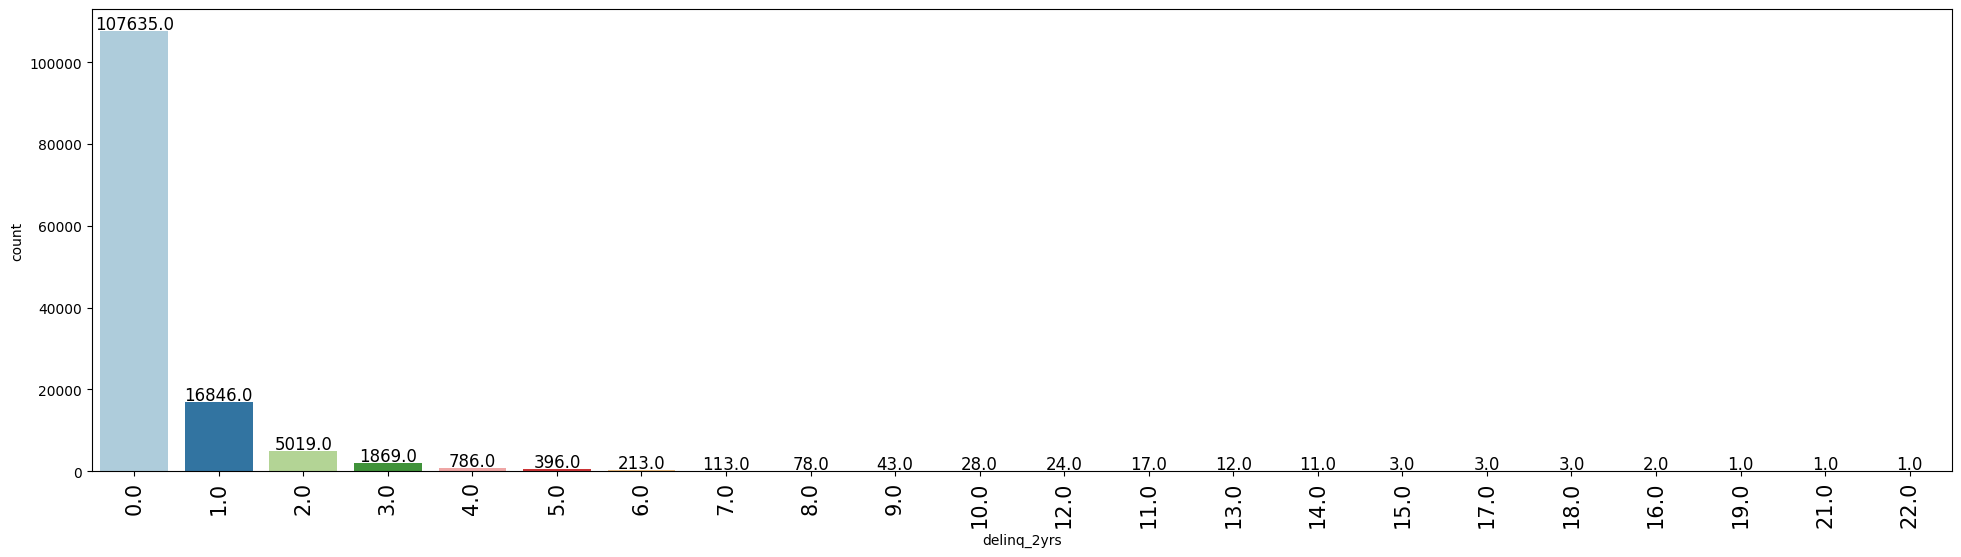

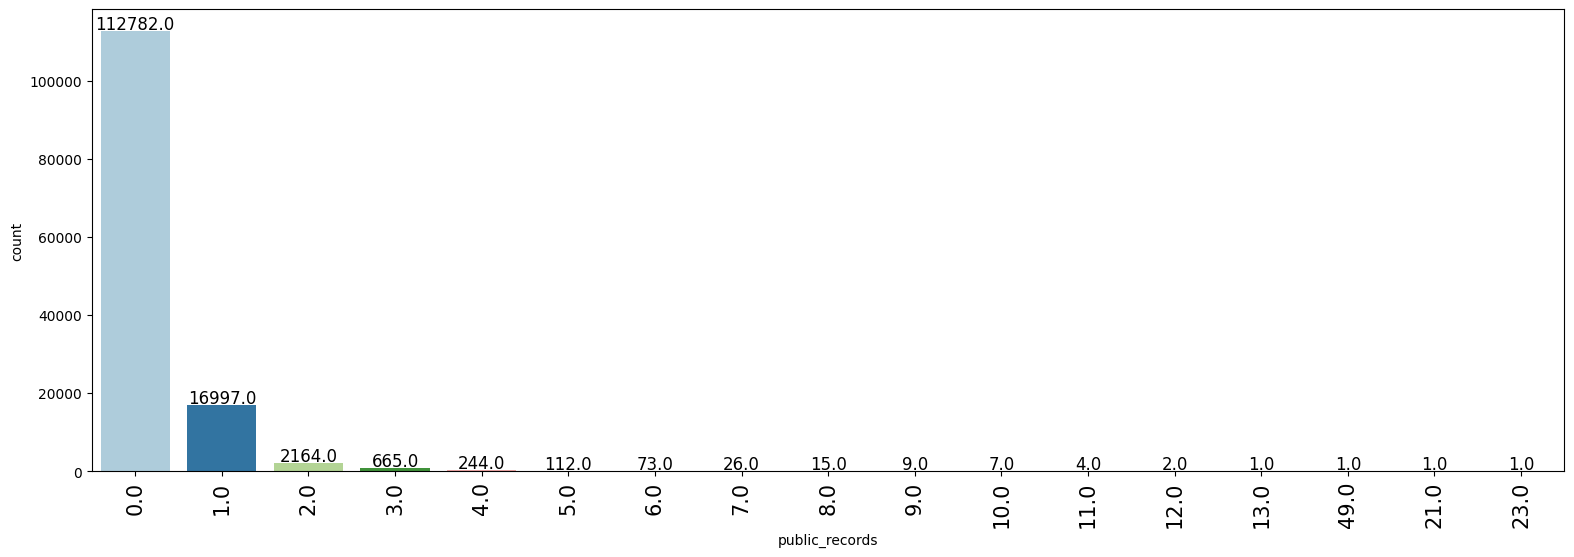

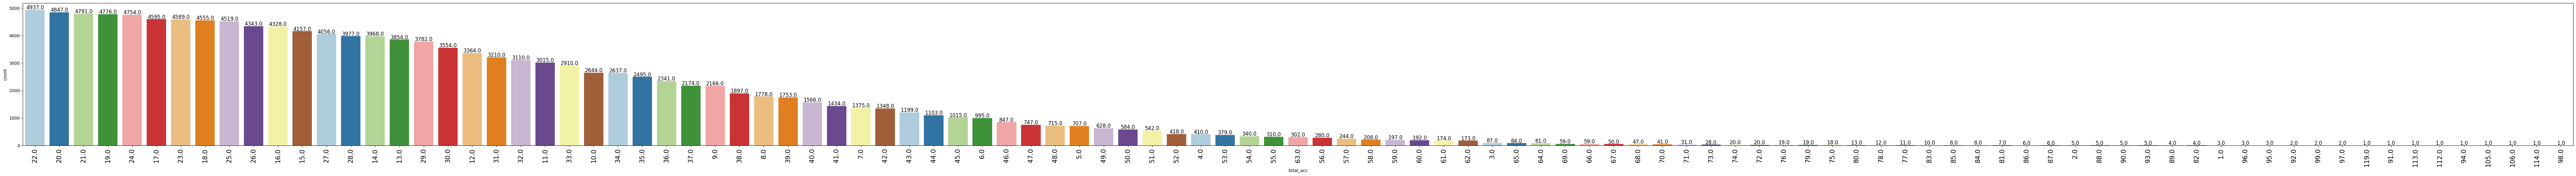

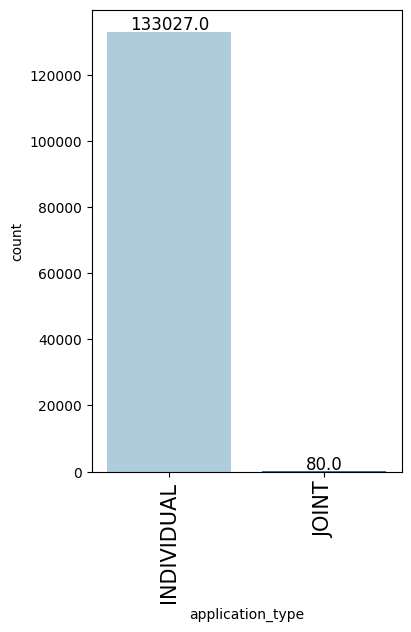

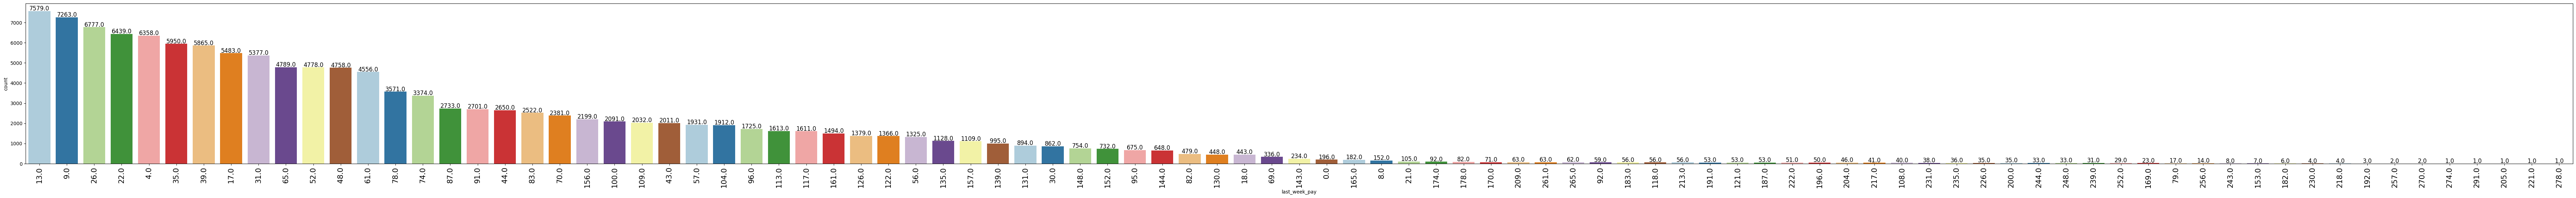

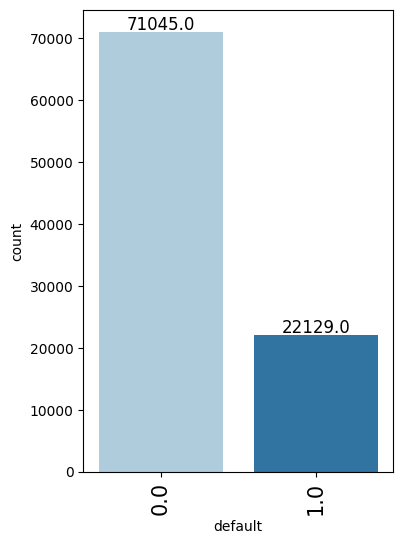

In [ ]:
for feature in select_columns_train:
    labeled_barplot(data, feature)

In [ ]:
select_columns=["total_acc","last_week_pay"]

In [ ]:
# Printing number of count of each unique value in each column
for column in select_columns:
    print(data[column].value_counts())
    print("-" * 50)

22.000     4937
20.000     4847
21.000     4791
19.000     4776
24.000     4754
17.000     4595
23.000     4589
18.000     4555
25.000     4519
26.000     4343
16.000     4328
15.000     4157
27.000     4056
28.000     3977
14.000     3968
13.000     3854
29.000     3782
30.000     3554
12.000     3364
31.000     3210
32.000     3110
11.000     3015
33.000     2910
10.000     2644
34.000     2637
35.000     2495
36.000     2341
37.000     2174
9.000      2166
38.000     1897
8.000      1778
39.000     1753
40.000     1566
41.000     1434
7.000      1375
42.000     1348
43.000     1199
44.000     1103
45.000     1015
6.000       995
46.000      847
47.000      747
48.000      715
5.000       707
49.000      628
50.000      584
51.000      542
52.000      418
4.000       410
53.000      379
54.000      340
55.000      310
63.000      302
56.000      280
57.000      244
58.000      208
59.000      197
60.000      192
61.000      174
62.000      173
3.000        87
65.000       84
64.000  

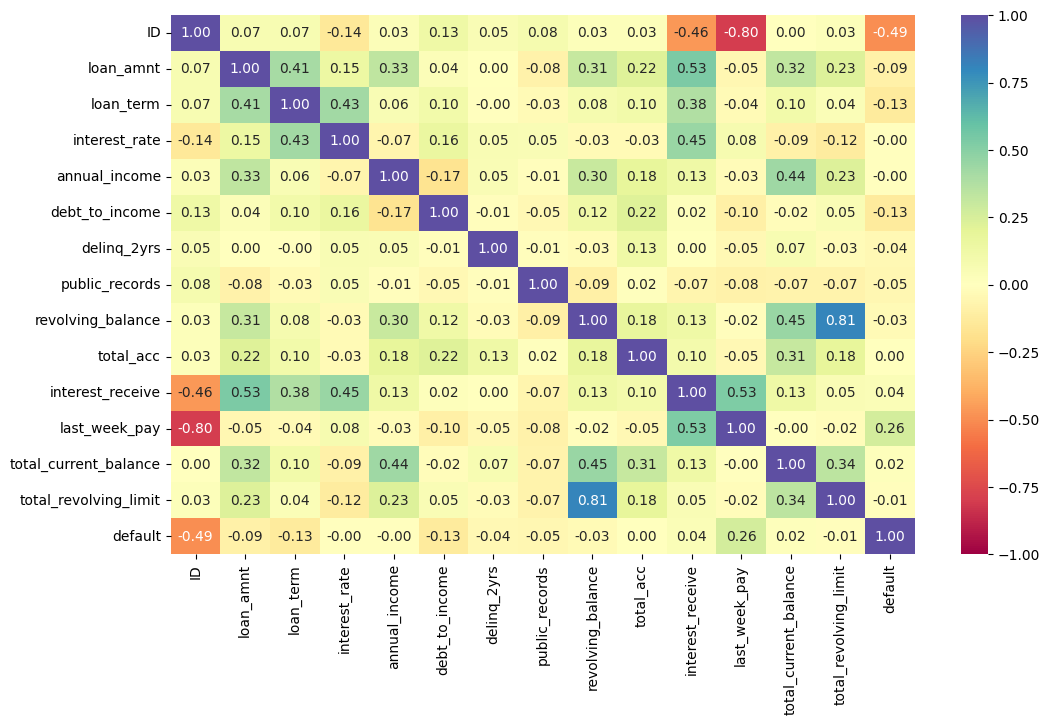

In [ ]:
cols_list = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(12, 7))
sns.heatmap(
    data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

In [ ]:
#sns.pairplot(data, diag_kind='kde')

In [ ]:
#sns.pairplot(data_test, diag_kind='kde')

In [ ]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

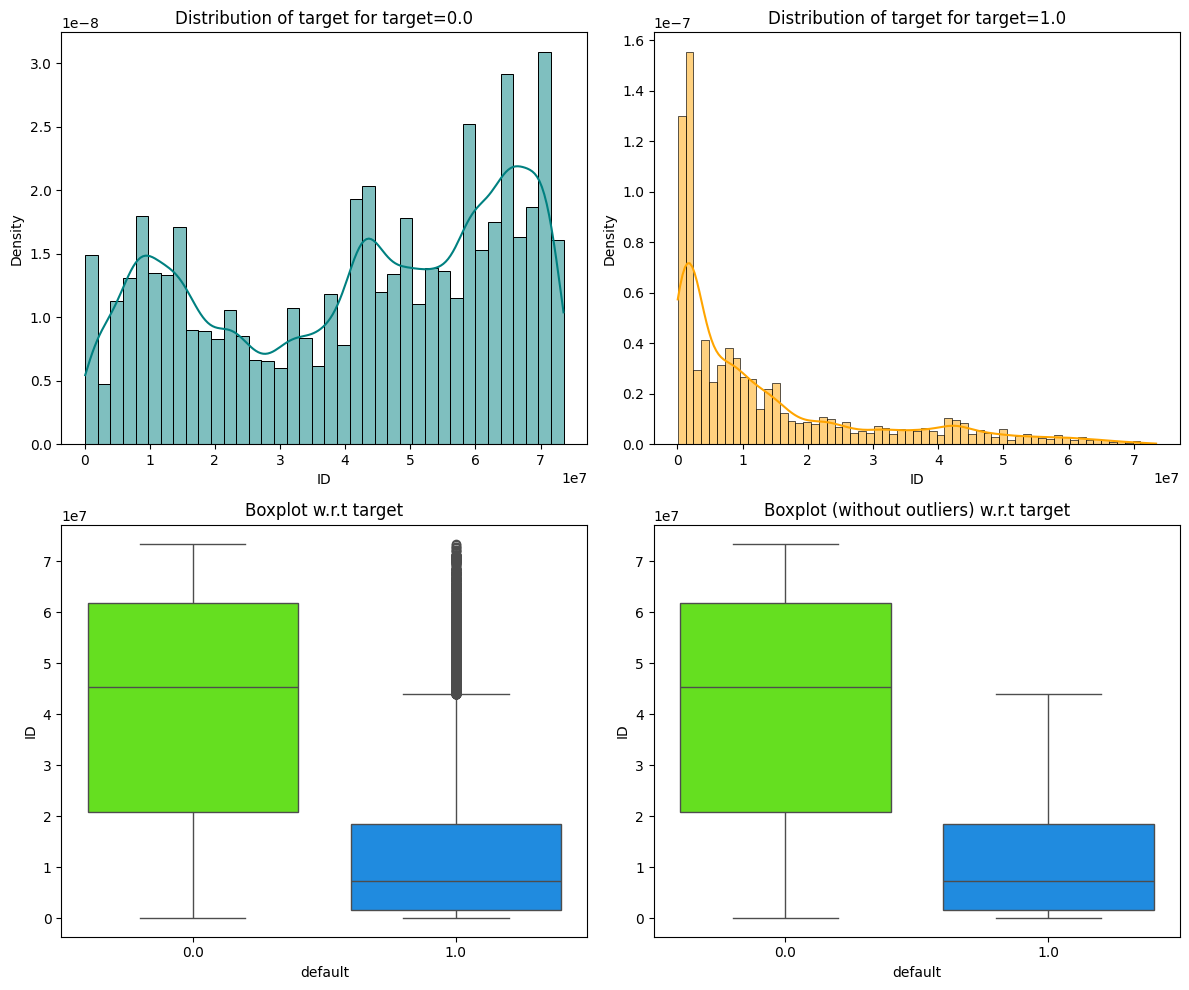

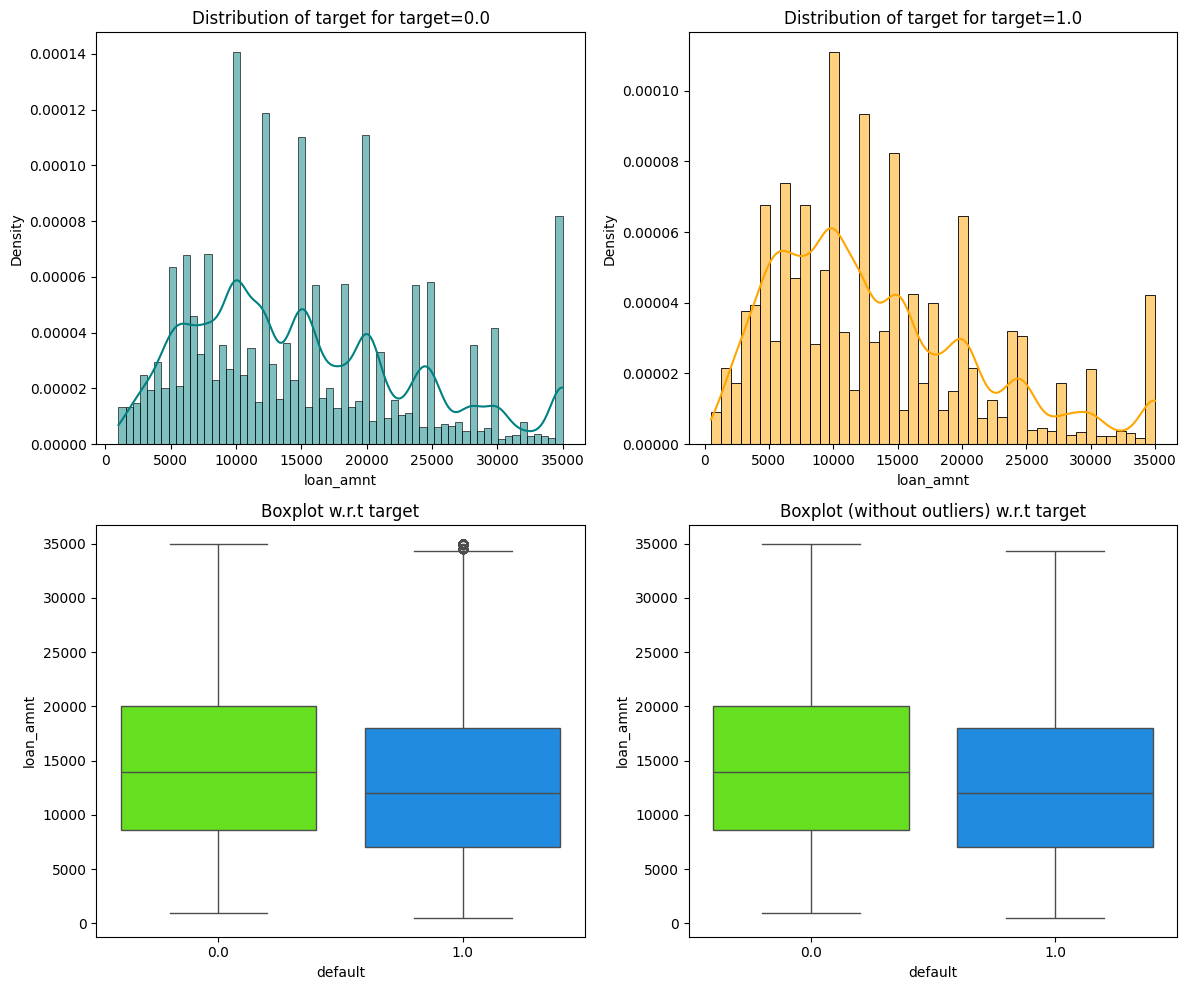

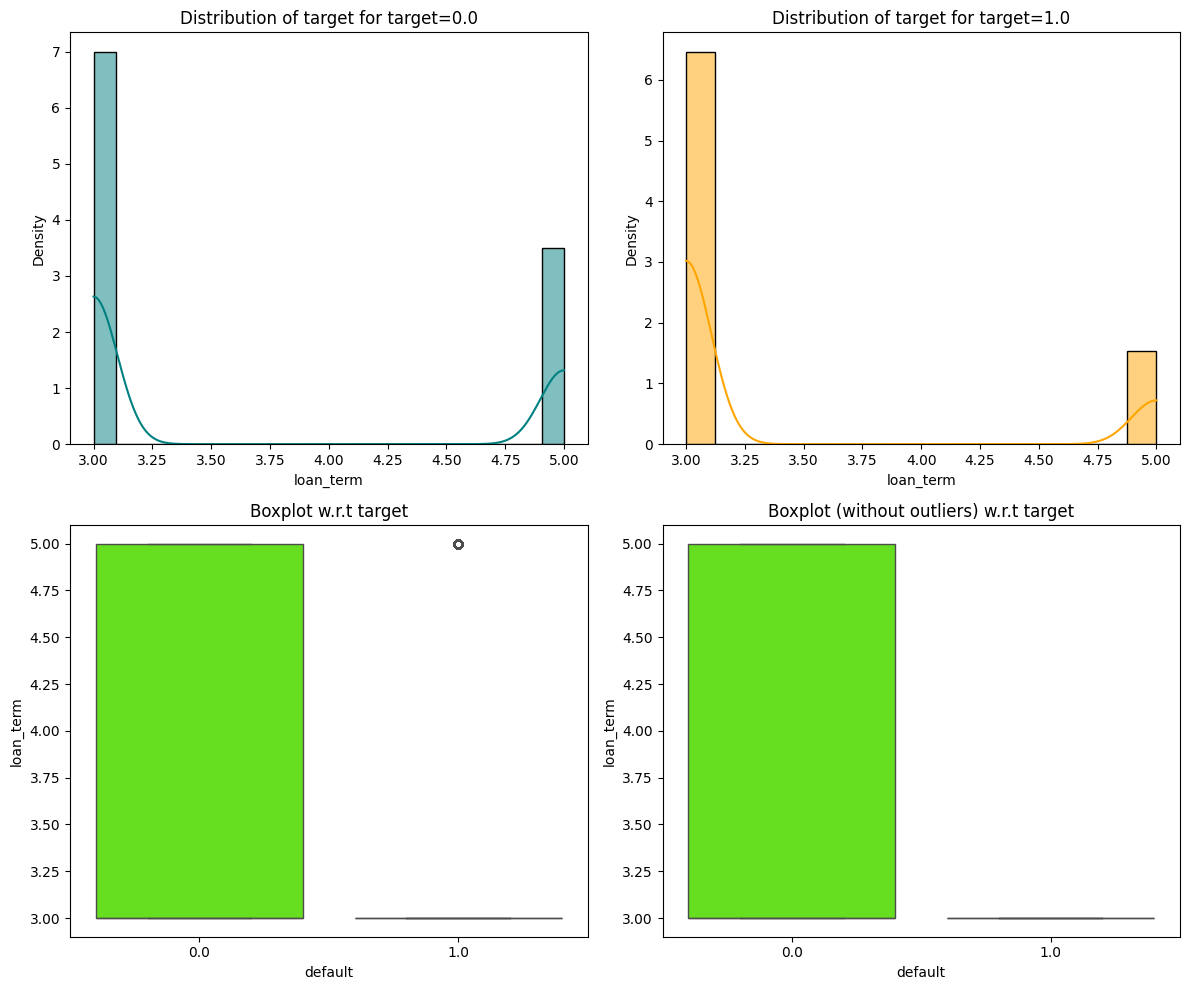

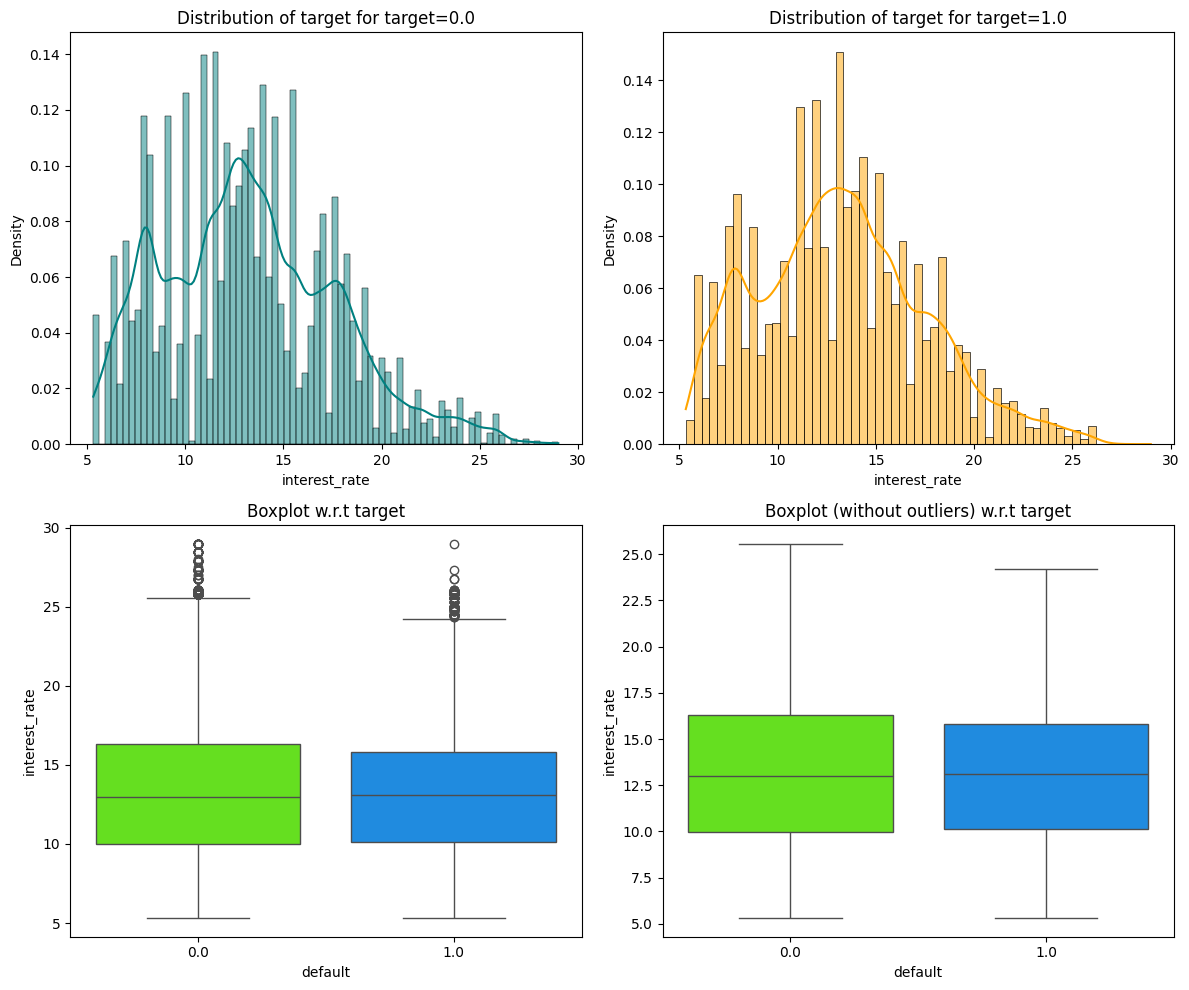

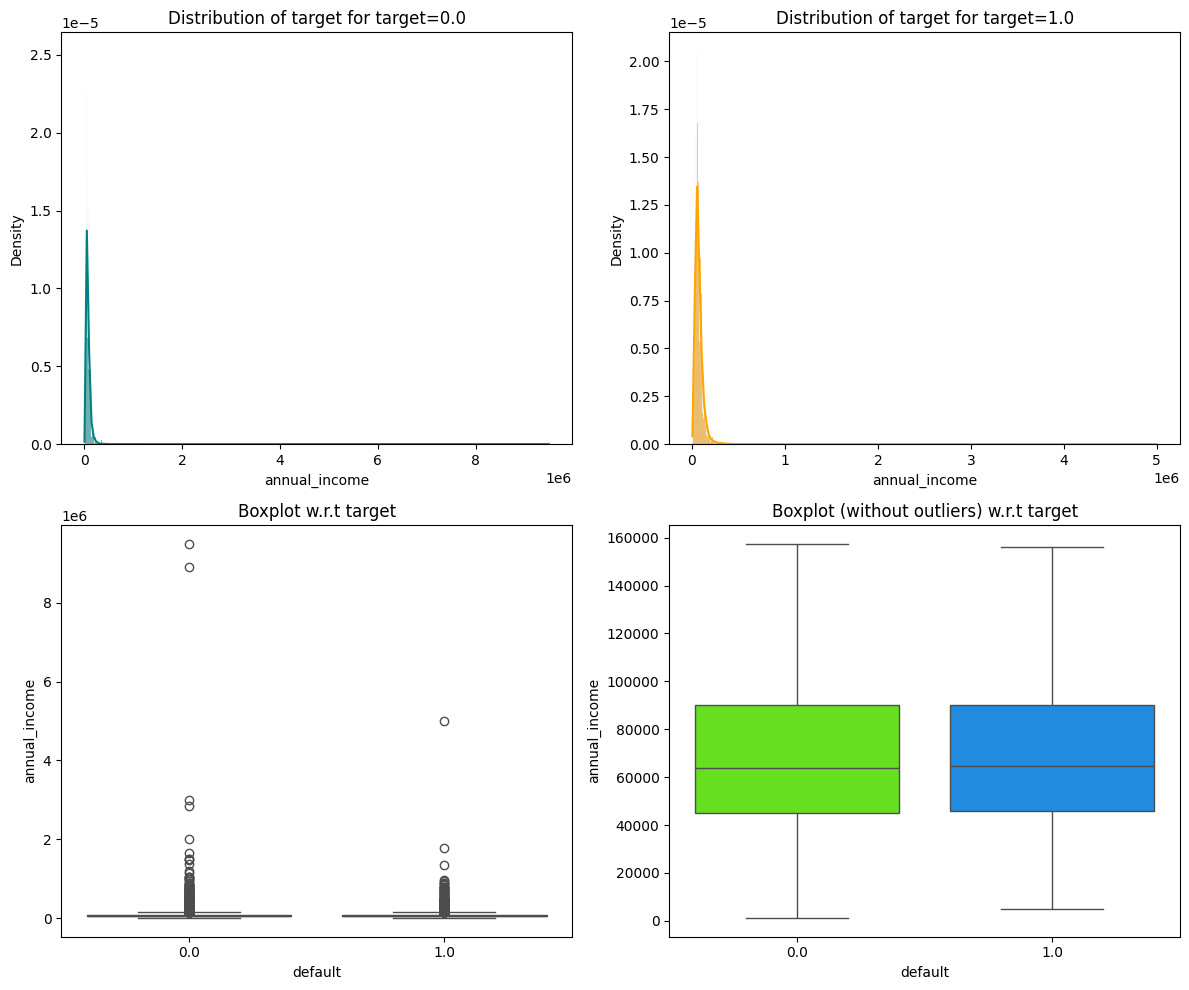

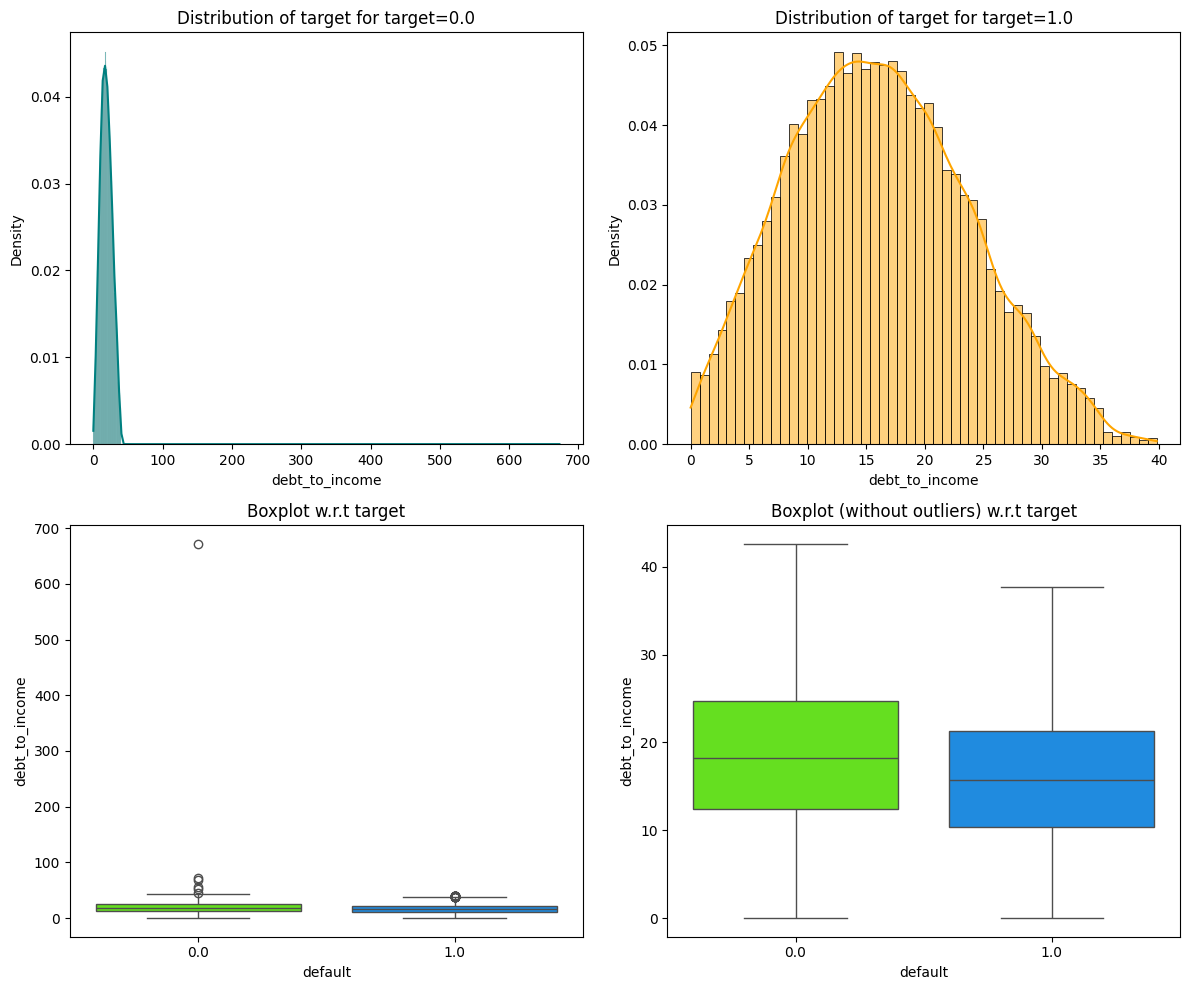

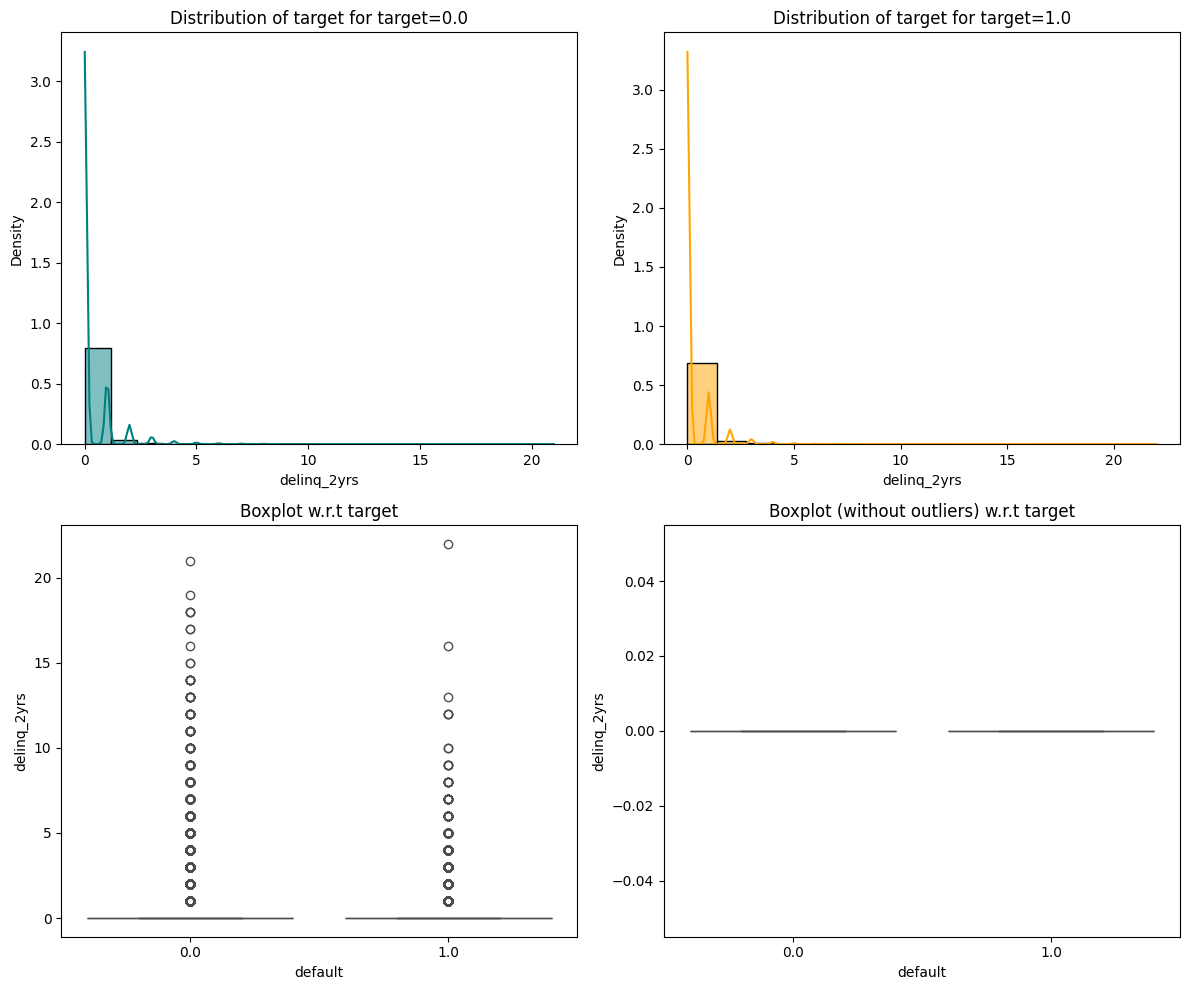

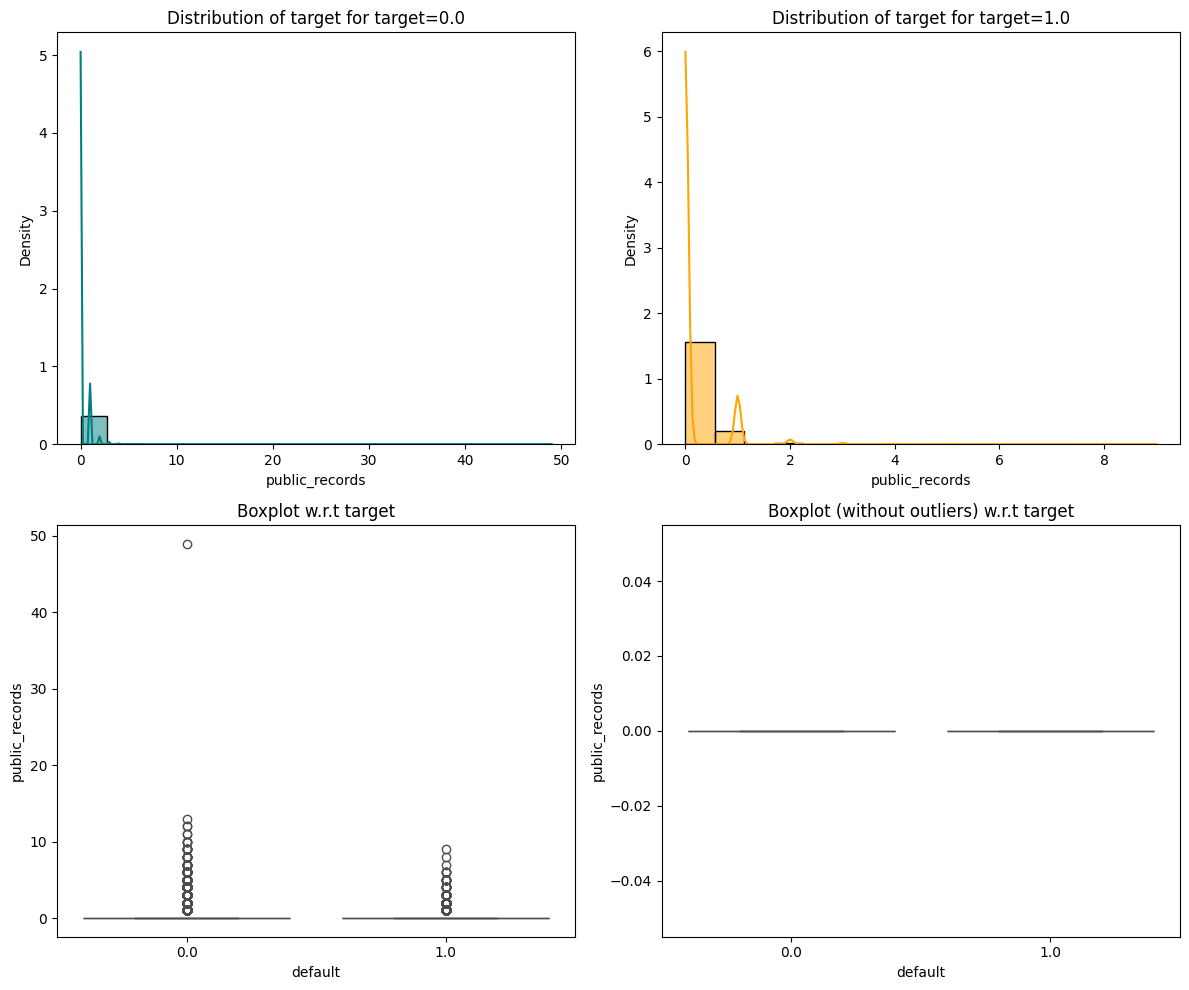

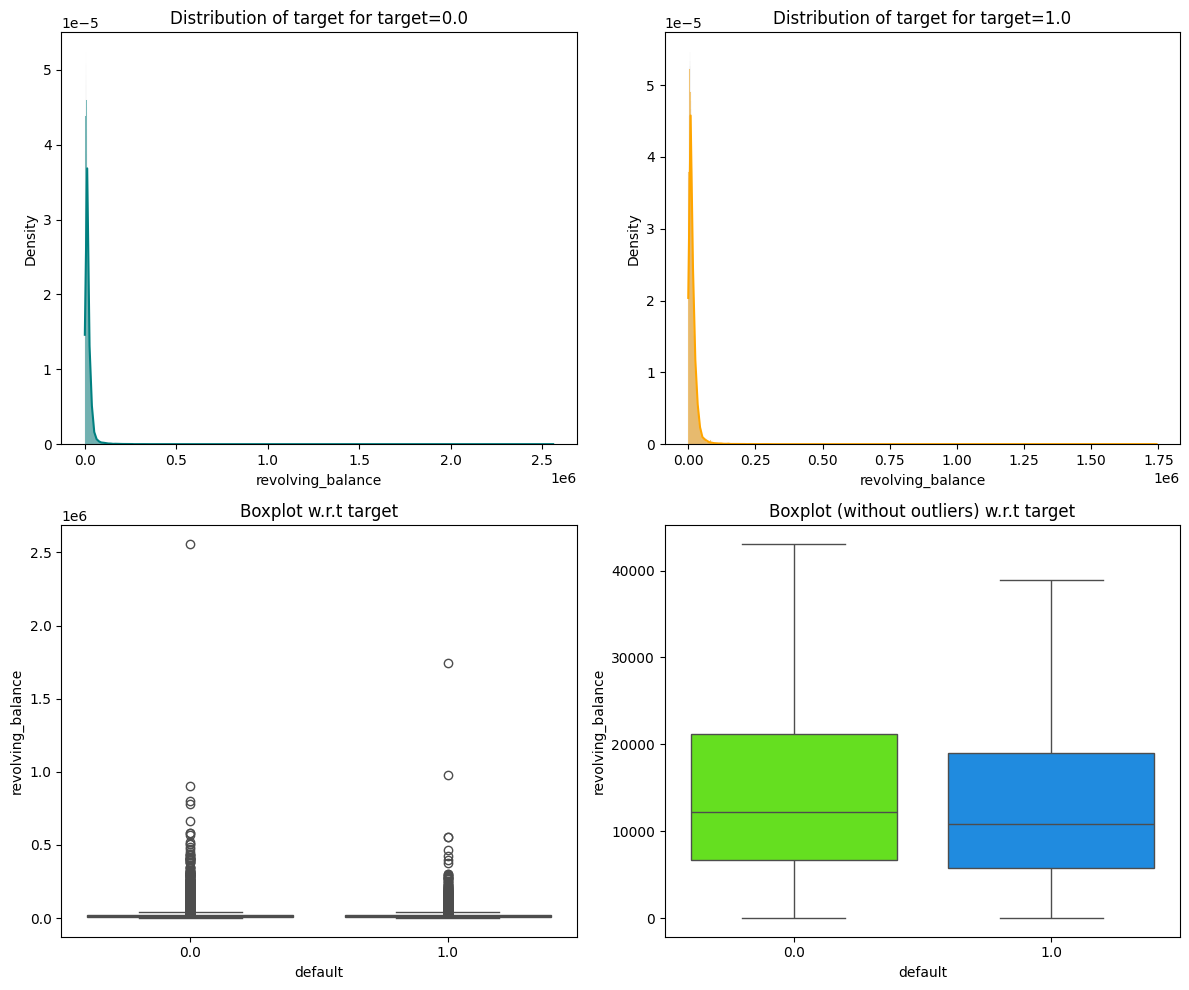

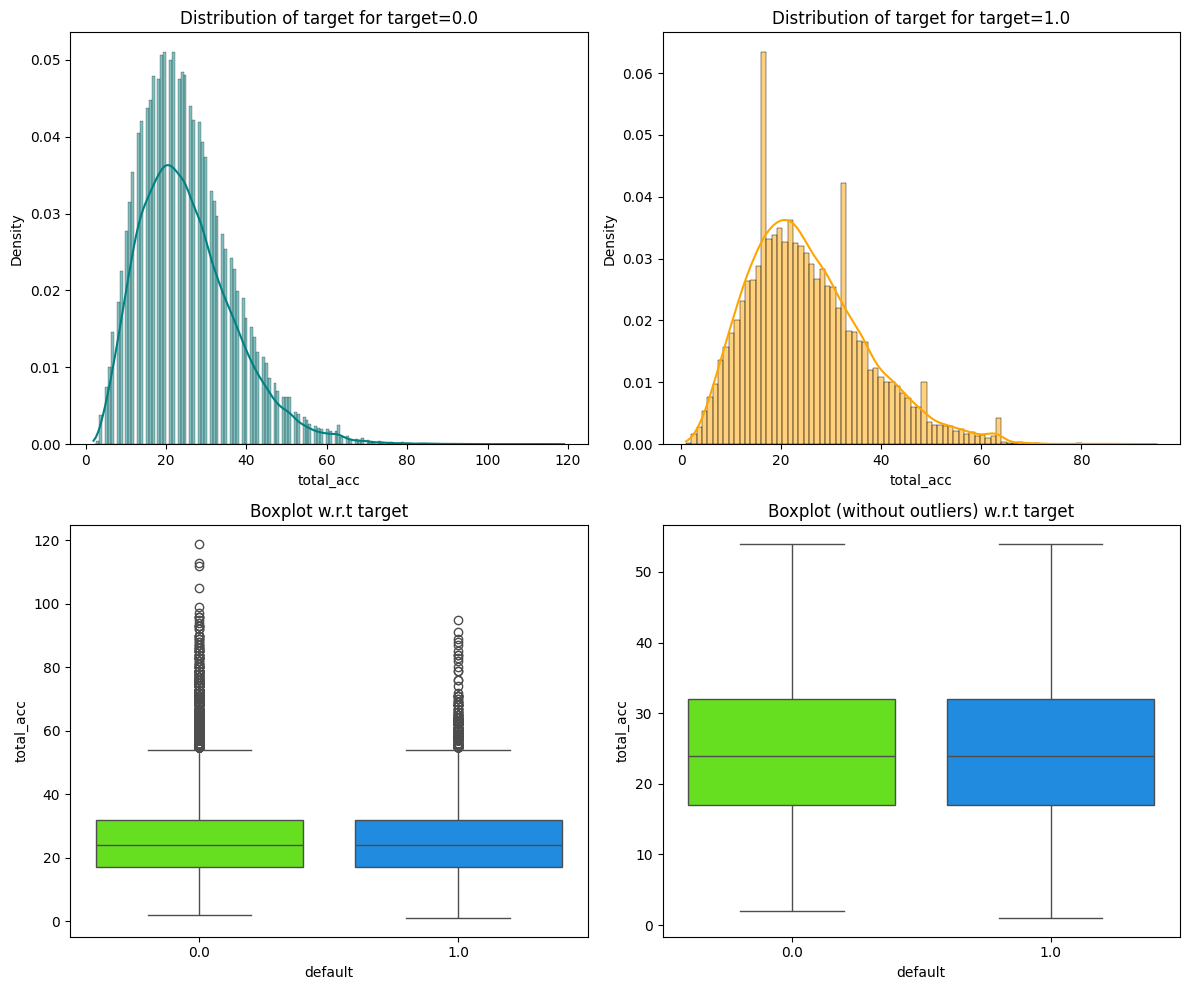

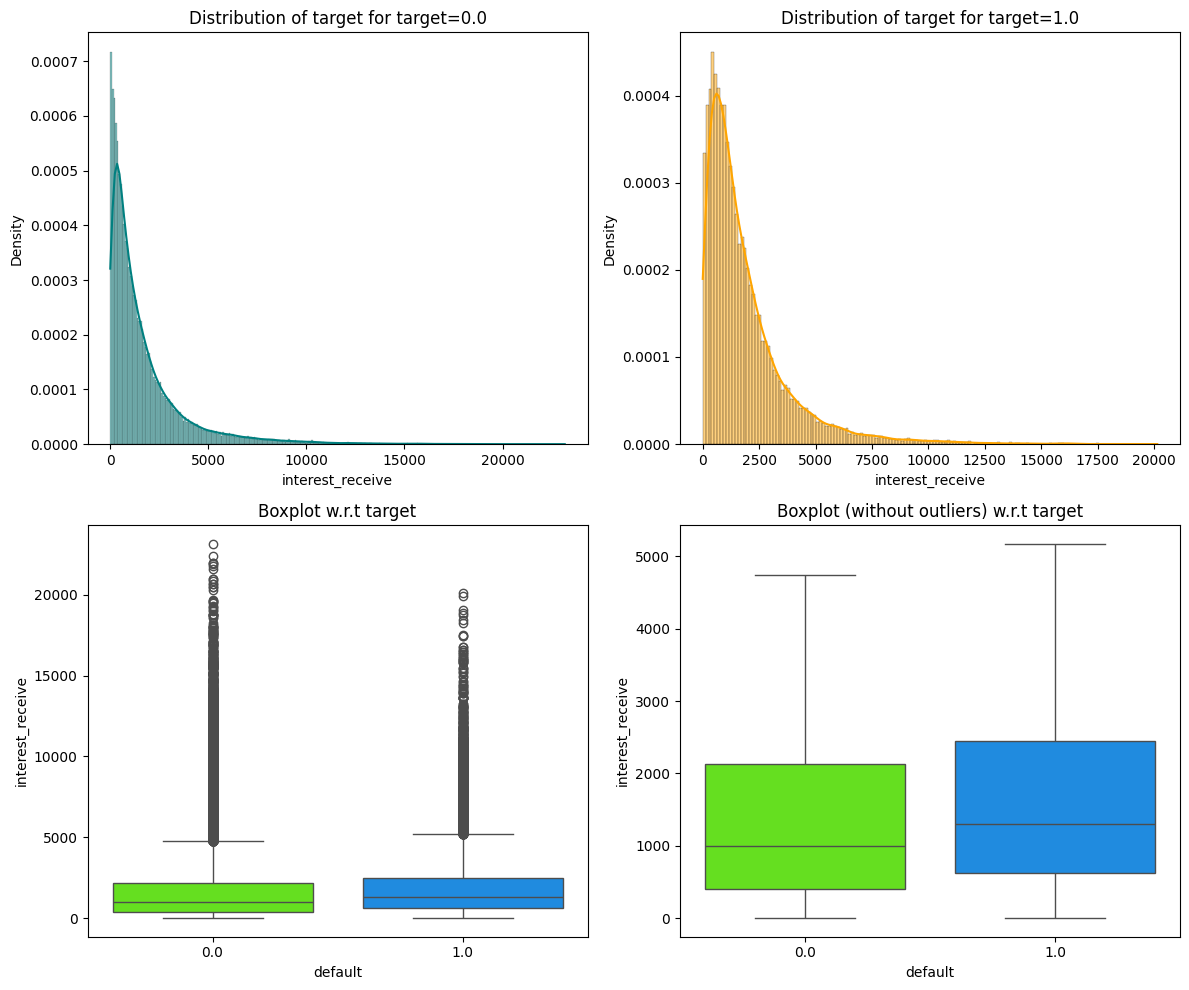

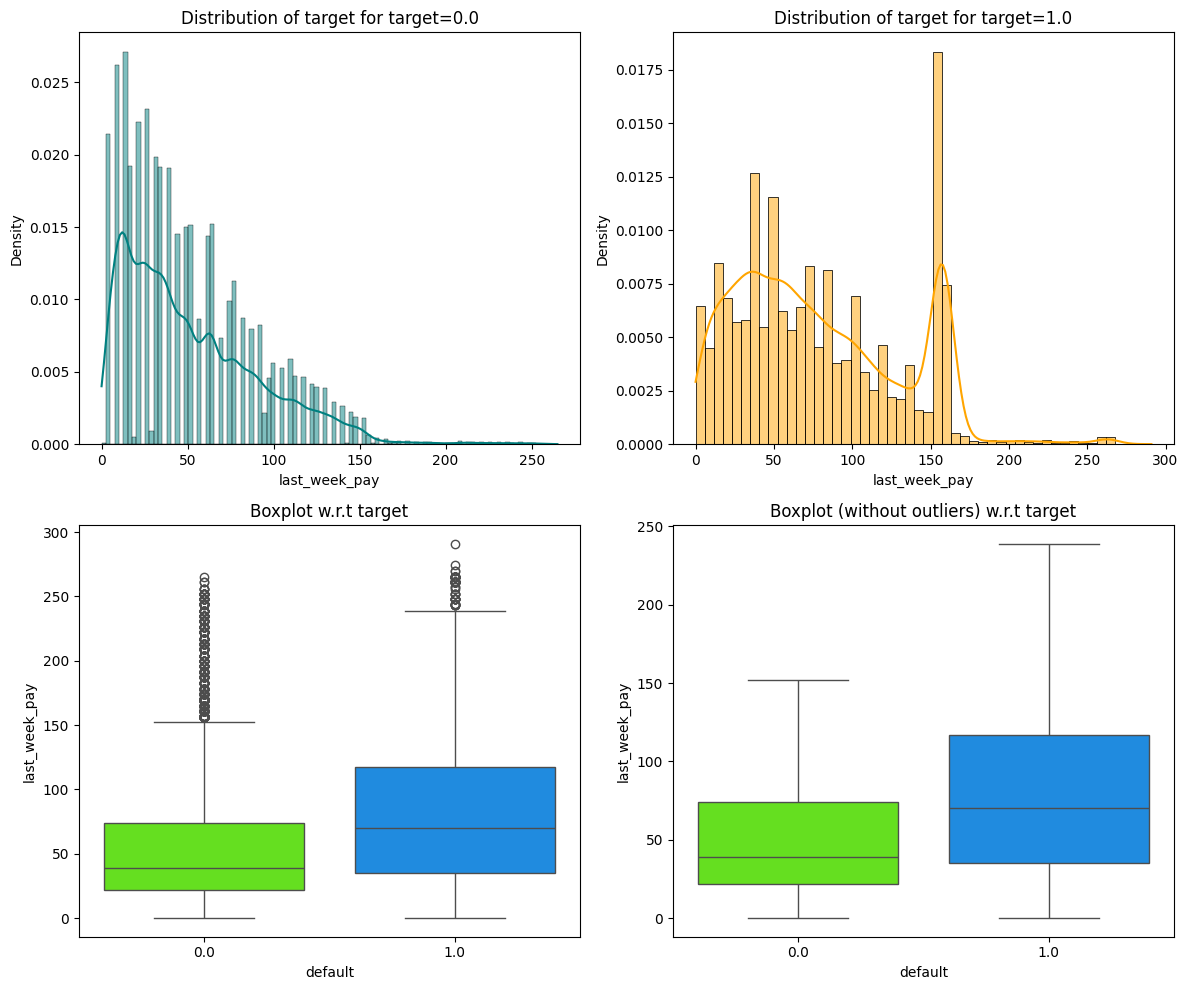

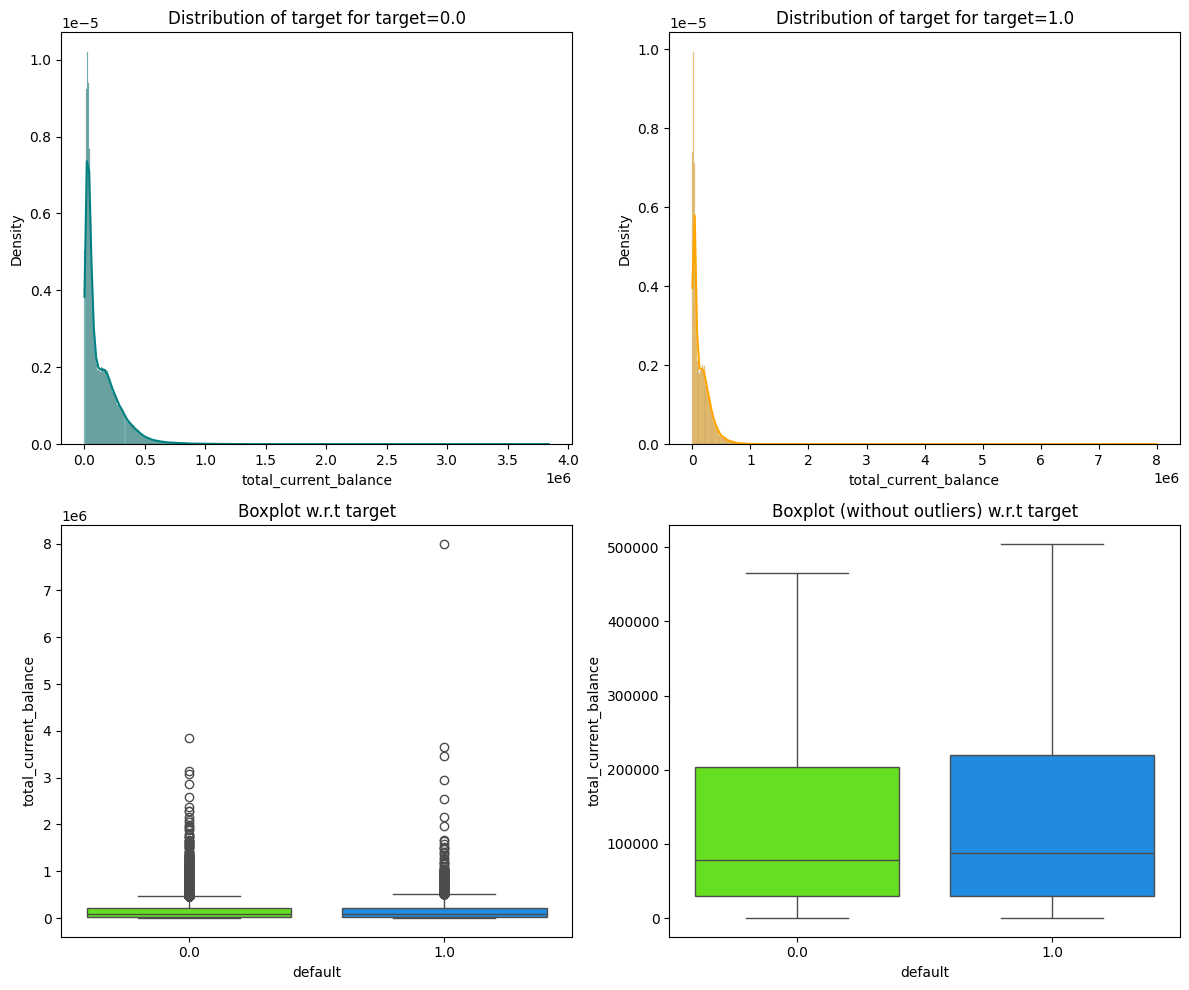

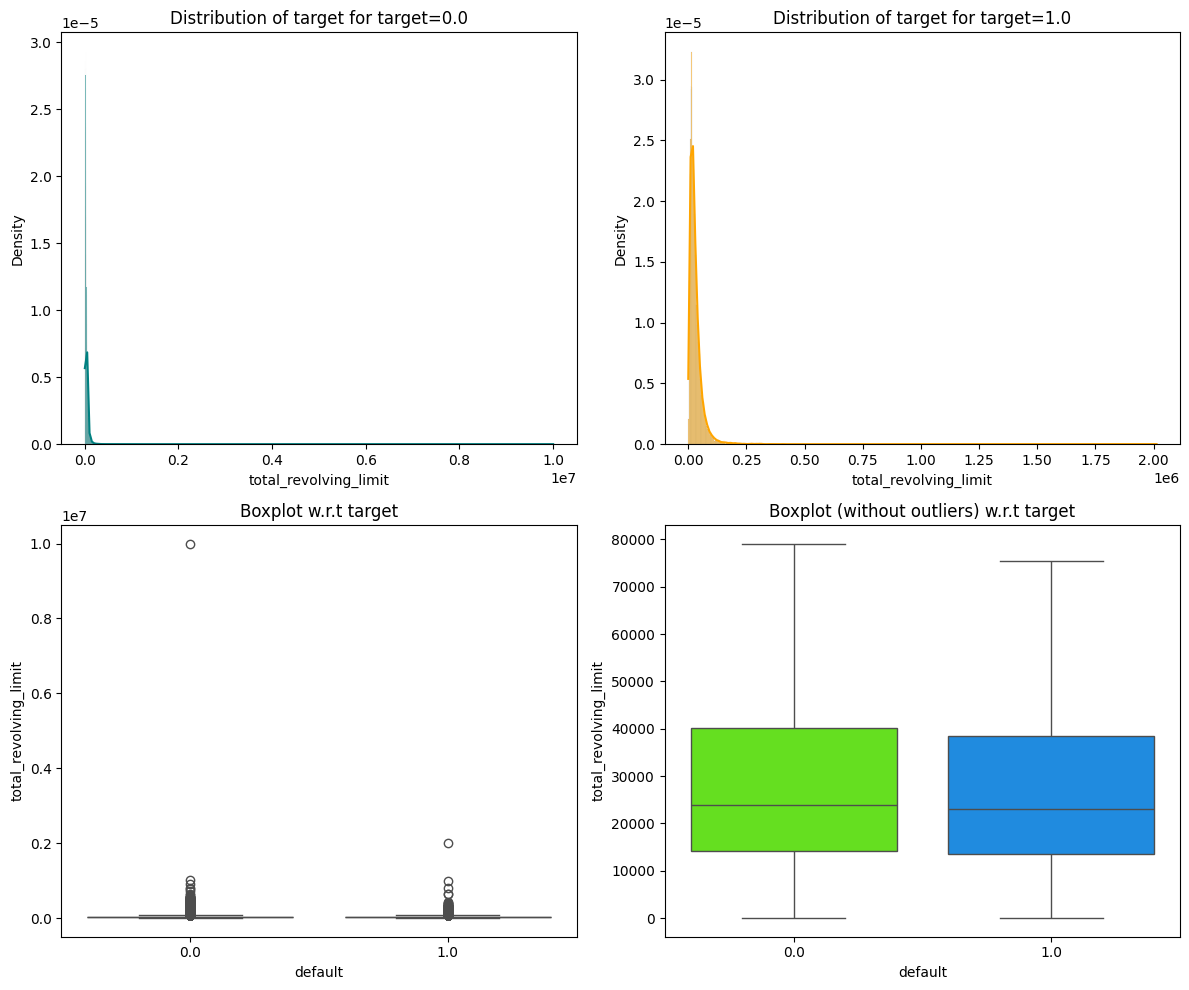

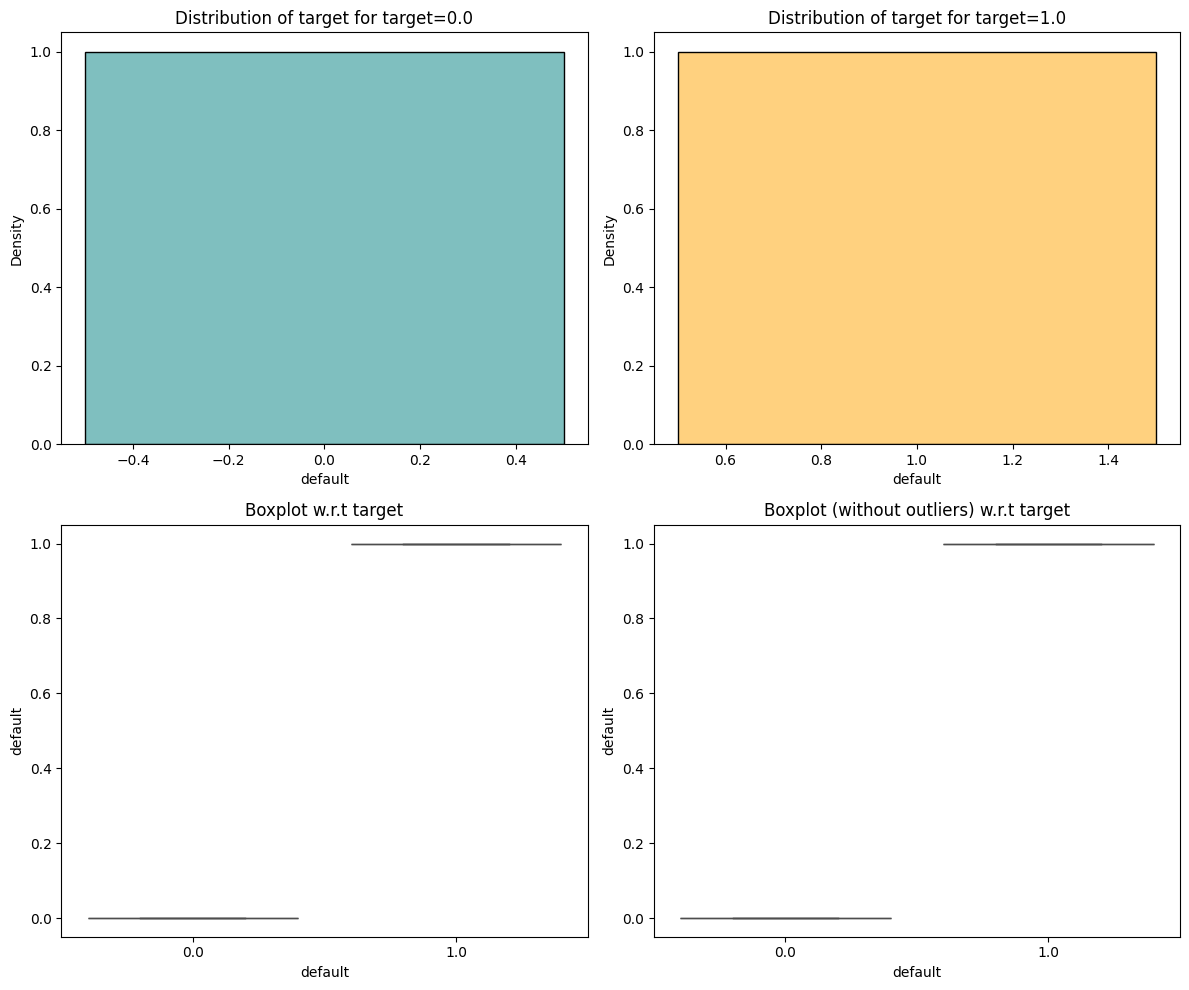

In [ ]:
for feature in data.select_dtypes(include=['number']).columns:
    distribution_plot_wrt_target(data, feature, "default")

In [ ]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [ ]:
select_columns_train2=["loan_term","loan_grade","loan_subgrade","job_experience","home_ownership","income_verification_status","loan_purpose","state_code","delinq_2yrs","public_records","total_acc","application_type","last_week_pay"]

default      0.0    1.0    All
loan_term                     
All        71045  22129  93174
3          47345  17866  65211
5          23700   4263  27963
------------------------------------------------------------------------------------------------------------------------


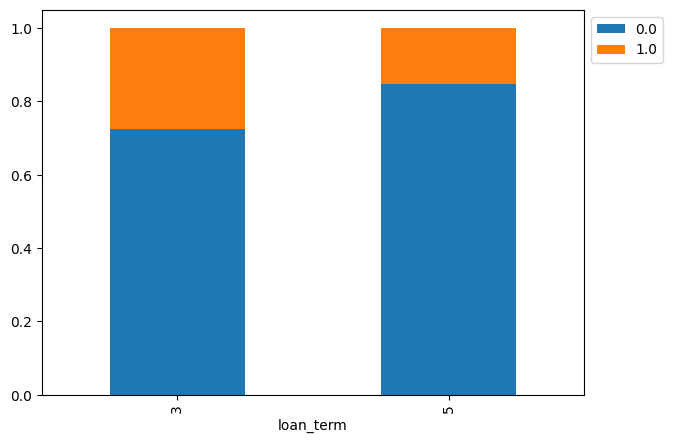

default       0.0    1.0    All
loan_grade                     
All         71045  22129  93174
B           19787   7078  26865
C           20203   5584  25787
A           11281   4253  15534
D           11478   3237  14715
E            6003   1375   7378
F            1862    482   2344
G             431    120    551
------------------------------------------------------------------------------------------------------------------------


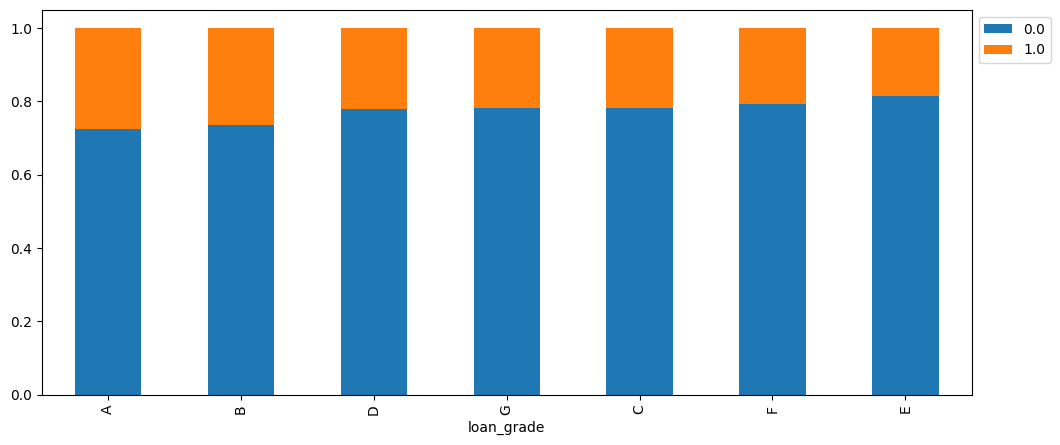

default          0.0    1.0    All
loan_subgrade                     
All            71045  22129  93174
B3              4196   1683   5879
B4              4335   1544   5879
B2              3750   1419   5169
C1              4152   1291   5443
B5              3837   1258   5095
C2              4264   1215   5479
B1              3669   1174   4843
A5              3558   1165   4723
A4              2502   1129   3631
C3              4150   1120   5270
C4              4161   1021   5182
C5              3476    937   4413
D1              2932    784   3716
D2              2462    777   3239
A3              1731    719   2450
D3              2114    645   2759
A2              1710    643   2353
A1              1780    597   2377
D4              2154    563   2717
D5              1816    468   2284
E1              1598    326   1924
E3              1206    307   1513
E2              1436    300   1736
E4               996    232   1228
E5               767    210    977
F1               590

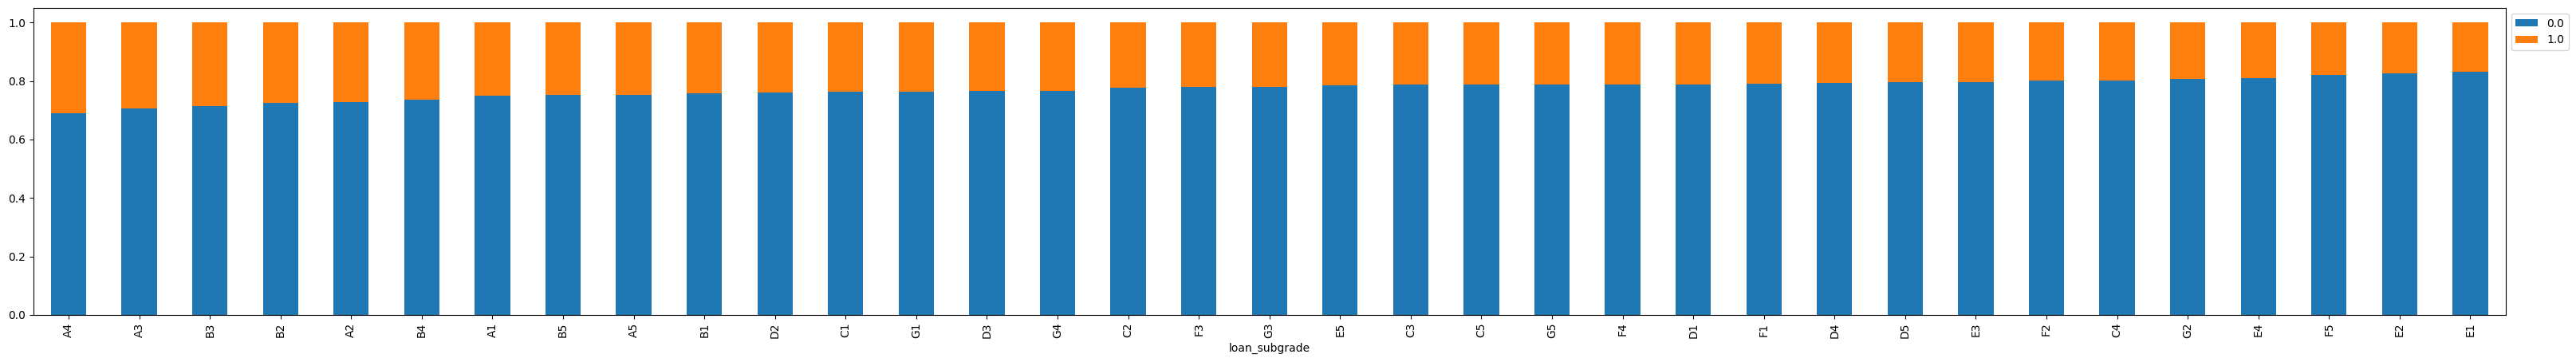

default           0.0    1.0    All
job_experience                     
All             67140  21332  88472
<5 Years        30377  10233  40610
10+ years       23656   6706  30362
6-10 years      13107   4393  17500
------------------------------------------------------------------------------------------------------------------------


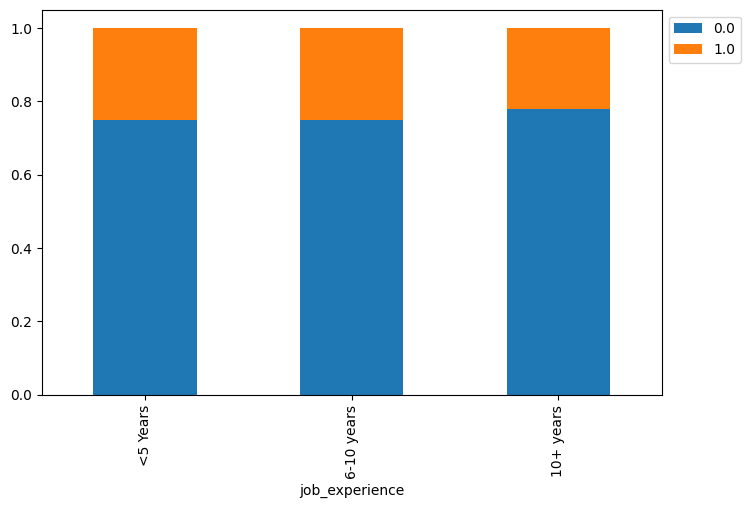

default           0.0    1.0    All
home_ownership                     
All             71045  22129  93174
MORTGAGE        35316  11129  46445
RENT            28401   9048  37449
OWN              7323   1931   9254
OTHER               3     15     18
NONE                2      6      8
------------------------------------------------------------------------------------------------------------------------


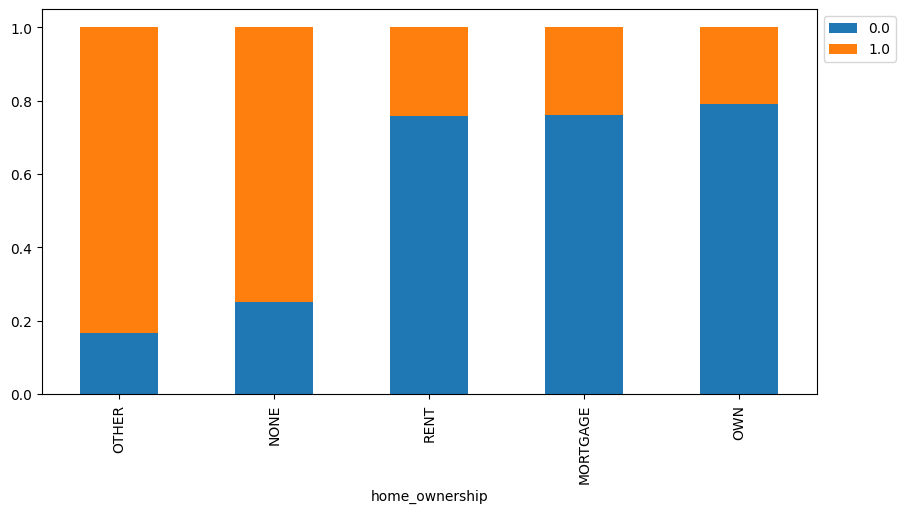

default                       0.0    1.0    All
income_verification_status                     
All                         71045  22129  93174
Not Verified                20329   7908  28237
Verified                    22654   7796  30450
Source Verified             28062   6425  34487
------------------------------------------------------------------------------------------------------------------------


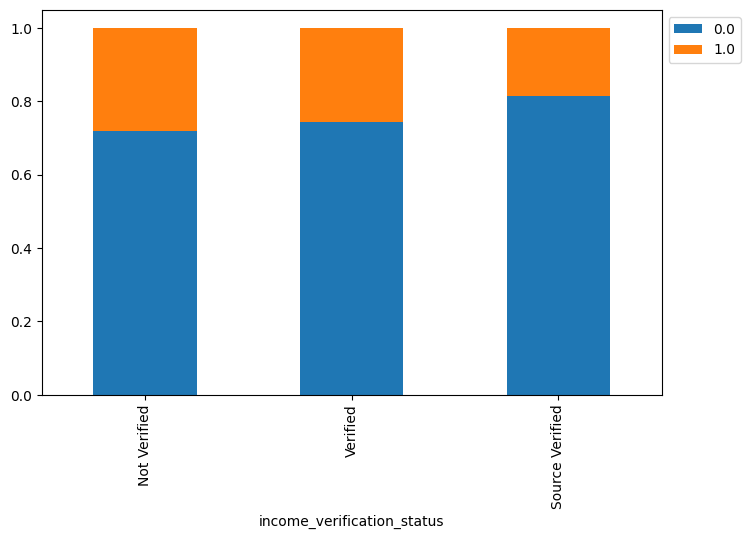

default               0.0    1.0    All
loan_purpose                           
All                 71045  22129  93174
debt_consolidation  42408  12833  55241
credit_card         17006   4565  21571
other                7563   3408  10971
home_improvement     4068   1323   5391
------------------------------------------------------------------------------------------------------------------------


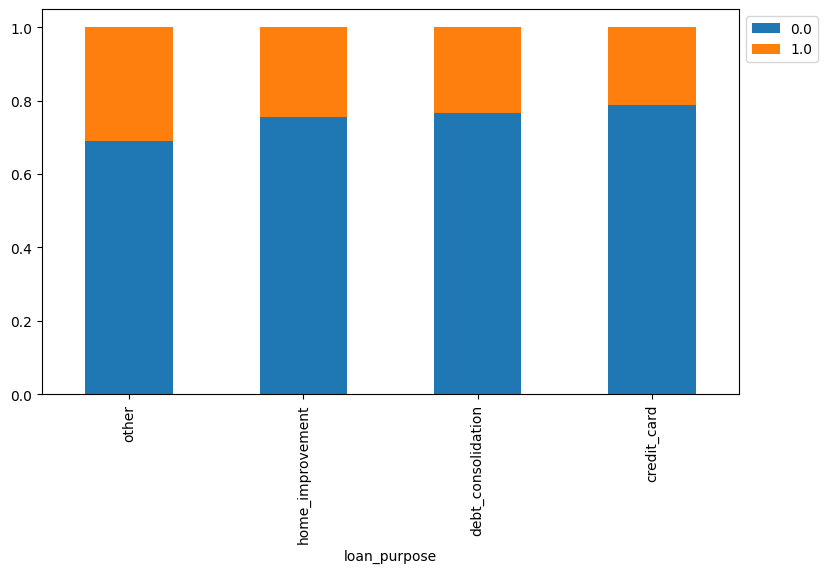

default       0.0    1.0    All
state_code                     
All         71045  22129  93174
CA           9905   3839  13744
NY           5886   1896   7782
TX           5748   1719   7467
FL           4876   1484   6360
IL           2864    835   3699
NJ           2640    824   3464
PA           2616    705   3321
GA           2324    674   2998
VA           2141    652   2793
OH           2467    637   3104
NC           2050    619   2669
MA           1648    584   2232
MD           1704    575   2279
AZ           1583    532   2115
WA           1517    521   2038
MI           1911    504   2415
CO           1431    493   1924
MN           1254    384   1638
NV            983    343   1326
MO           1144    341   1485
CT           1083    319   1402
OR            805    297   1102
AL            915    273   1188
WI            940    266   1206
SC            847    261   1108
LA            854    258   1112
IN           1188    232   1420
KY            731    202    933
TN      

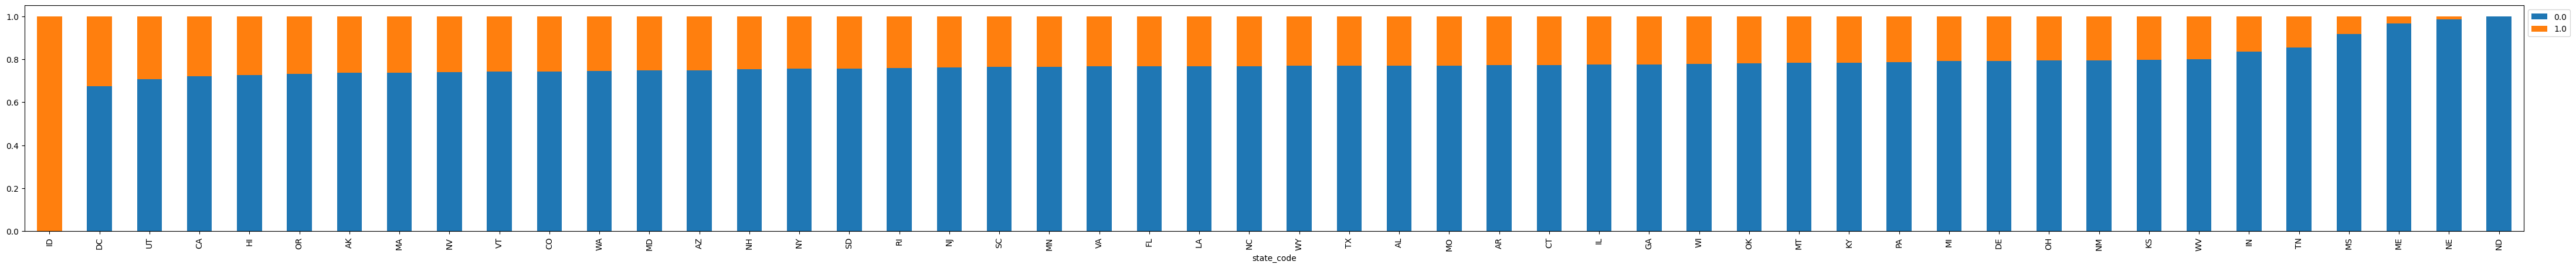

default        0.0    1.0    All
delinq_2yrs                     
All          71045  22127  93172
0.0          56778  18537  75315
1.0           9345   2457  11802
2.0           2812    698   3510
3.0           1093    239   1332
4.0            446    103    549
5.0            223     45    268
6.0            124     18    142
7.0             73     11     84
8.0             51      7     58
9.0             31      4     35
12.0            12      3     15
10.0            17      2     19
13.0             8      1      9
16.0             1      1      2
22.0             0      1      1
14.0             7      0      7
15.0             2      0      2
17.0             2      0      2
18.0             3      0      3
19.0             1      0      1
21.0             1      0      1
11.0            15      0     15
------------------------------------------------------------------------------------------------------------------------


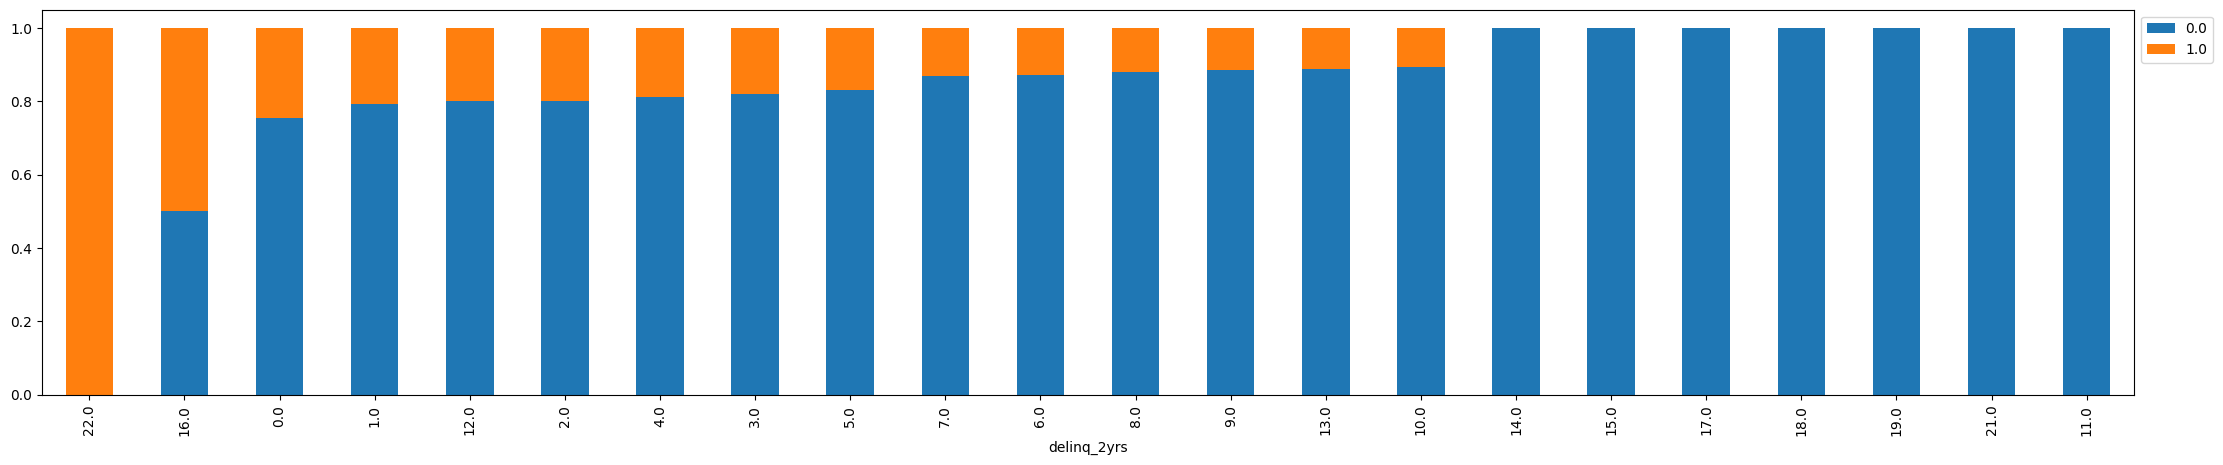

default           0.0    1.0    All
public_records                     
All             71045  22127  93172
0.0             59530  19404  78934
1.0              9439   2410  11849
2.0              1323    227   1550
3.0               420     59    479
4.0               163     11    174
5.0                75      9     84
6.0                46      4     50
7.0                21      1     22
8.0                10      1     11
9.0                 8      1      9
10.0                4      0      4
11.0                2      0      2
12.0                2      0      2
13.0                1      0      1
49.0                1      0      1
------------------------------------------------------------------------------------------------------------------------


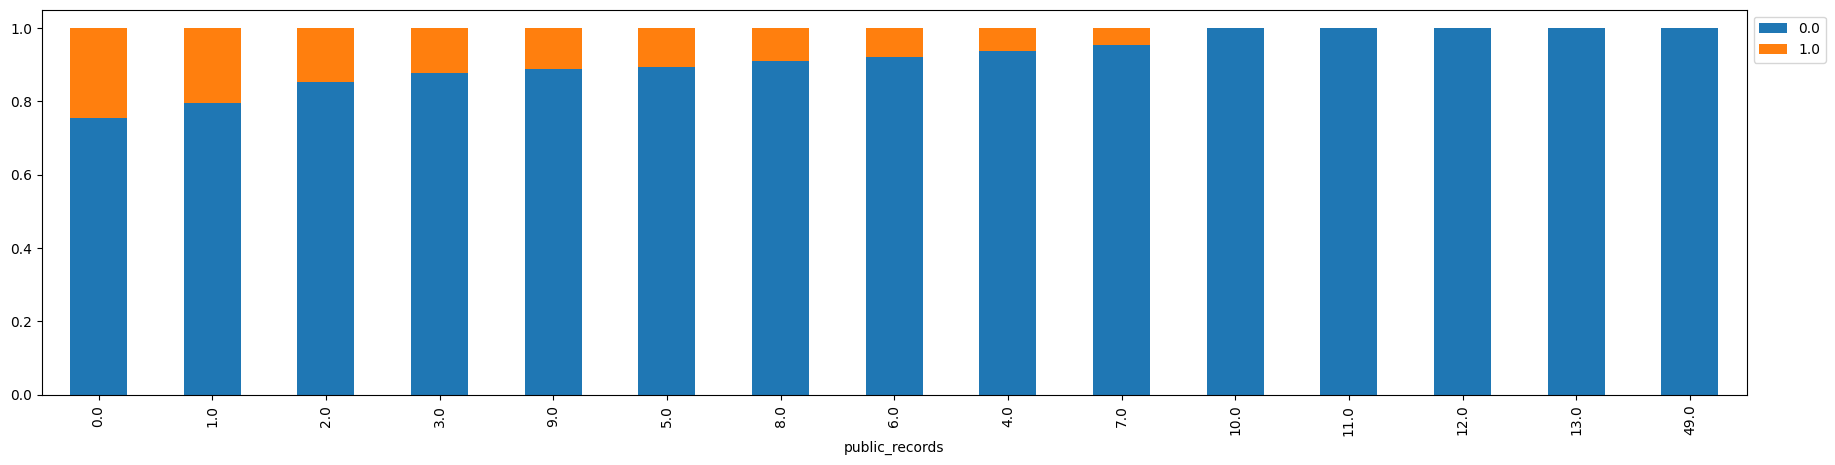

default      0.0    1.0    All
total_acc                     
All        71045  22127  93172
22.0        2619    857   3476
20.0        2617    826   3443
19.0        2596    799   3395
18.0        2436    785   3221
21.0        2566    771   3337
23.0        2436    768   3204
24.0        2487    758   3245
16.0        2295    752   3047
17.0        2456    747   3203
25.0        2467    729   3196
26.0        2260    689   2949
15.0        2245    681   2926
28.0        2153    670   2823
27.0        2162    631   2793
14.0        2159    629   2788
13.0        2075    622   2697
29.0        2017    604   2621
30.0        1915    602   2517
12.0        1816    549   2365
31.0        1688    521   2209
32.0        1622    512   2134
33.0        1526    486   2012
11.0        1616    476   2092
34.0        1403    434   1837
35.0        1306    427   1733
10.0        1423    425   1848
36.0        1242    393   1635
37.0        1167    389   1556
9.0         1153    372   1525
8.0     

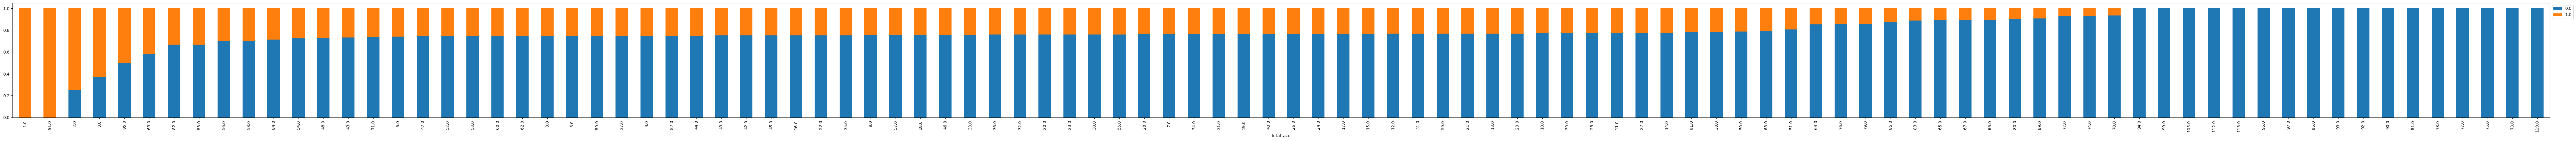

default             0.0    1.0    All
application_type                     
INDIVIDUAL        70989  22129  93118
All               71045  22129  93174
JOINT                56      0     56
------------------------------------------------------------------------------------------------------------------------


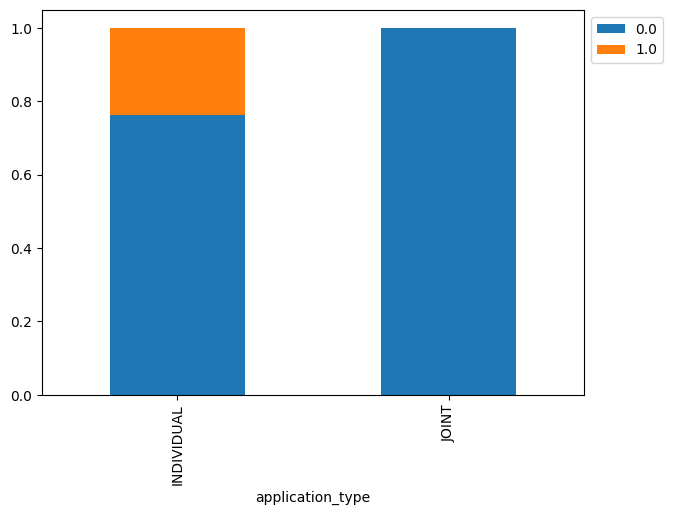

default          0.0    1.0    All
last_week_pay                     
All            69121  22129  91250
156.0            109   1411   1520
161.0             71    957   1028
35.0            3339    846   4185
39.0            3334    788   4122
157.0             12    764    776
52.0            2639    757   3396
26.0            4036    738   4774
48.0            2618    732   3350
4.0             3745    723   4468
61.0            2515    688   3203
65.0            2659    665   3324
22.0            3861    636   4497
13.0            4729    610   5339
74.0            1728    608   2336
43.0             827    582   1409
78.0            1966    577   2543
87.0            1387    516   1903
9.0             4556    493   5049
17.0            3354    483   3837
100.0            979    480   1459
70.0            1222    466   1688
57.0             905    452   1357
91.0            1431    447   1878
30.0             154    430    584
104.0            916    413   1329
96.0             800

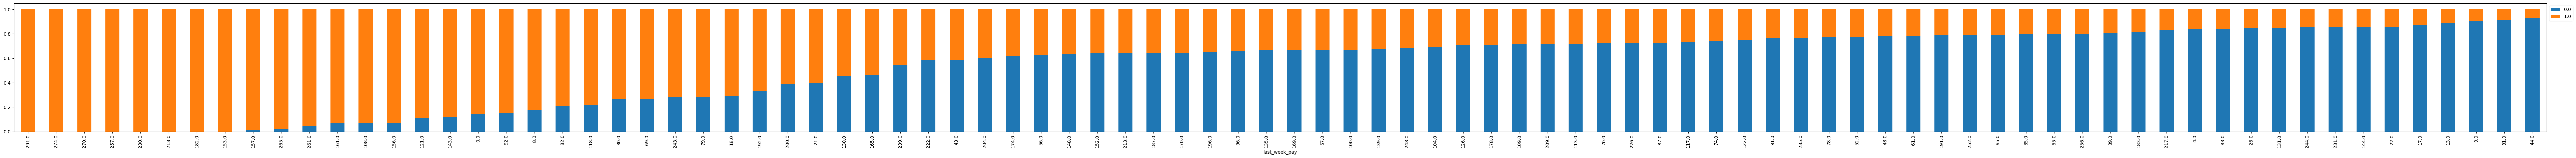

In [ ]:
for feature in select_columns_train2:
    stacked_barplot(data, feature, "default")

In [ ]:
# Loop to generate contingency tables with percentages
for i in range(len(select_columns_train)):
    for j in range(i + 1, len(select_columns_train)):
        col1 = select_columns_train[i]
        col2 = select_columns_train[j]
        contingency_table = pd.crosstab(data[col1], data[col2], normalize='all') * 100
        print(f'Contingency table for {col1} and {col2} (in %):\n')
        print(contingency_table)
        print('\n')
        plt.figure(figsize=(6, 4))
        sns.heatmap(contingency_table, annot=True, cmap='coolwarm', fmt=".2f", cbar=False)
        plt.title(f'Contingency table for {col1} and {col2}')
        plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# Count distinct values for each column corresponding to null values in job_experience
data[data["job_experience"].isnull()].nunique()

ID                            6791
loan_amnt                      861
loan_term                        2
interest_rate                  256
loan_grade                       7
loan_subgrade                   35
job_experience                   0
home_ownership                   3
annual_income                 2210
income_verification_status       3
loan_purpose                     4
state_code                      49
debt_to_income                2981
delinq_2yrs                     14
public_records                   9
revolving_balance             5982
total_acc                       78
interest_receive              6363
application_type                 2
last_week_pay                   68
total_current_balance         6296
total_revolving_limit         1208
default                          2
dtype: int64

Contingency table for loan_term and job_experience (in %):

job_experience  10+ years  6-10 years  <5 Years
loan_term                                      
3                  22.605      13.729    33.207
5                  11.839       5.990    12.630




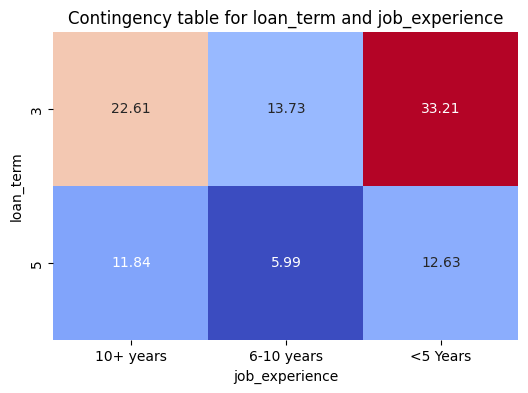

Contingency table for loan_grade and job_experience (in %):

job_experience  10+ years  6-10 years  <5 Years
loan_grade                                     
A                   5.851       3.189     7.796
B                   9.944       5.727    13.224
C                   9.440       5.541    12.568
D                   5.398       3.037     7.203
E                   2.730       1.569     3.620
F                   0.879       0.529     1.146
G                   0.202       0.127     0.281




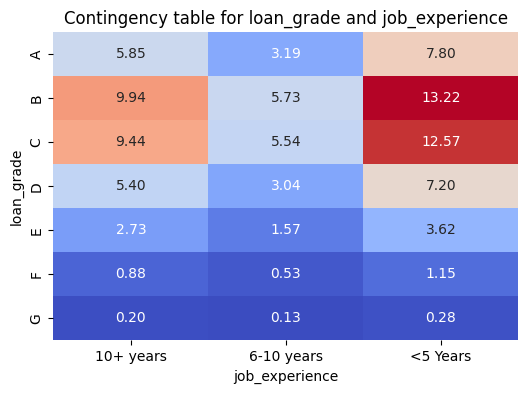

Contingency table for loan_subgrade and job_experience (in %):

job_experience  10+ years  6-10 years  <5 Years
loan_subgrade                                  
A1                  0.933       0.478     1.168
A2                  0.855       0.468     1.207
A3                  0.934       0.513     1.218
A4                  1.315       0.780     1.835
A5                  1.814       0.950     2.367
B1                  1.767       1.081     2.316
B2                  1.957       1.066     2.519
B3                  2.196       1.273     2.902
B4                  2.175       1.215     2.927
B5                  1.849       1.091     2.559
C1                  1.966       1.203     2.736
C2                  2.010       1.175     2.695
C3                  1.972       1.077     2.568
C4                  1.860       1.157     2.432
C5                  1.631       0.929     2.137
D1                  1.382       0.752     1.821
D2                  1.167       0.678     1.593
D3                  0.96

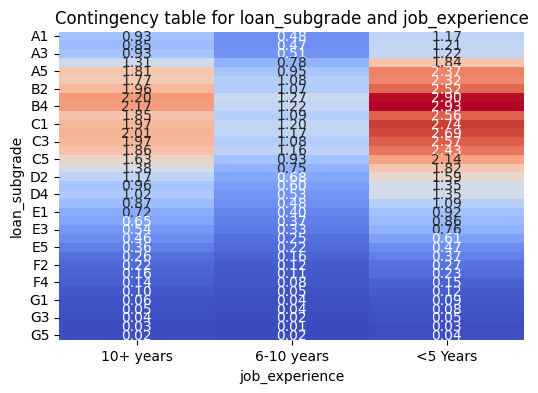

Contingency table for home_ownership and job_experience (in %):

job_experience  10+ years  6-10 years  <5 Years
home_ownership                                 
MORTGAGE           21.107      10.293    18.707
NONE                0.003       0.002     0.003
OTHER               0.004       0.005     0.010
OWN                 3.608       1.781     4.022
RENT                9.722       7.638    23.094




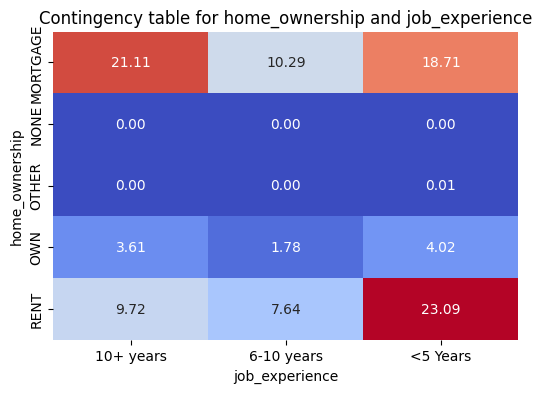

Contingency table for income_verification_status and job_experience (in %):

job_experience              10+ years  6-10 years  <5 Years
income_verification_status                                 
Not Verified                    9.746       6.217    15.255
Source Verified                12.934       7.317    17.748
Verified                       11.763       6.184    12.834




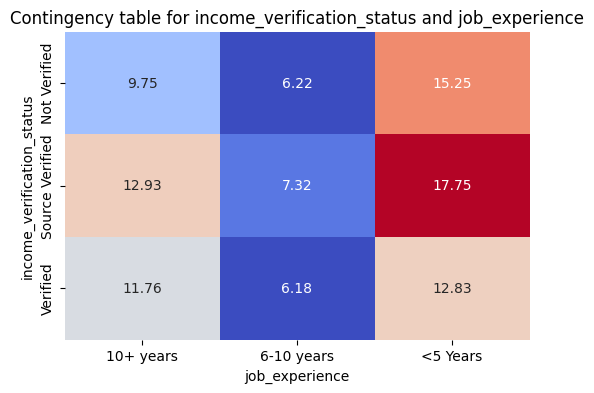

Contingency table for loan_purpose and job_experience (in %):

job_experience      10+ years  6-10 years  <5 Years
loan_purpose                                       
credit_card             7.590       4.540    11.053
debt_consolidation     20.984      11.883    26.483
home_improvement        2.329       1.190     2.244
other                   3.541       2.106     6.058




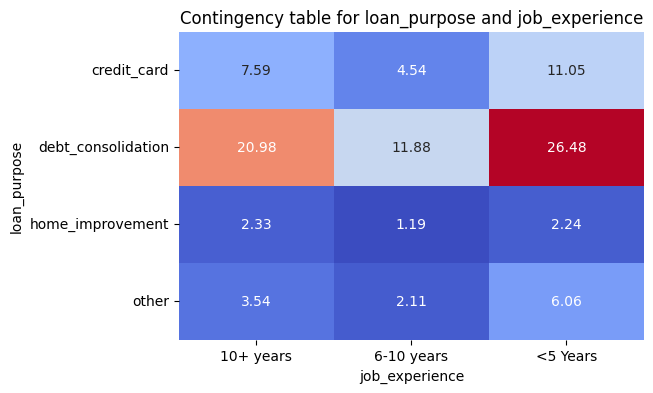

Contingency table for state_code and job_experience (in %):

job_experience  10+ years  6-10 years  <5 Years
state_code                                     
AK                  0.082       0.059     0.108
AL                  0.526       0.237     0.507
AR                  0.293       0.166     0.284
AZ                  0.693       0.458     1.093
CA                  4.928       3.112     6.827
CO                  0.643       0.374     1.096
CT                  0.566       0.284     0.660
DC                  0.059       0.044     0.183
DE                  0.113       0.052     0.109
FL                  2.052       1.438     3.220
GA                  1.138       0.659     1.462
HI                  0.194       0.107     0.196
ID                  0.000       0.000     0.002
IL                  1.398       0.734     1.814
IN                  0.591       0.308     0.590
KS                  0.313       0.146     0.404
KY                  0.401       0.182     0.420
LA                  0.422  

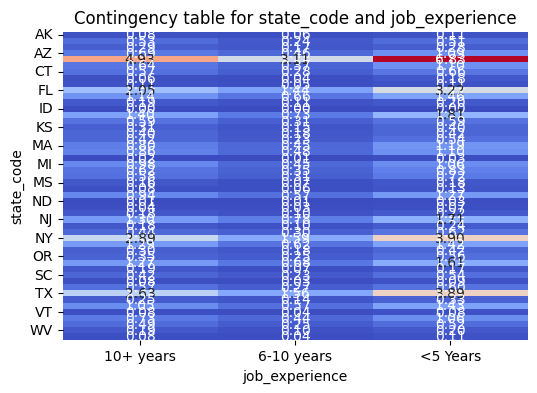

Contingency table for delinq_2yrs and job_experience (in %):

job_experience  10+ years  6-10 years  <5 Years
delinq_2yrs                                    
0.000              27.105      16.150    37.480
1.000               4.775       2.388     5.546
2.000               1.506       0.698     1.617
3.000               0.557       0.261     0.605
4.000               0.219       0.107     0.273
5.000               0.125       0.058     0.119
6.000               0.063       0.025     0.066
7.000               0.033       0.014     0.039
8.000               0.020       0.007     0.034
9.000               0.013       0.004     0.013
10.000              0.008       0.004     0.010
11.000              0.002       0.002     0.010
12.000              0.007       0.001     0.011
13.000              0.005       0.000     0.005
14.000              0.004       0.001     0.004
15.000              0.001       0.000     0.001
16.000              0.002       0.000     0.000
17.000              0.001 

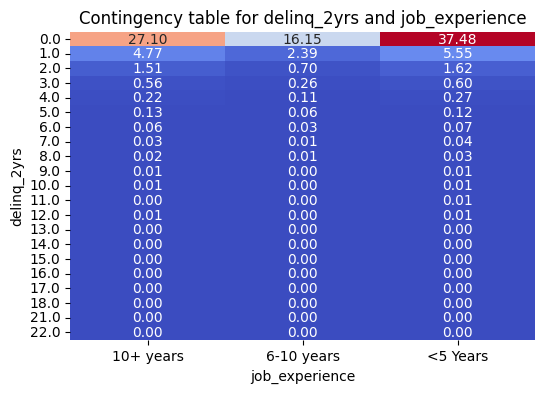

Contingency table for public_records and job_experience (in %):

job_experience  10+ years  6-10 years  <5 Years
public_records                                 
0.000              28.900      16.597    39.755
1.000               4.660       2.580     5.101
2.000               0.570       0.337     0.651
3.000               0.183       0.120     0.181
4.000               0.066       0.043     0.071
5.000               0.027       0.017     0.037
6.000               0.020       0.013     0.021
7.000               0.007       0.005     0.006
8.000               0.003       0.005     0.003
9.000               0.002       0.000     0.005
10.000              0.002       0.002     0.001
11.000              0.002       0.000     0.001
12.000              0.001       0.001     0.000
13.000              0.000       0.000     0.001
21.000              0.001       0.000     0.000
23.000              0.000       0.000     0.001
49.000              0.000       0.000     0.001




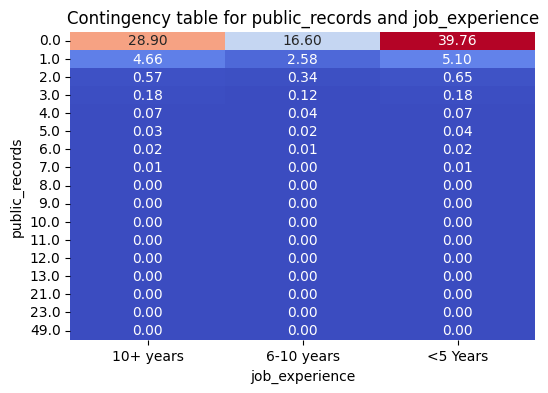

Contingency table for total_acc and job_experience (in %):

job_experience  10+ years  6-10 years  <5 Years
total_acc                                      
1.000               0.000       0.000     0.002
2.000               0.001       0.000     0.003
3.000               0.002       0.007     0.055
4.000               0.041       0.043     0.223
5.000               0.071       0.082     0.365
6.000               0.108       0.122     0.507
7.000               0.174       0.192     0.652
8.000               0.260       0.250     0.814
9.000               0.344       0.328     0.927
10.000              0.428       0.428     1.125
11.000              0.550       0.443     1.256
12.000              0.652       0.501     1.347
13.000              0.789       0.625     1.437
14.000              0.817       0.644     1.494
15.000              0.921       0.688     1.507
16.000              0.993       0.694     1.556
17.000              1.079       0.713     1.631
18.000              1.109   

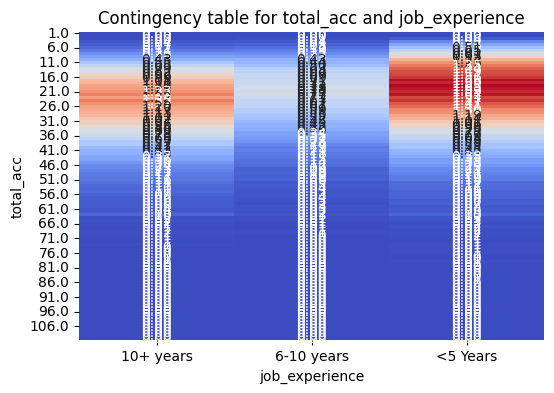

Contingency table for application_type and job_experience (in %):

job_experience    10+ years  6-10 years  <5 Years
application_type                                 
INDIVIDUAL           34.422      19.705    45.819
JOINT                 0.022       0.013     0.018




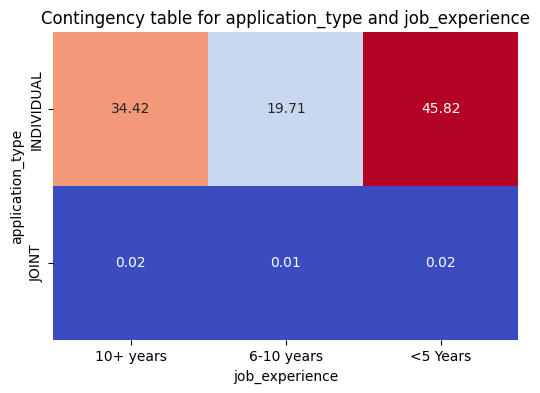

Contingency table for last_week_pay and job_experience (in %):

job_experience  10+ years  6-10 years  <5 Years
last_week_pay                                  
0.000               0.053       0.023     0.072
4.000               1.761       0.874     2.212
8.000               0.040       0.025     0.054
9.000               1.998       1.005     2.527
13.000              2.047       1.054     2.673
17.000              1.454       0.772     1.974
18.000              0.109       0.057     0.172
21.000              0.027       0.009     0.042
22.000              1.749       0.920     2.182
26.000              1.865       0.972     2.341
30.000              0.222       0.128     0.323
31.000              1.403       0.794     1.950
35.000              1.513       0.901     2.137
39.000              1.597       0.884     2.047
43.000              0.520       0.322     0.698
44.000              0.696       0.386     0.928
48.000              1.210       0.699     1.719
52.000              1.20

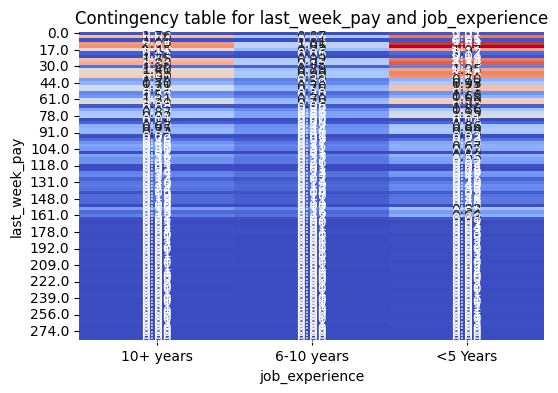

Contingency table for default and job_experience (in %):

job_experience  10+ years  6-10 years  <5 Years
default                                        
0.000              26.738      14.815    34.335
1.000               7.580       4.965    11.566




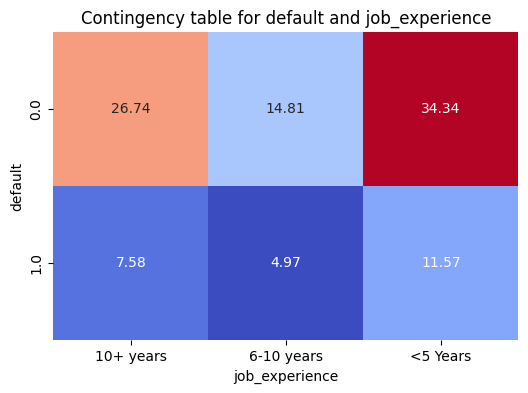

In [ ]:
# Loop to generate contingency tables with percentages
col2="job_experience"
for col1 in select_columns_train:
    if col1 != col2:
        contingency_table = pd.crosstab(data[col1], data[col2], normalize='all') * 100
        print(f'Contingency table for {col1} and {col2} (in %):\n')
        print(contingency_table)
        print('\n')
        plt.figure(figsize=(6, 4))
        sns.heatmap(contingency_table, annot=True, cmap='coolwarm', fmt=".2f", cbar=False)
        plt.title(f'Contingency table for {col1} and {col2}')
        plt.show()

In [ ]:

# Count distinct values for each column corresponding to null values in job_experience
data[data["application_type"]=="JOINT"].nunique()

ID                            80
loan_amnt                     39
loan_term                      2
interest_rate                 41
loan_grade                     7
loan_subgrade                 29
job_experience                 3
home_ownership                 3
annual_income                 64
income_verification_status     3
loan_purpose                   4
state_code                    33
debt_to_income                79
delinq_2yrs                    4
public_records                 3
revolving_balance             80
total_acc                     35
interest_receive              62
application_type               1
last_week_pay                  3
total_current_balance         80
total_revolving_limit         76
default                        1
dtype: int64

In [ ]:
# Impute missing values with the mode of 'job_experience' grouped by 'application_type' and 'job_experience'
data['job_experience'] = data.groupby(["loan_term", "loan_grade", "income_verification_status", "loan_purpose"])['job_experience'].transform(lambda x: x.fillna(x.mode()[0]))

In [ ]:
# Count distinct values for each column corresponding to null values in job_experience
data[data["job_experience"].isnull()].nunique()

ID                            0
loan_amnt                     0
loan_term                     0
interest_rate                 0
loan_grade                    0
loan_subgrade                 0
job_experience                0
home_ownership                0
annual_income                 0
income_verification_status    0
loan_purpose                  0
state_code                    0
debt_to_income                0
delinq_2yrs                   0
public_records                0
revolving_balance             0
total_acc                     0
interest_receive              0
application_type              0
last_week_pay                 0
total_current_balance         0
total_revolving_limit         0
default                       0
dtype: int64

In [ ]:
# Count distinct values for each column corresponding to null values in job_experience
data[data["annual_income"].isnull()]

ID  loan_amnt  loan_term  interest_rate loan_grade loan_subgrade  \
82922  70735       6500          3          8.380          A            A5   

      job_experience home_ownership  annual_income income_verification_status  \
82922       <5 Years           NONE            NaN               Not Verified   

      loan_purpose state_code  debt_to_income  delinq_2yrs  public_records  \
82922        other         NY           4.000          NaN             NaN   

       revolving_balance  total_acc  interest_receive application_type  \
82922                  0        NaN           873.830       INDIVIDUAL   

       last_week_pay  total_current_balance  total_revolving_limit  default  
82922        157.000                    NaN                    NaN    1.000

In [ ]:
# Creating catplots
#for feature in select_columns_train:
#   sns.catplot(x='annual_income', y=feature, col='default', data=data, kind='box', height=4, aspect=0.7, showfliers=False)
#   plt.show()

In [ ]:
data.dropna(subset=['annual_income'], inplace=True)

data[data["annual_income"].isnull()]

Empty DataFrame
Columns: [ID, loan_amnt, loan_term, interest_rate, loan_grade, loan_subgrade, job_experience, home_ownership, annual_income, income_verification_status, loan_purpose, state_code, debt_to_income, delinq_2yrs, public_records, revolving_balance, total_acc, interest_receive, application_type, last_week_pay, total_current_balance, total_revolving_limit, default]
Index: []

In [ ]:
data.isnull().sum()

ID                                0
loan_amnt                         0
loan_term                         0
interest_rate                     0
loan_grade                        0
loan_subgrade                     0
job_experience                    0
home_ownership                    0
annual_income                     0
income_verification_status        0
loan_purpose                      0
state_code                        0
debt_to_income                    0
delinq_2yrs                       2
public_records                    2
revolving_balance                 0
total_acc                         2
interest_receive                  0
application_type                  0
last_week_pay                  2730
total_current_balance         10615
total_revolving_limit         10615
default                       39933
dtype: int64

In [ ]:
data[data["delinq_2yrs"].isnull()]

ID  loan_amnt  loan_term  interest_rate loan_grade loan_subgrade  \
79795  72816       7200          3         10.280          C            C1   
98075  74301       6500          3          9.640          B            B4   

      job_experience home_ownership  annual_income income_verification_status  \
79795       <5 Years           RENT      95000.000               Not Verified   
98075       <5 Years           RENT      20000.000               Not Verified   

      loan_purpose state_code  debt_to_income  delinq_2yrs  public_records  \
79795        other         NY          10.000          NaN             NaN   
98075        other         CT          10.000          NaN             NaN   

       revolving_balance  total_acc  interest_receive application_type  \
79795                  0        NaN           843.330       INDIVIDUAL   
98075                  0        NaN           503.810       INDIVIDUAL   

       last_week_pay  total_current_balance  total_revolving_limit  default  
79795        157.000                    NaN                    NaN    1.000  
98075         48.000                    NaN                    NaN      NaN

Contingency table for total_acc and delinq_2yrs (in %):

delinq_2yrs  0.000   1.000   2.000   3.000   4.000   5.000   6.000   7.000   \
total_acc                                                                     
1.000         0.002   0.000   0.000   0.000   0.000   0.000   0.000   0.000   
2.000         0.003   0.001   0.000   0.000   0.000   0.000   0.000   0.000   
3.000         0.062   0.003   0.000   0.000   0.000   0.000   0.000   0.000   
4.000         0.292   0.014   0.002   0.001   0.000   0.000   0.000   0.000   
5.000         0.501   0.027   0.002   0.002   0.000   0.000   0.000   0.000   
6.000         0.717   0.026   0.004   0.001   0.000   0.000   0.000   0.000   
7.000         0.972   0.054   0.006   0.001   0.000   0.000   0.000   0.000   
8.000         1.248   0.076   0.011   0.001   0.000   0.000   0.000   0.000   
9.000         1.512   0.098   0.013   0.003   0.002   0.000   0.000   0.000   
10.000        1.785   0.162   0.025   0.010   0.003   0.001   0.000   0.00

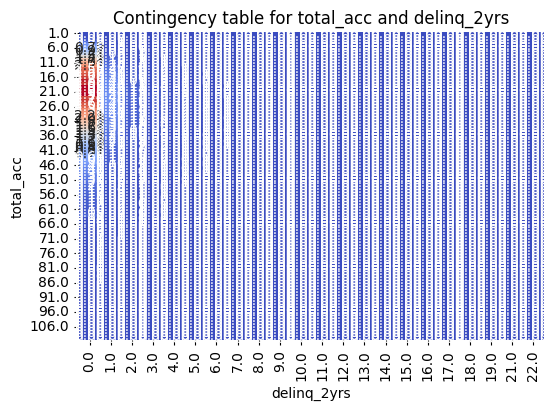

Contingency table for last_week_pay and delinq_2yrs (in %):

delinq_2yrs    0.000   1.000   2.000   3.000   4.000   5.000   6.000   7.000   \
last_week_pay                                                                   
0.000           0.125   0.020   0.002   0.000   0.003   0.000   0.000   0.000   
4.000           3.923   0.622   0.192   0.065   0.035   0.013   0.008   0.006   
8.000           0.094   0.016   0.002   0.003   0.000   0.001   0.000   0.000   
9.000           4.417   0.752   0.224   0.094   0.037   0.016   0.014   0.005   
13.000          4.620   0.778   0.239   0.087   0.041   0.025   0.010   0.004   
17.000          3.353   0.547   0.179   0.059   0.028   0.008   0.013   0.005   
18.000          0.272   0.044   0.012   0.006   0.003   0.001   0.002   0.000   
21.000          0.069   0.009   0.002   0.000   0.000   0.000   0.000   0.000   
22.000          3.920   0.683   0.182   0.084   0.033   0.016   0.010   0.003   
26.000          4.131   0.700   0.215   0.078   

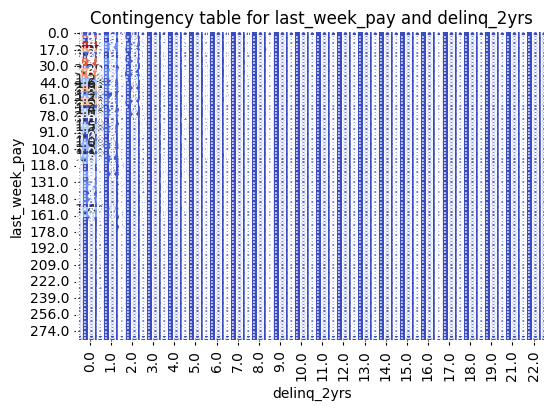

In [ ]:
# Loop to generate contingency tables with percentages
col2="delinq_2yrs"
for col1 in select_columns:
    if col1 != col2:
        contingency_table = pd.crosstab(data[col1], data[col2], normalize='all') * 100
        print(f'Contingency table for {col1} and {col2} (in %):\n')
        print(contingency_table)
        print('\n')
        plt.figure(figsize=(6, 4))
        sns.heatmap(contingency_table, annot=True, cmap='coolwarm', fmt=".2f", cbar=False)
        plt.title(f'Contingency table for {col1} and {col2}')
        plt.show()

Contingency table for total_acc and public_records (in %):

public_records  0.000   1.000   2.000   3.000   4.000   5.000   6.000   \
total_acc                                                                
1.000            0.002   0.001   0.000   0.000   0.000   0.000   0.000   
2.000            0.004   0.000   0.000   0.000   0.000   0.000   0.000   
3.000            0.064   0.002   0.000   0.000   0.000   0.000   0.000   
4.000            0.297   0.011   0.000   0.000   0.000   0.000   0.000   
5.000            0.492   0.029   0.004   0.005   0.001   0.000   0.000   
6.000            0.679   0.052   0.011   0.004   0.001   0.001   0.000   
7.000            0.923   0.080   0.017   0.007   0.002   0.003   0.000   
8.000            1.168   0.130   0.023   0.008   0.003   0.002   0.001   
9.000            1.409   0.168   0.034   0.007   0.005   0.003   0.002   
10.000           1.723   0.209   0.037   0.010   0.004   0.002   0.002   
11.000           1.986   0.216   0.038   0.013   0.0

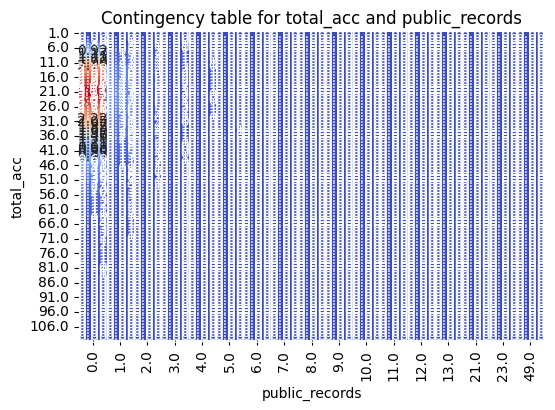

Contingency table for last_week_pay and public_records (in %):

public_records  0.000   1.000   2.000   3.000   4.000   5.000   6.000   \
last_week_pay                                                            
0.000            0.123   0.025   0.002   0.000   0.000   0.000   0.000   
4.000            3.973   0.737   0.102   0.040   0.014   0.004   0.004   
8.000            0.099   0.015   0.002   0.000   0.000   0.000   0.000   
9.000            4.621   0.751   0.126   0.045   0.017   0.005   0.004   
13.000           4.839   0.815   0.101   0.035   0.012   0.003   0.005   
17.000           3.458   0.601   0.097   0.029   0.013   0.005   0.002   
18.000           0.287   0.048   0.003   0.002   0.000   0.000   0.000   
21.000           0.064   0.014   0.001   0.000   0.000   0.001   0.001   
22.000           4.095   0.713   0.082   0.027   0.008   0.006   0.005   
26.000           4.285   0.760   0.101   0.034   0.010   0.007   0.001   
30.000           0.568   0.080   0.010   0.001  

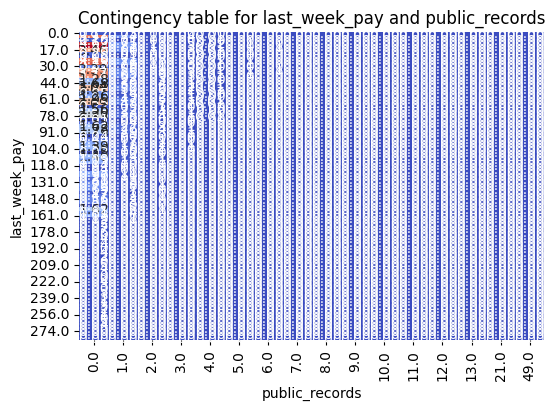

In [ ]:
# Loop to generate contingency tables with percentages
col2="public_records"
for col1 in select_columns:
    if col1 != col2:
        contingency_table = pd.crosstab(data[col1], data[col2], normalize='all') * 100
        print(f'Contingency table for {col1} and {col2} (in %):\n')
        print(contingency_table)
        print('\n')
        plt.figure(figsize=(6, 4))
        sns.heatmap(contingency_table, annot=True, cmap='coolwarm', fmt=".2f", cbar=False)
        plt.title(f'Contingency table for {col1} and {col2}')
        plt.show()

Contingency table for last_week_pay and total_acc (in %):

total_acc      1.000    2.000    3.000    4.000    5.000    6.000    7.000    \
last_week_pay                                                                  
0.000            0.000    0.000    0.000    0.001    0.000    0.001    0.002   
4.000            0.000    0.000    0.002    0.015    0.028    0.036    0.056   
8.000            0.000    0.001    0.000    0.001    0.000    0.001    0.000   
9.000            0.000    0.000    0.002    0.021    0.040    0.042    0.069   
13.000           0.000    0.000    0.002    0.023    0.039    0.039    0.058   
17.000           0.000    0.000    0.000    0.018    0.024    0.034    0.041   
18.000           0.000    0.000    0.000    0.001    0.002    0.002    0.003   
21.000           0.000    0.000    0.000    0.000    0.000    0.000    0.002   
22.000           0.000    0.000    0.000    0.014    0.028    0.032    0.046   
26.000           0.000    0.000    0.000    0.007    0.029   

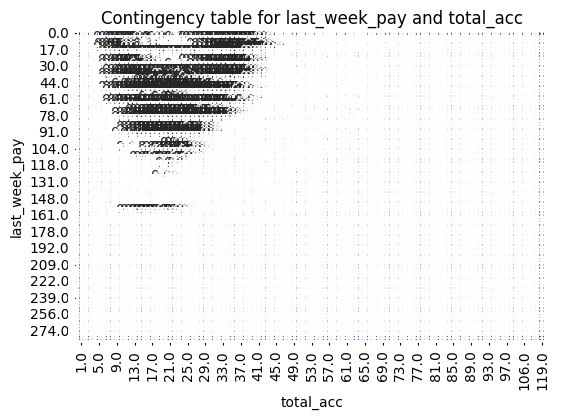

In [ ]:
# Loop to generate contingency tables with percentages
col2="total_acc"
for col1 in select_columns:
    if col1 != col2:
        contingency_table = pd.crosstab(data[col1], data[col2], normalize='all') * 100
        print(f'Contingency table for {col1} and {col2} (in %):\n')
        print(contingency_table)
        print('\n')
        plt.figure(figsize=(6, 4))
        sns.heatmap(contingency_table, annot=True, cmap='coolwarm', fmt=".2f", cbar=False)
        plt.title(f'Contingency table for {col1} and {col2}')
        plt.show()

In [ ]:
# Loop to generate contingency tables with percentages
#col2="total_current_balance"
#for col1 in select_columns_test:
 #   if col1 != col2:
  #      contingency_table = pd.crosstab(data_test[col1], data_test[col2], normalize='all') * 100
   #     print(f'Contingency table for {col1} and {col2} (in %):\n')
    #    print(contingency_table)
     #   print('\n')
      #  plt.figure(figsize=(6, 4))
       # sns.heatmap(contingency_table, annot=True, cmap='coolwarm', fmt=".2f", cbar=False)
        #plt.title(f'Contingency table for {col1} and {col2}')
        #plt.show()

In [ ]:
# Loop to generate contingency tables with percentages
#col2="total_revolving_limit"
#for col1 in select_columns_test:
 #   if col1 != col2:
  #      contingency_table = pd.crosstab(data_test[col1], data_test[col2], normalize='all') * 100
   #     print(f'Contingency table for {col1} and {col2} (in %):\n')
    #    print(contingency_table)
     #   print('\n')
      #  plt.figure(figsize=(6, 4))
       # sns.heatmap(contingency_table, annot=True, cmap='coolwarm', fmt=".2f", cbar=False)
        #plt.title(f'Contingency table for {col1} and {col2}')
        #plt.show()

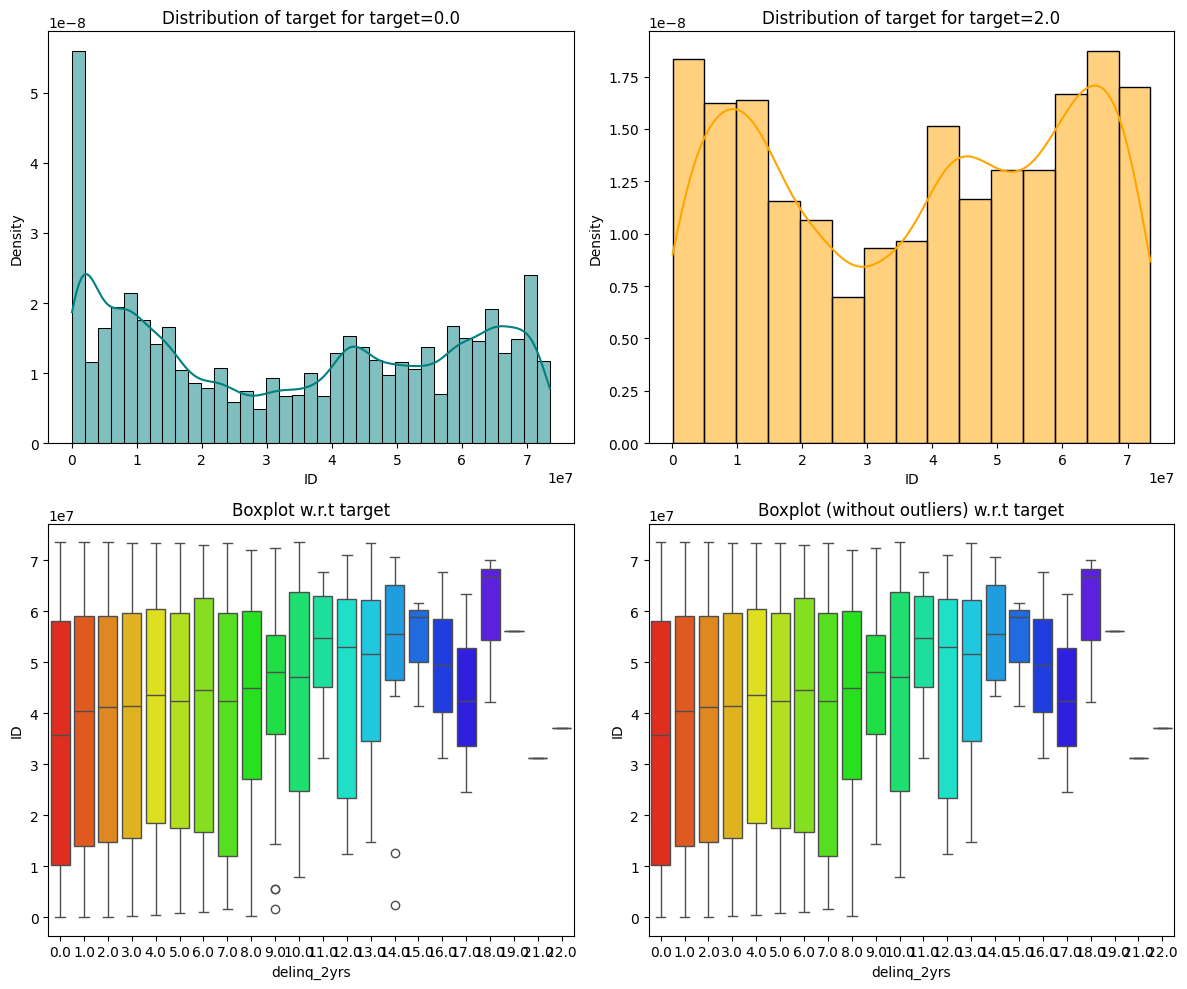

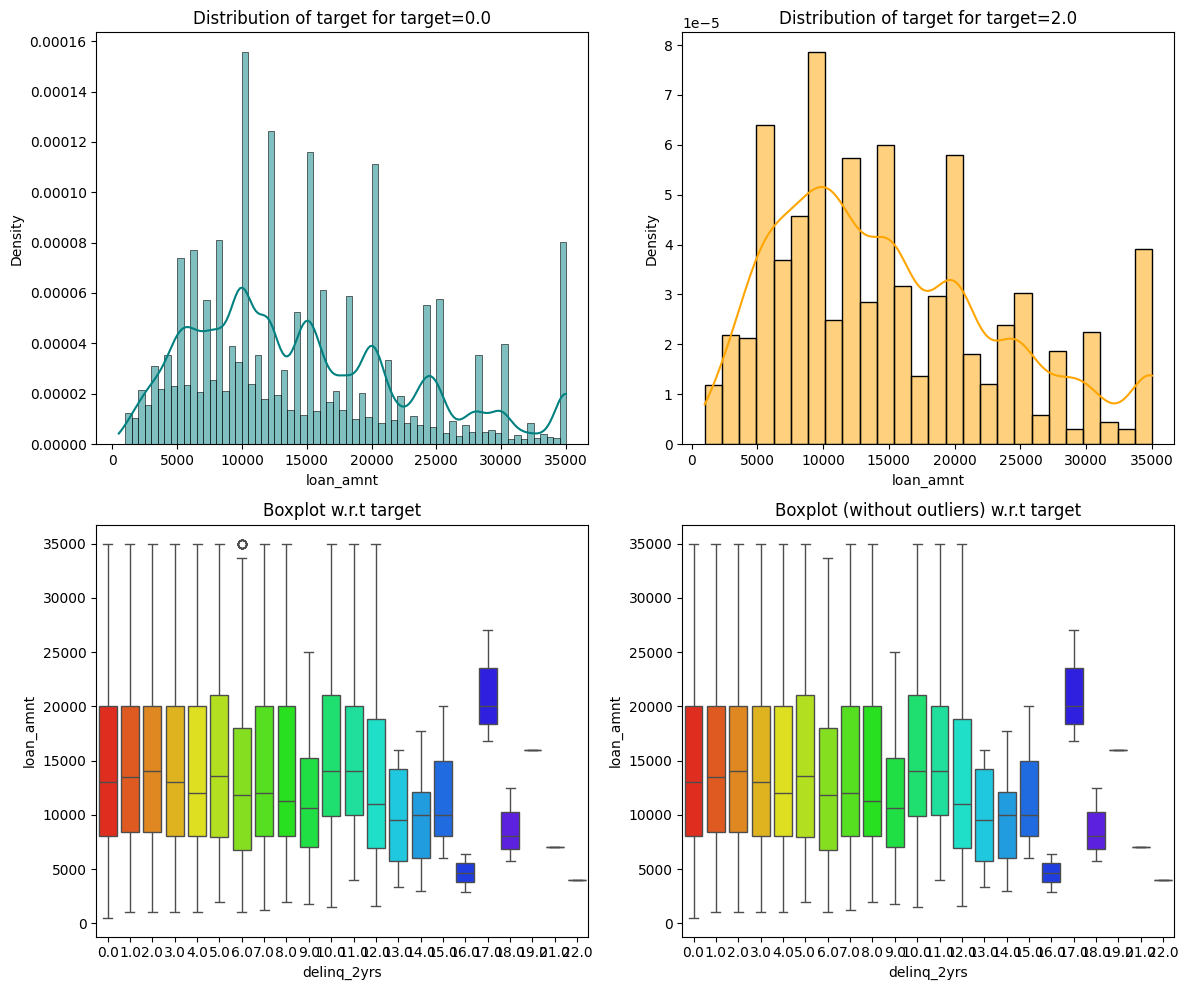

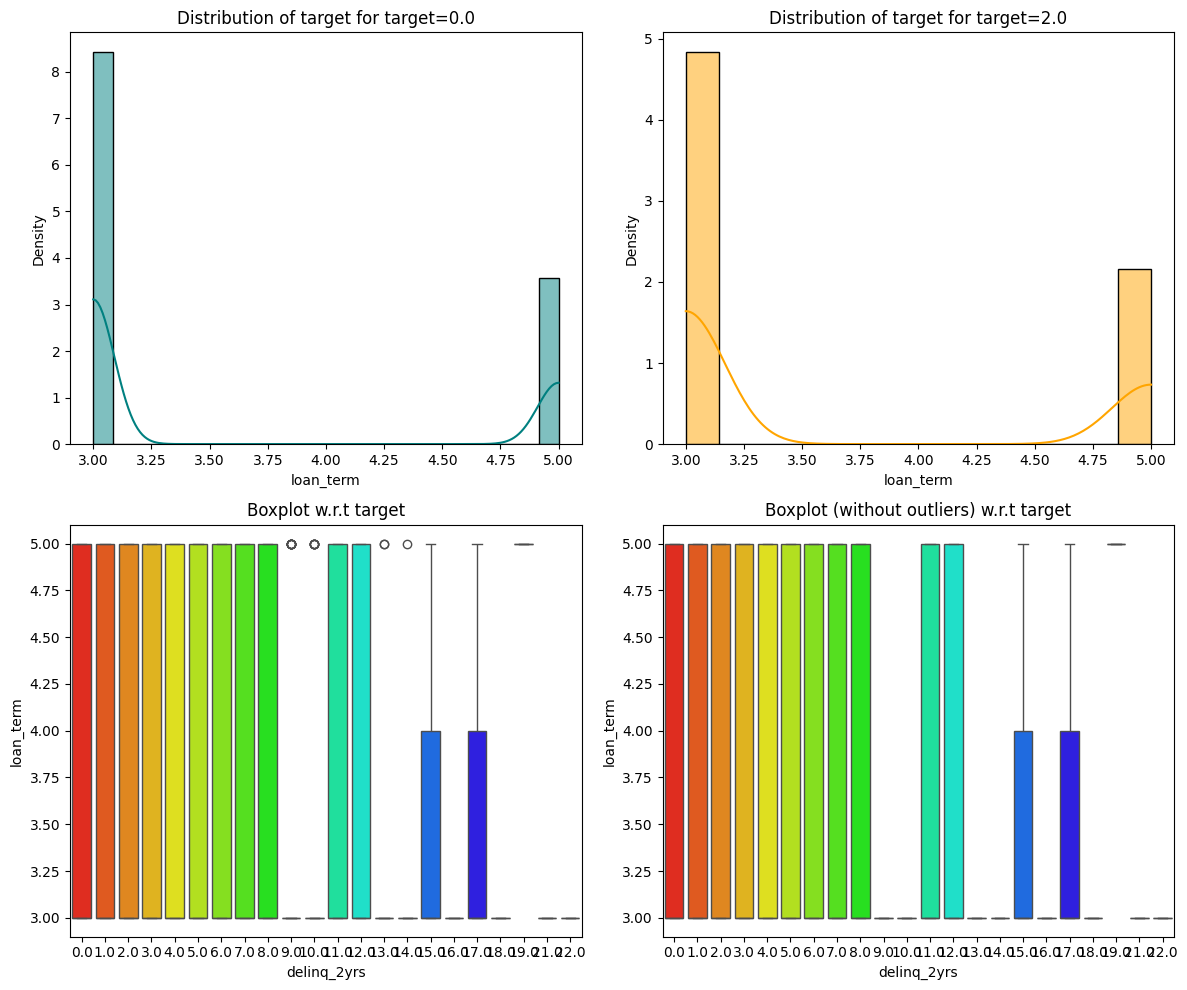

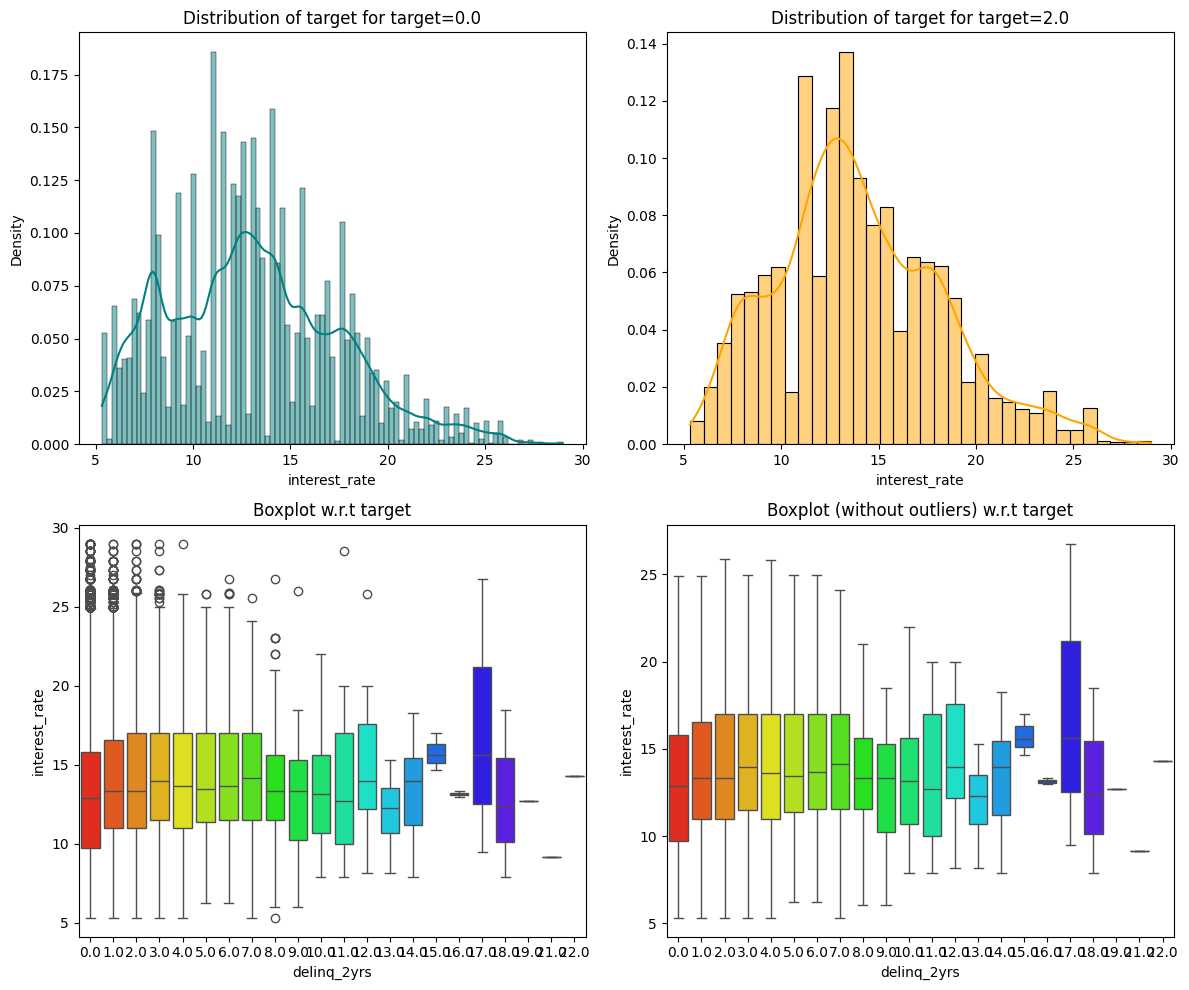

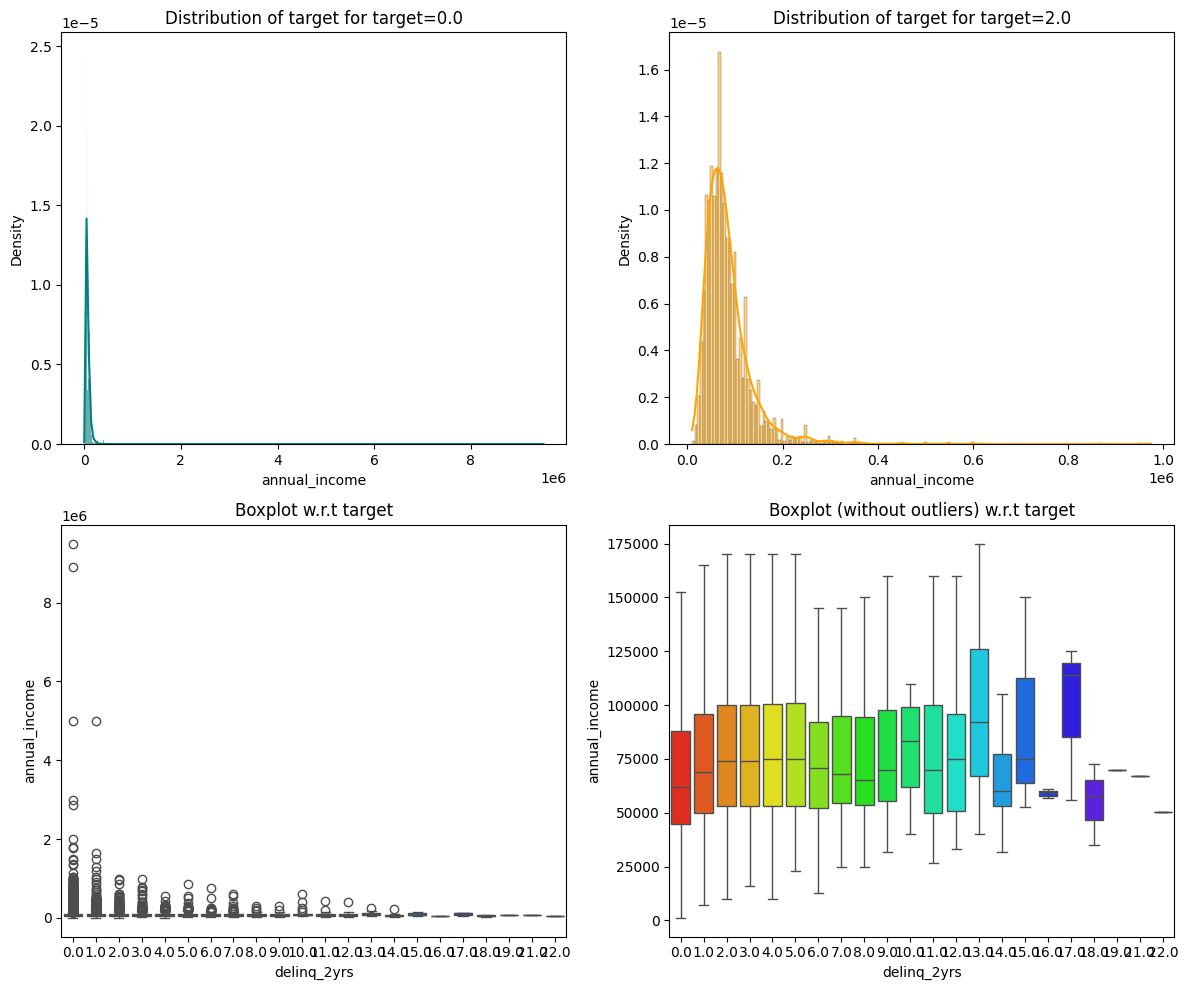

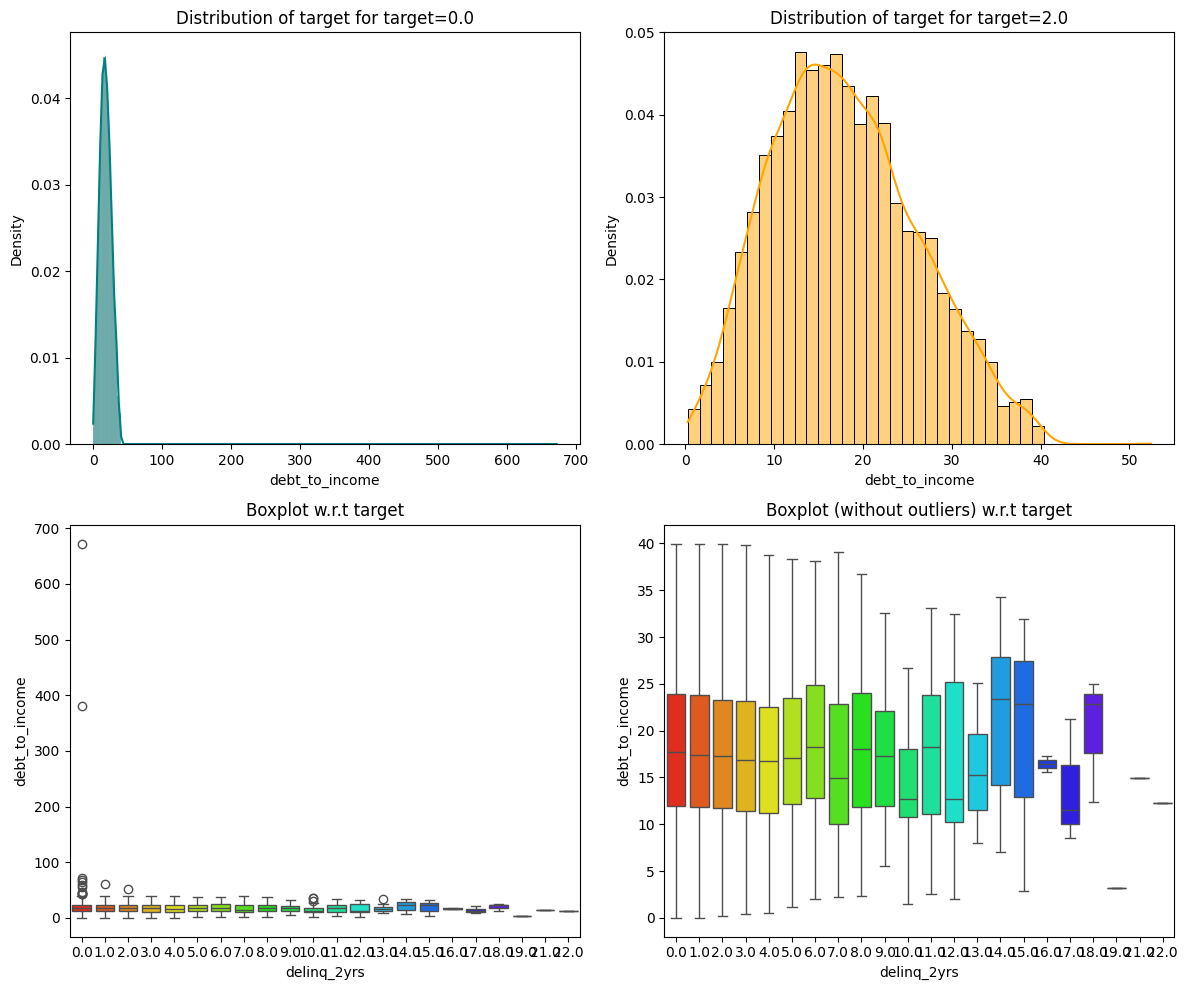

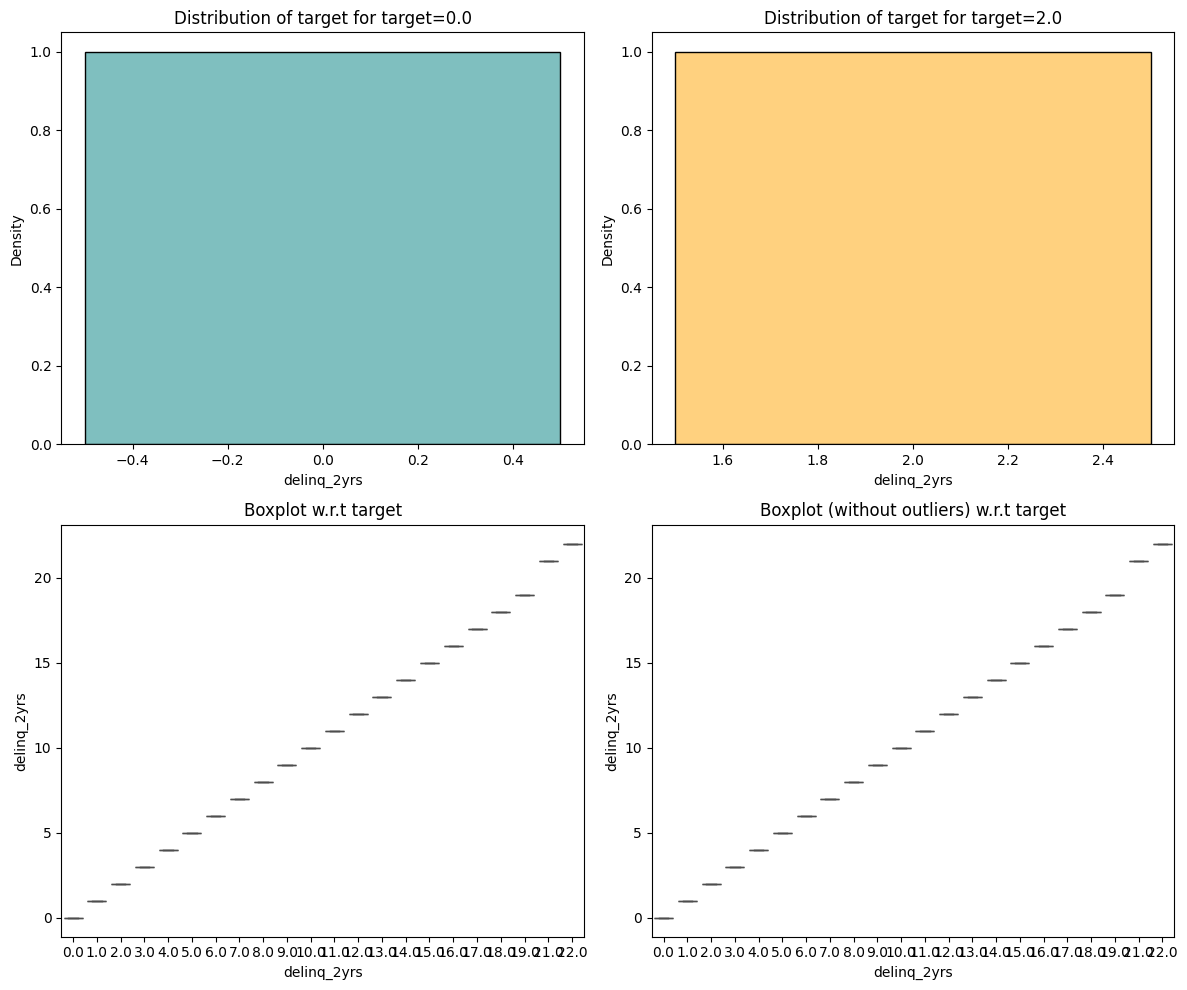

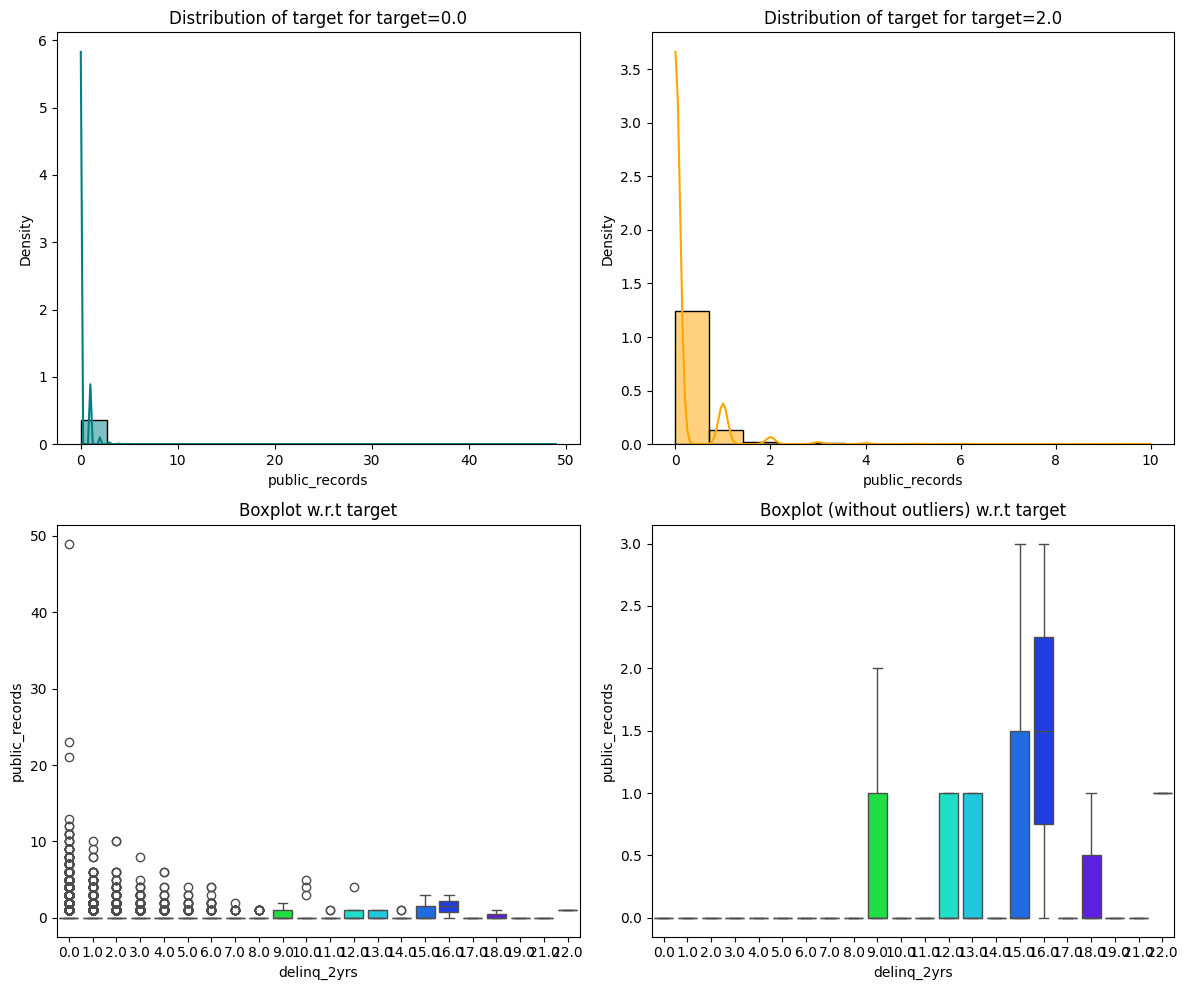

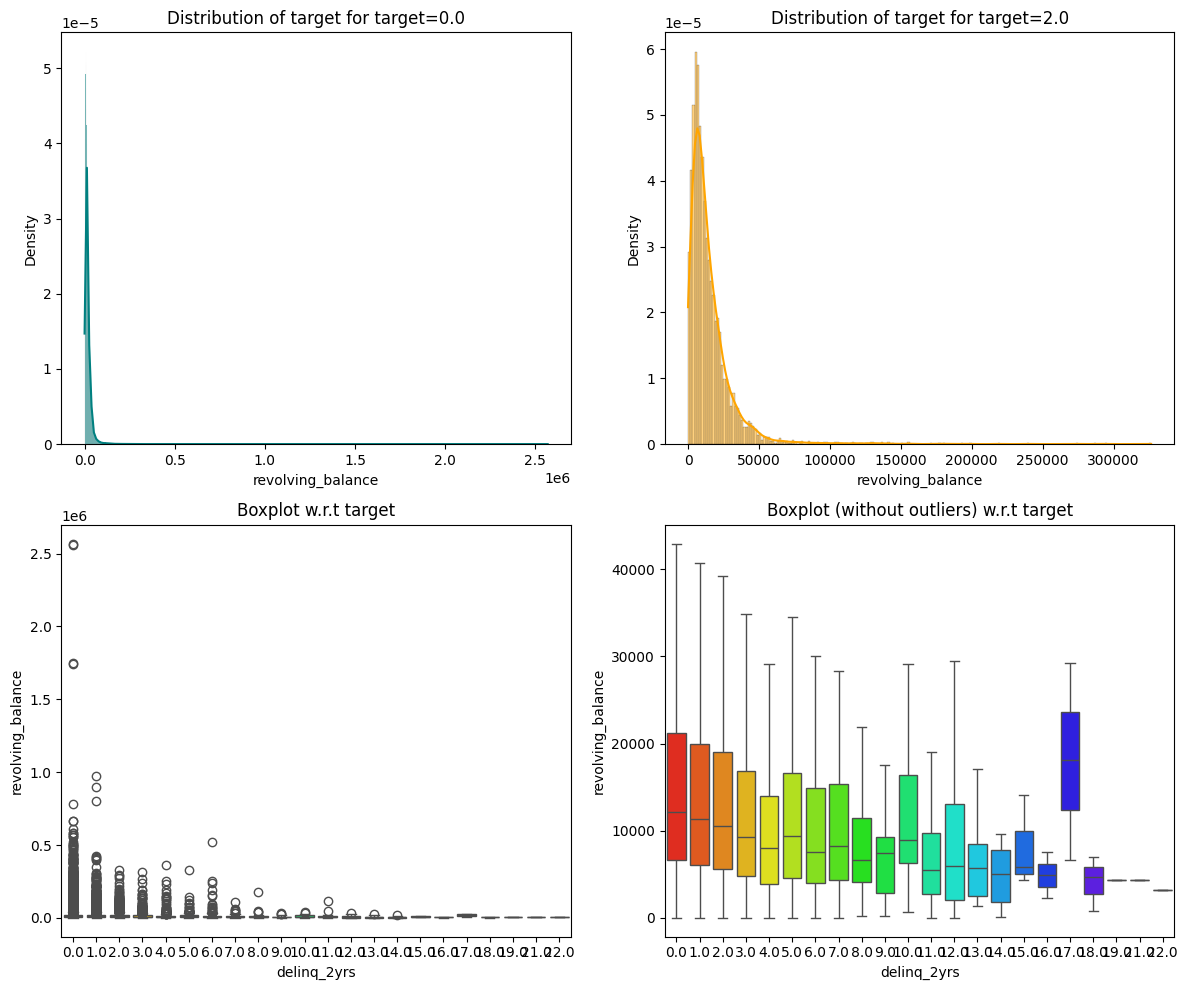

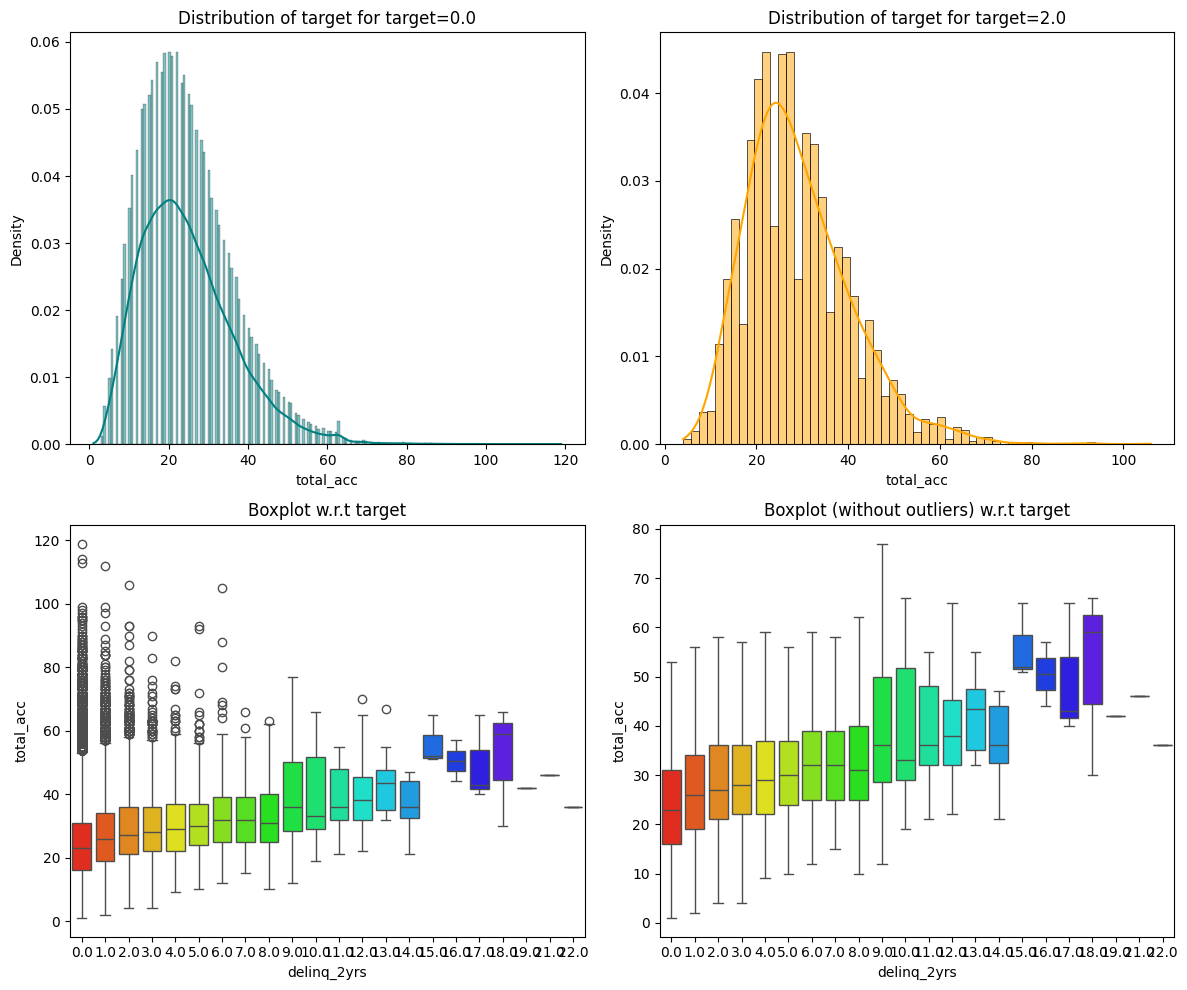

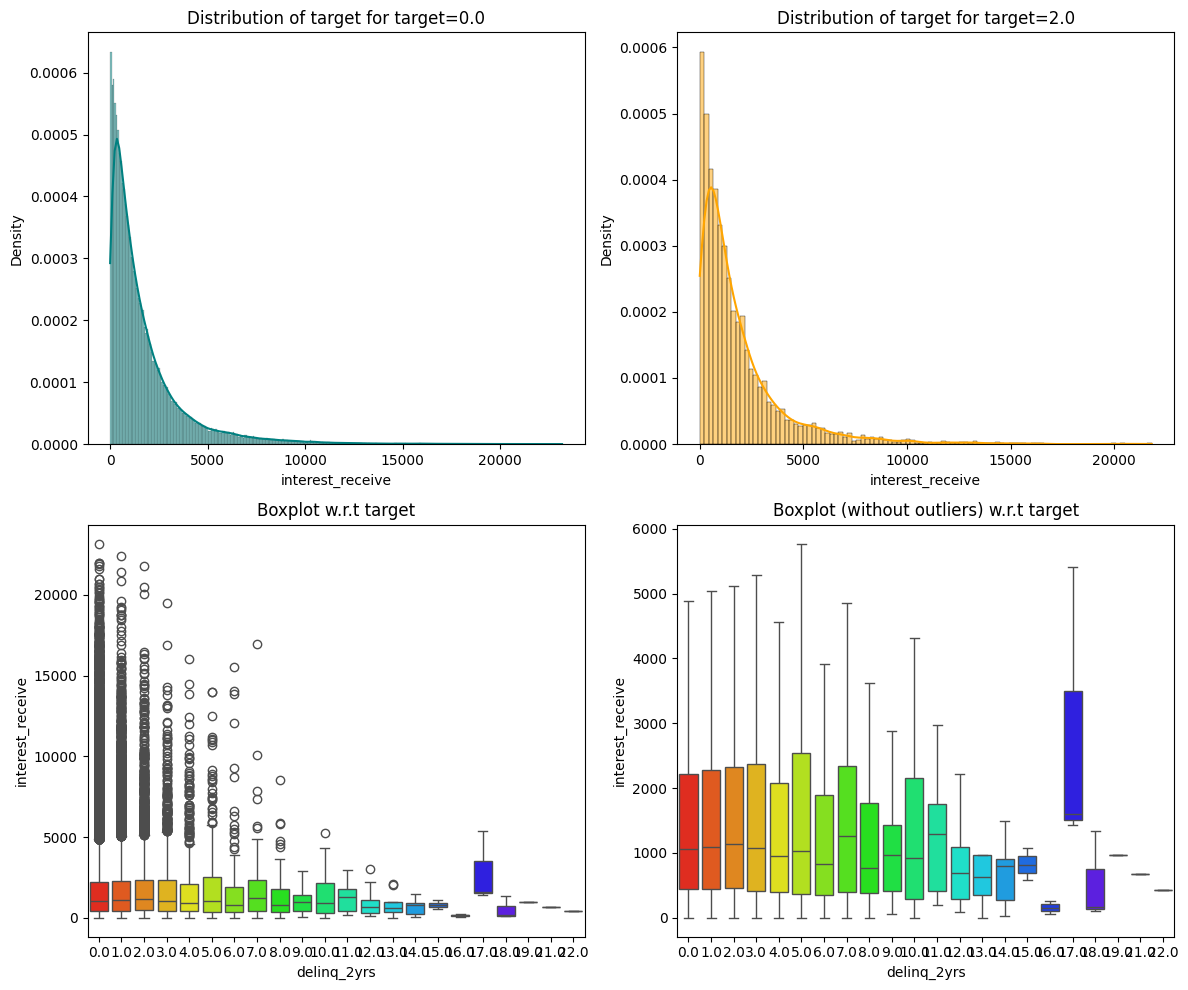

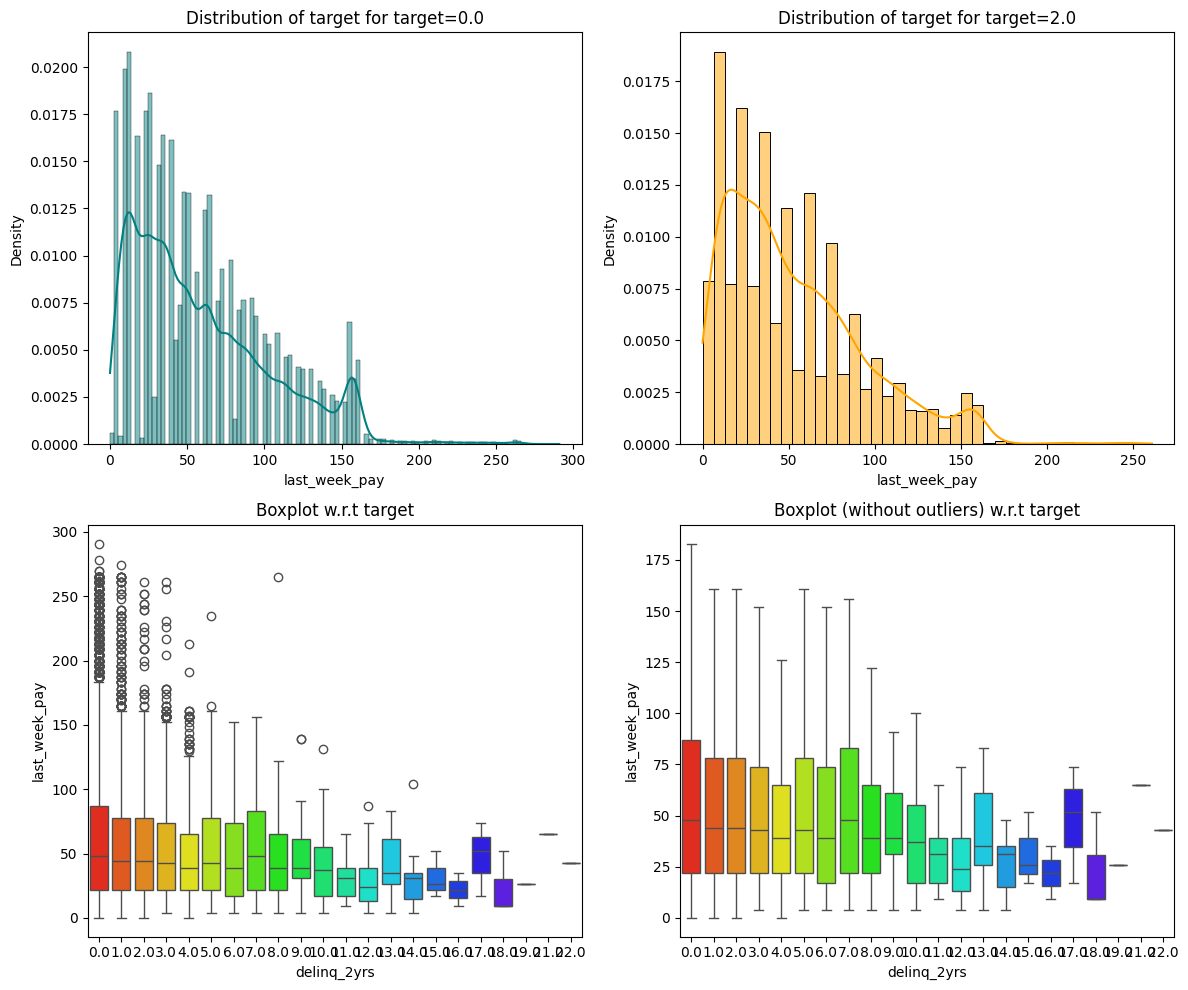

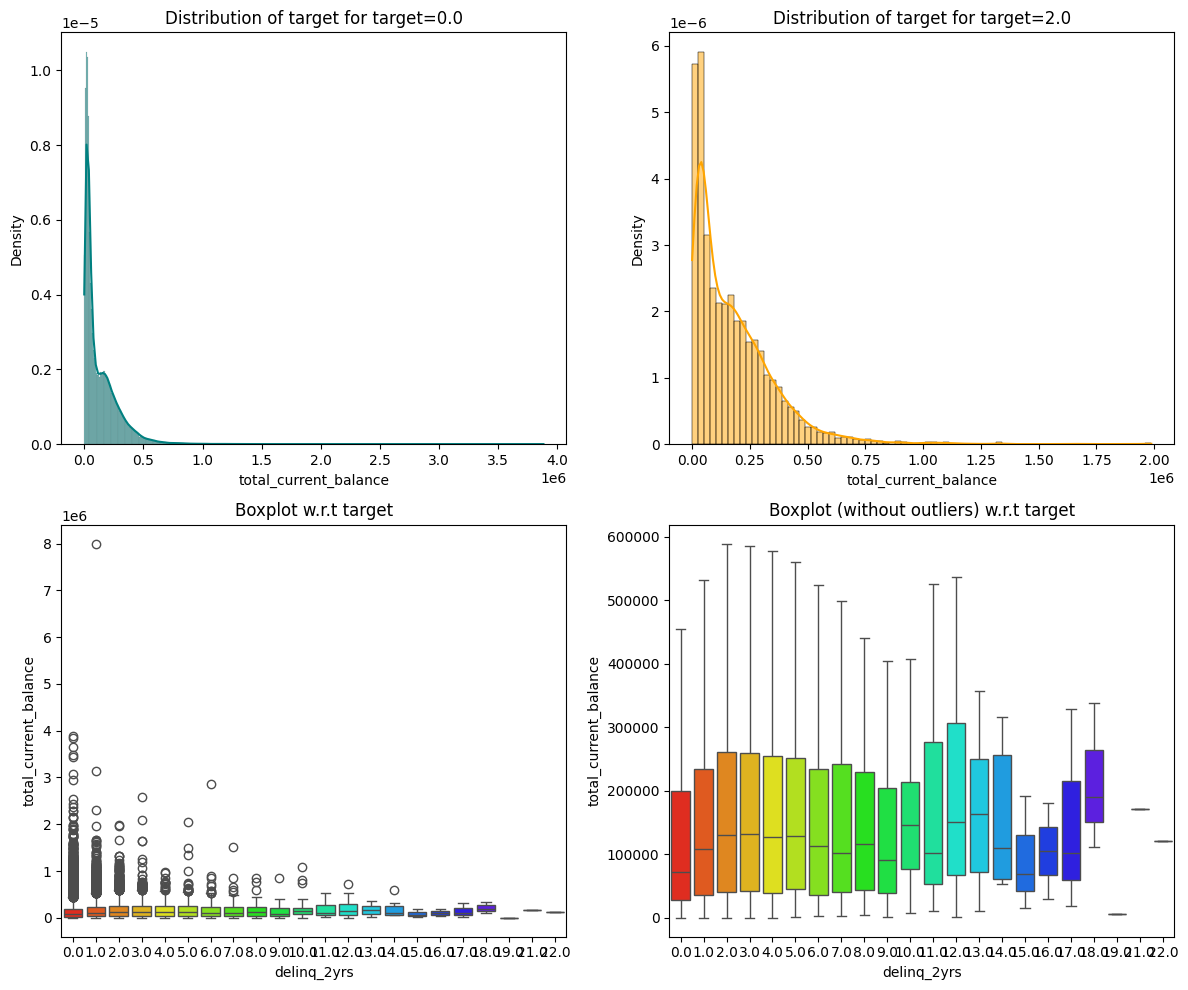

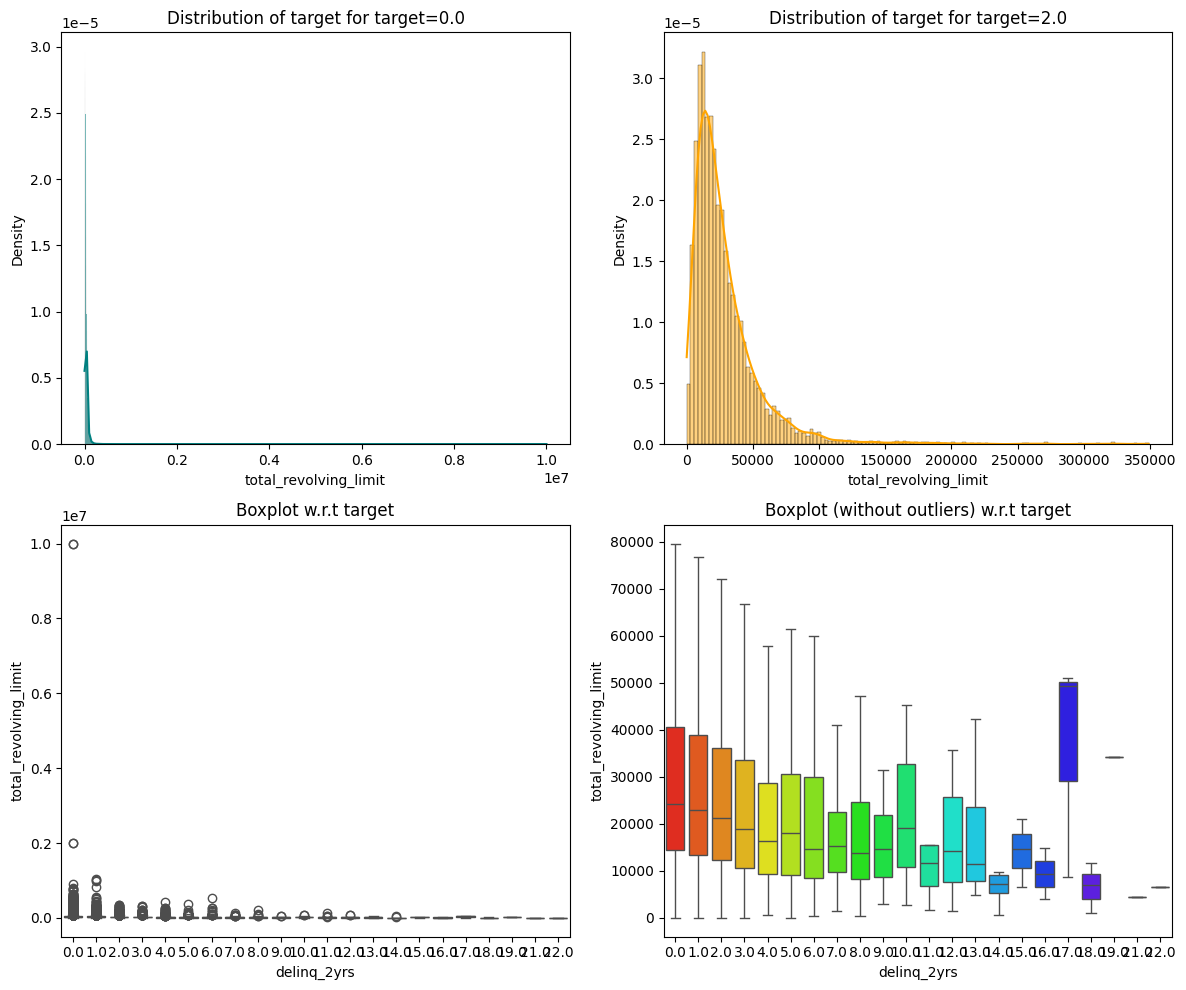

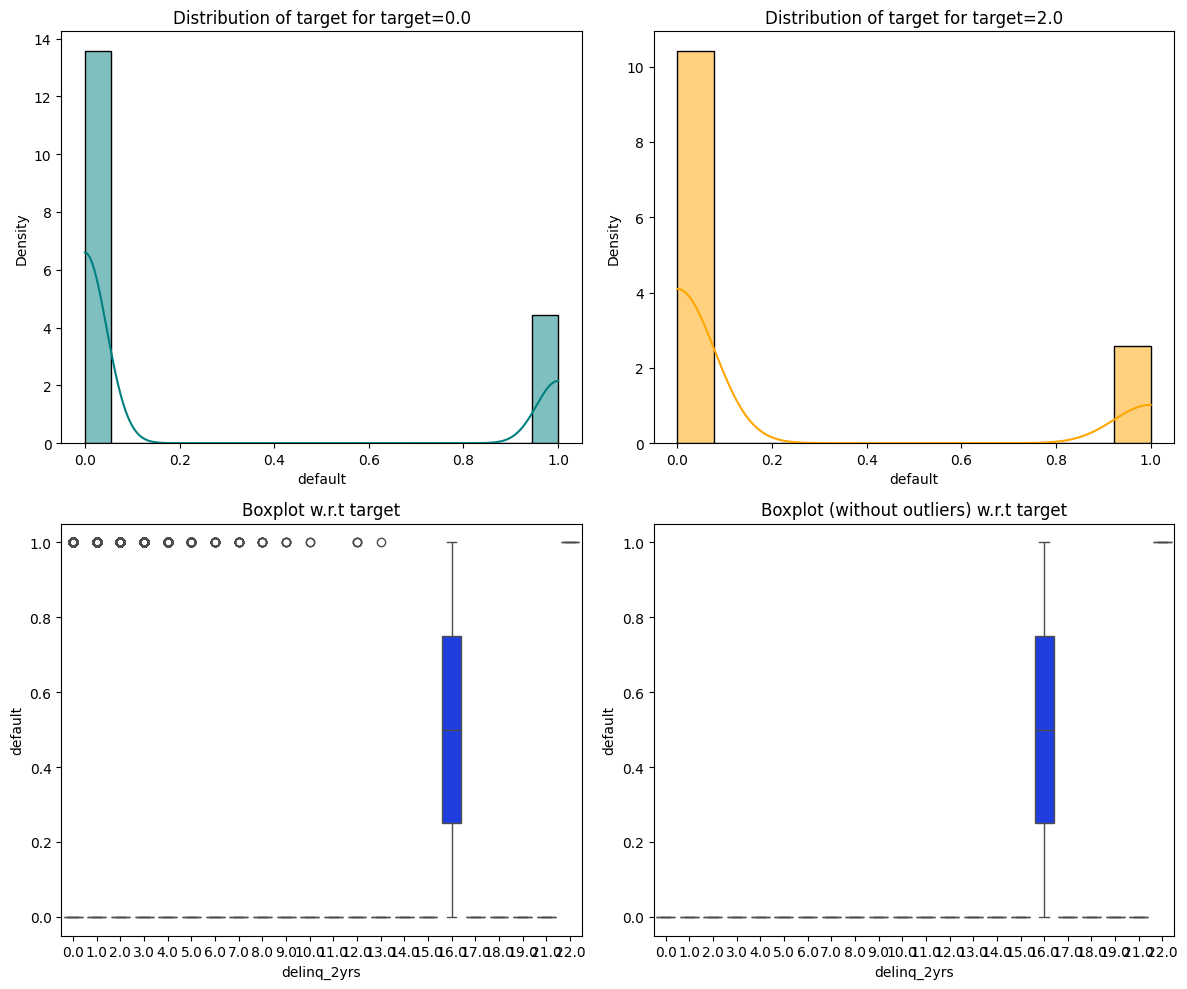

In [ ]:
for feature in data.select_dtypes(include=['number']).columns:
    distribution_plot_wrt_target(data, feature, "delinq_2yrs")

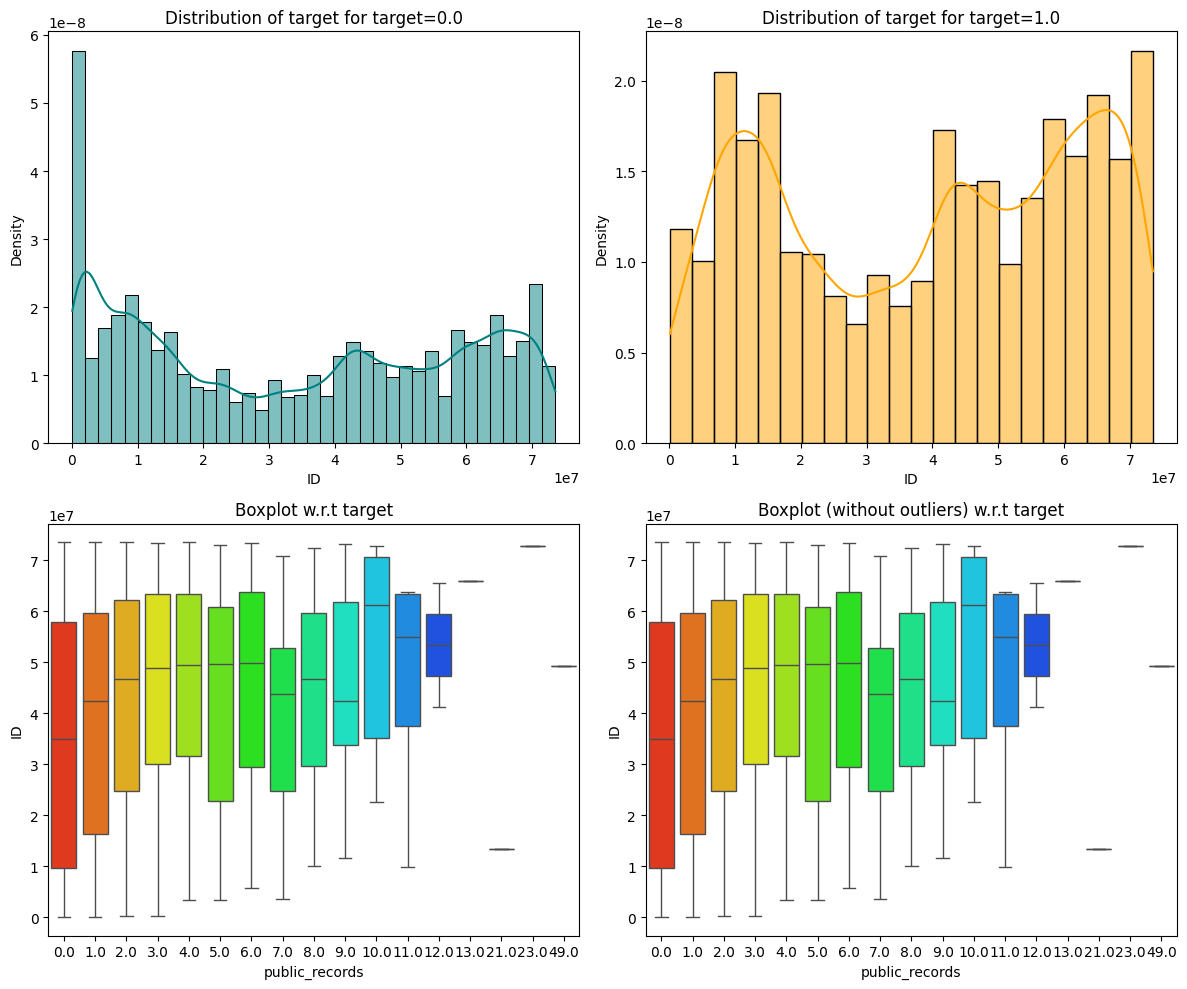

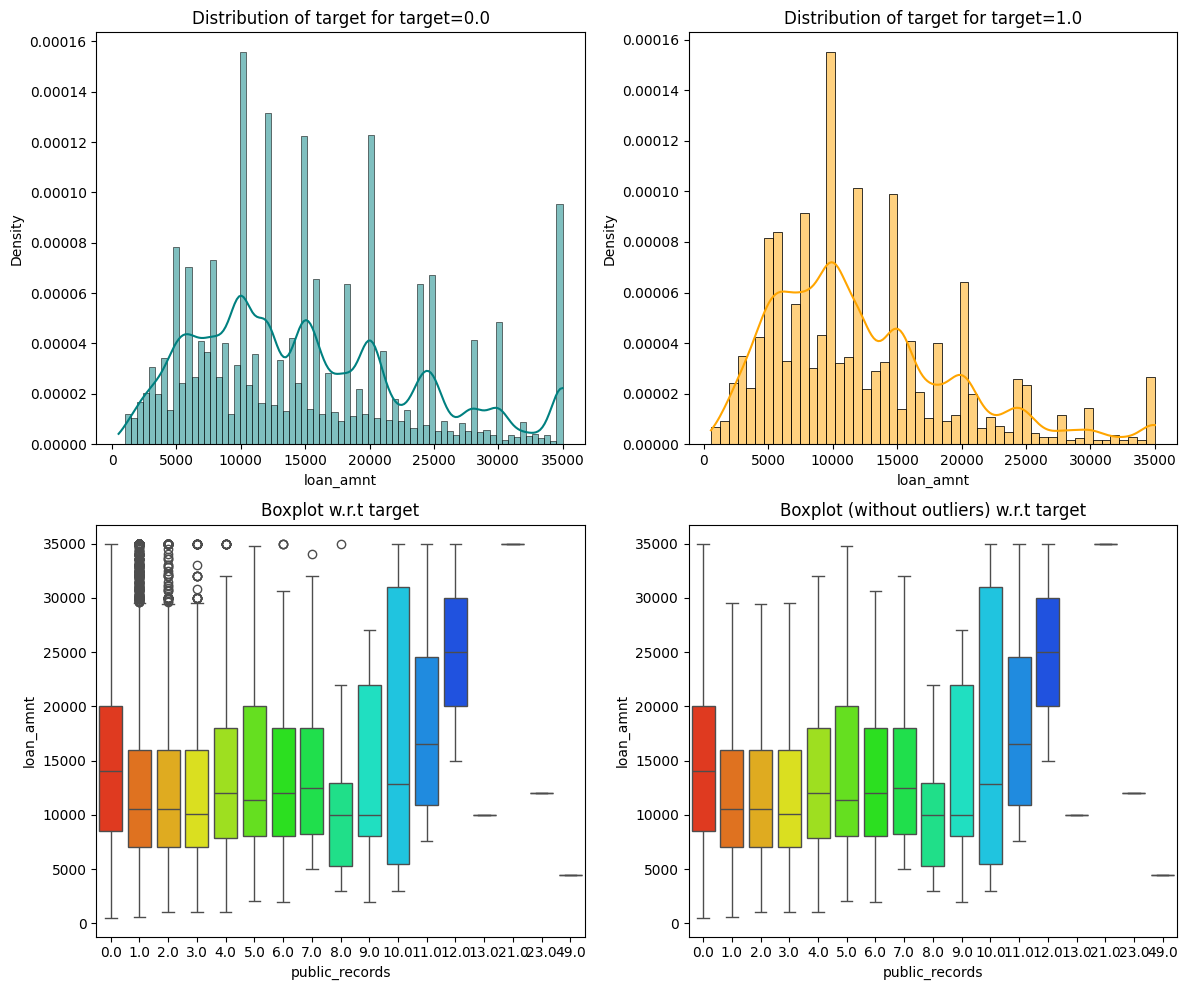

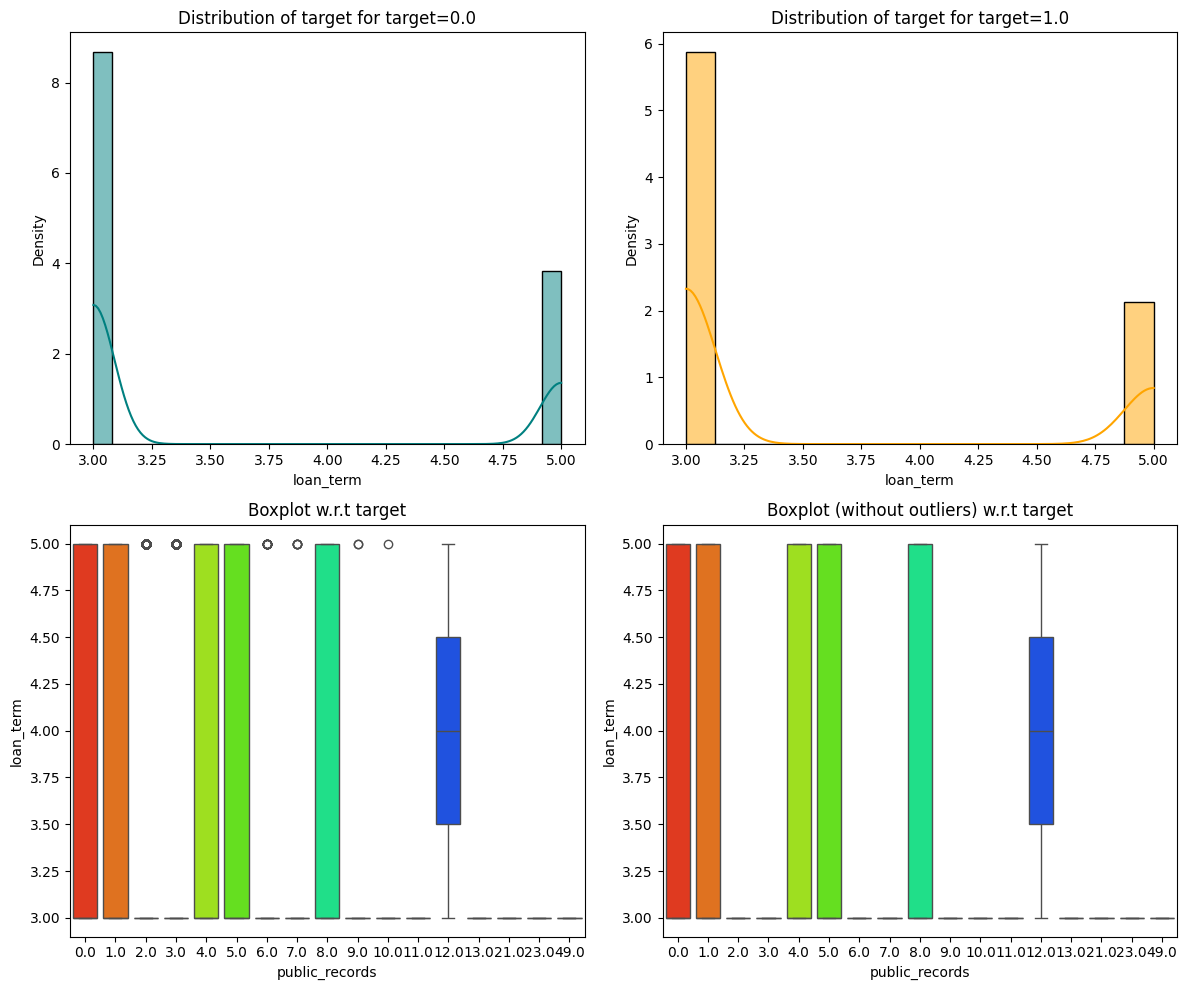

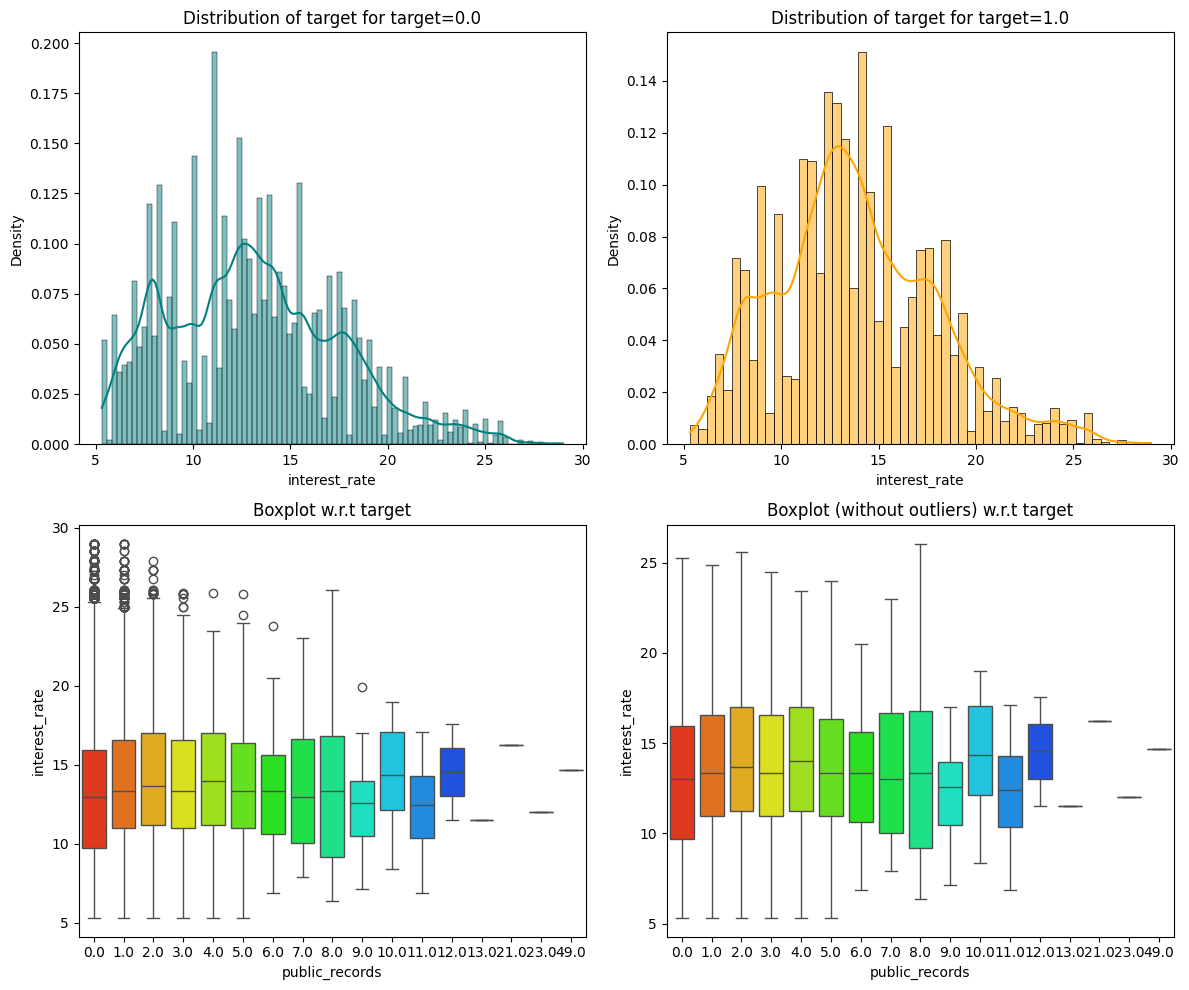

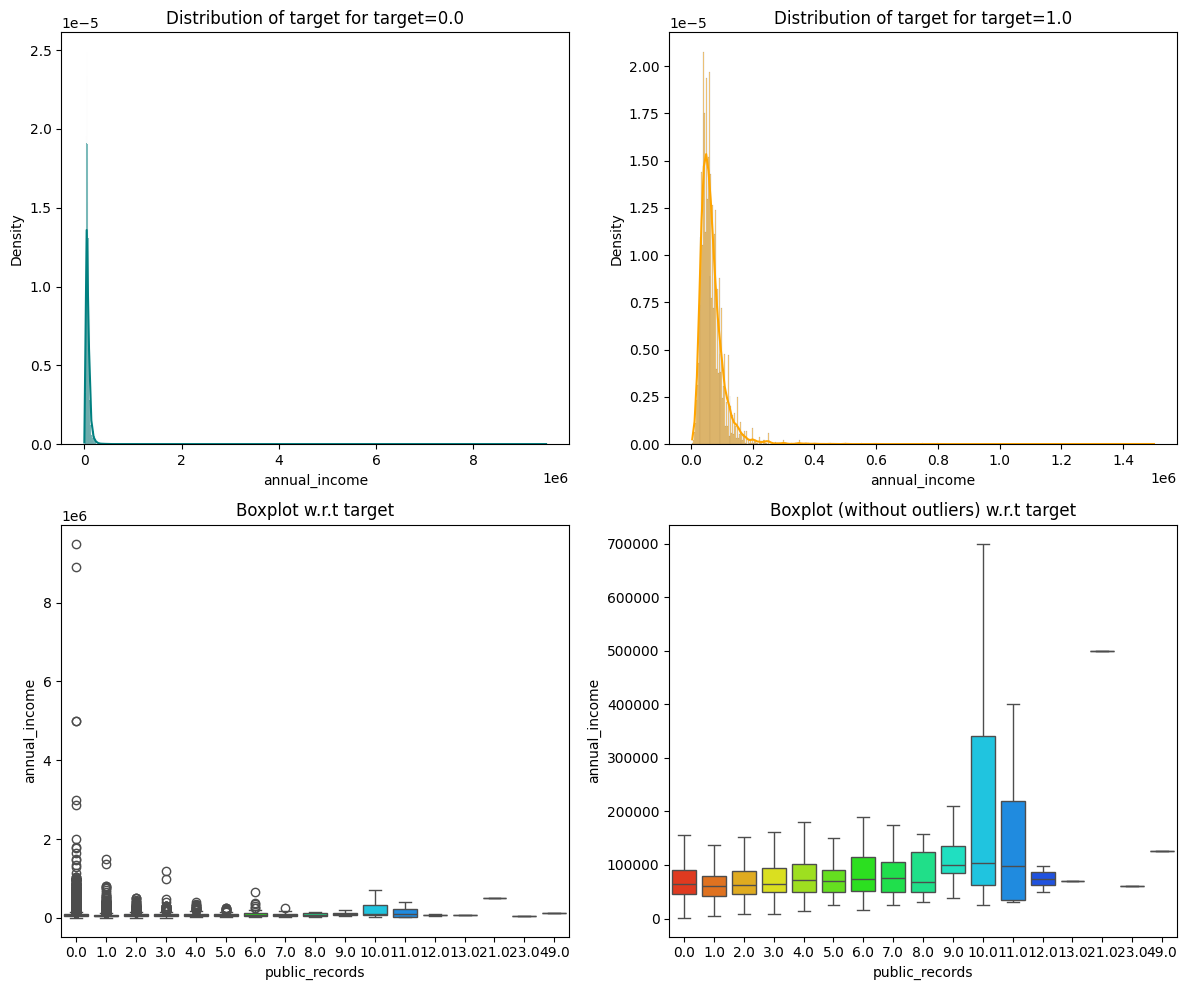

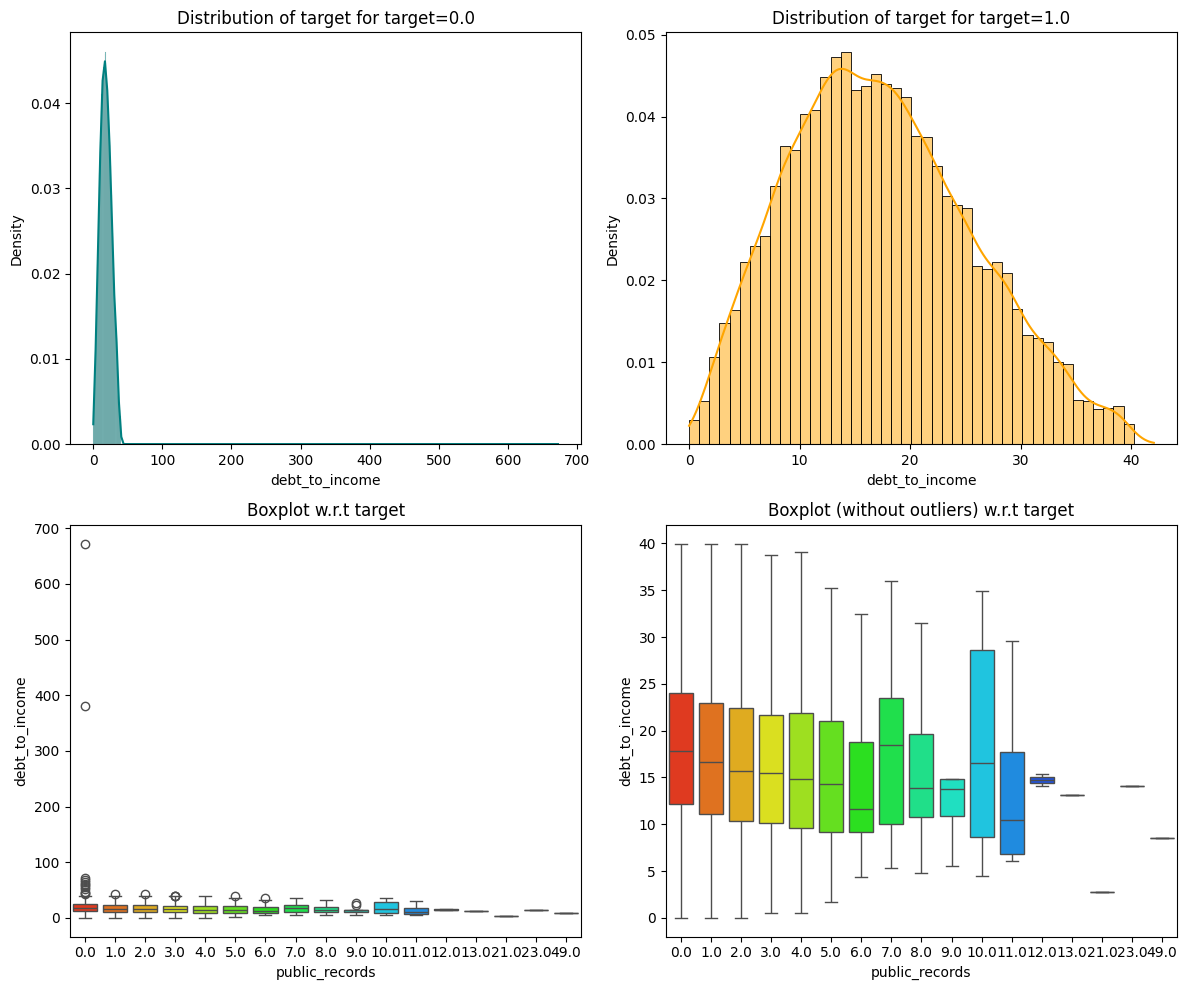

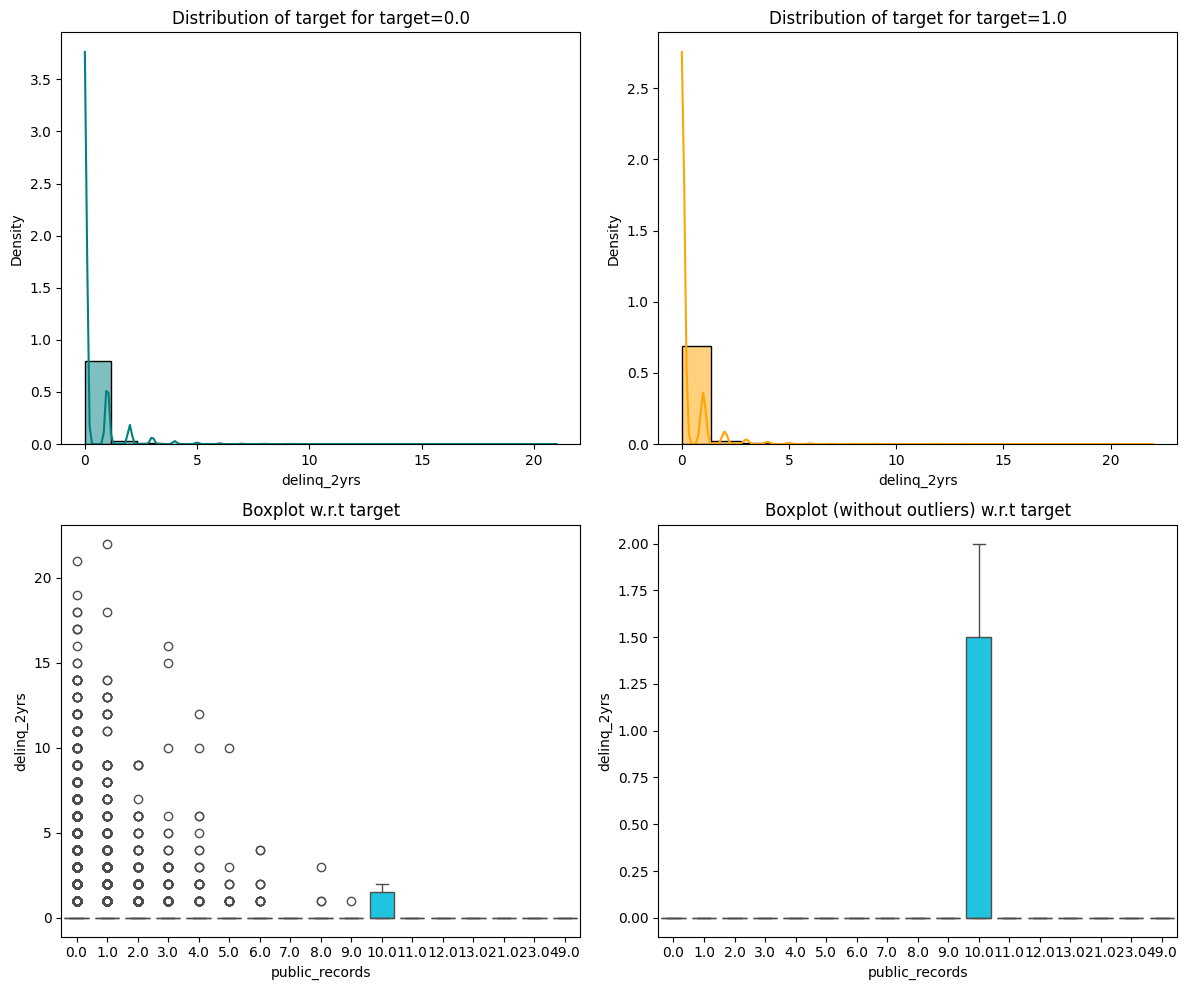

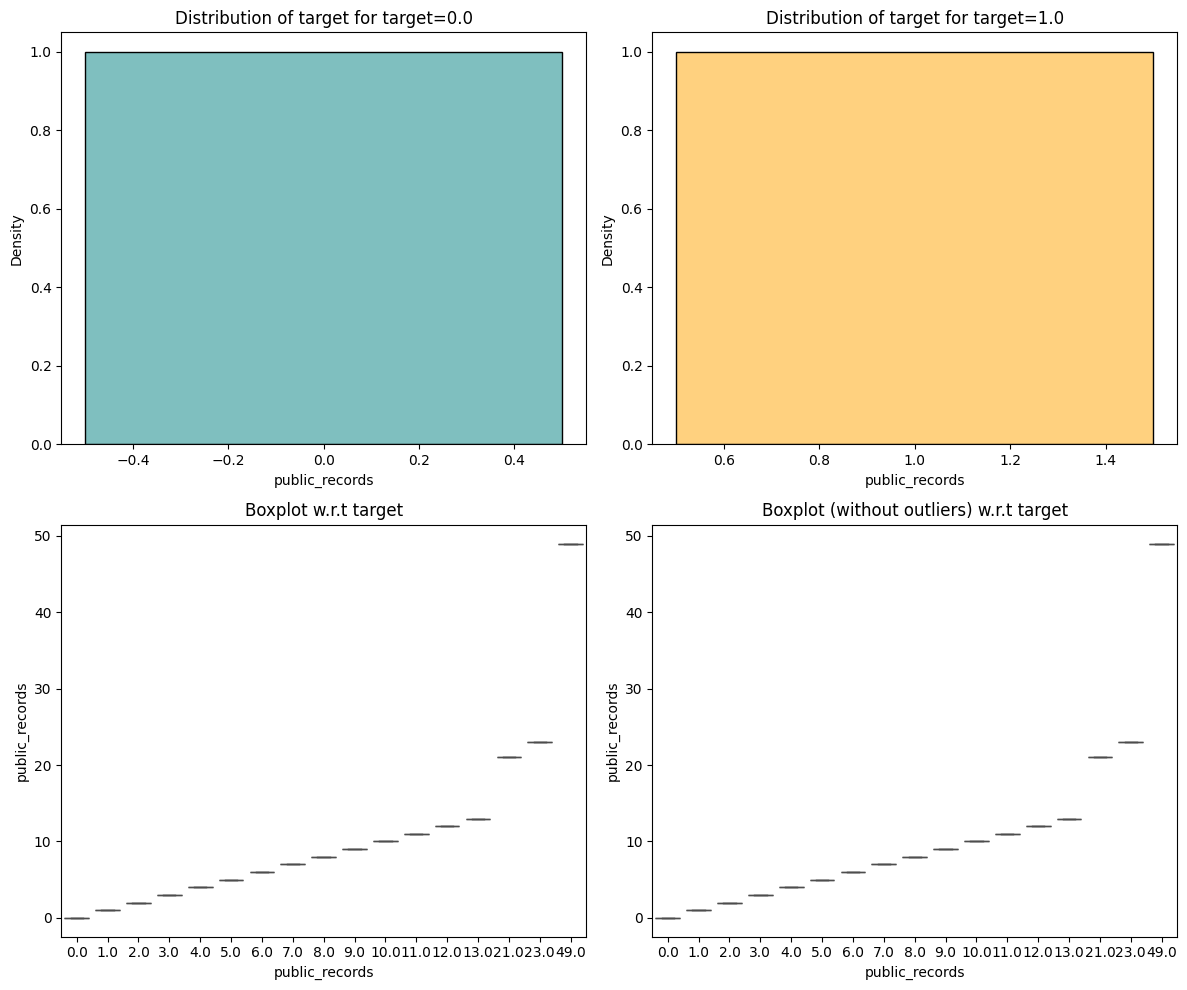

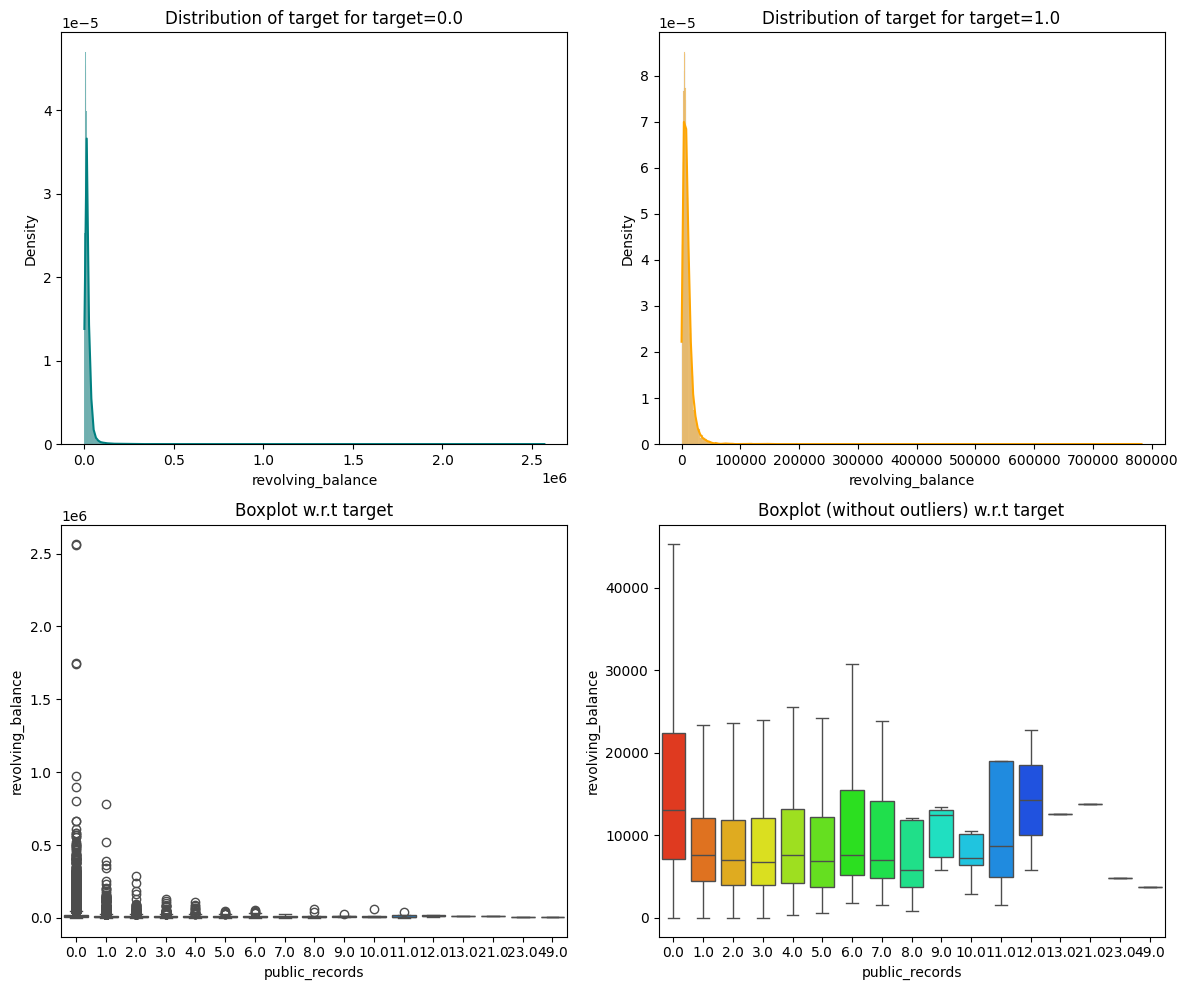

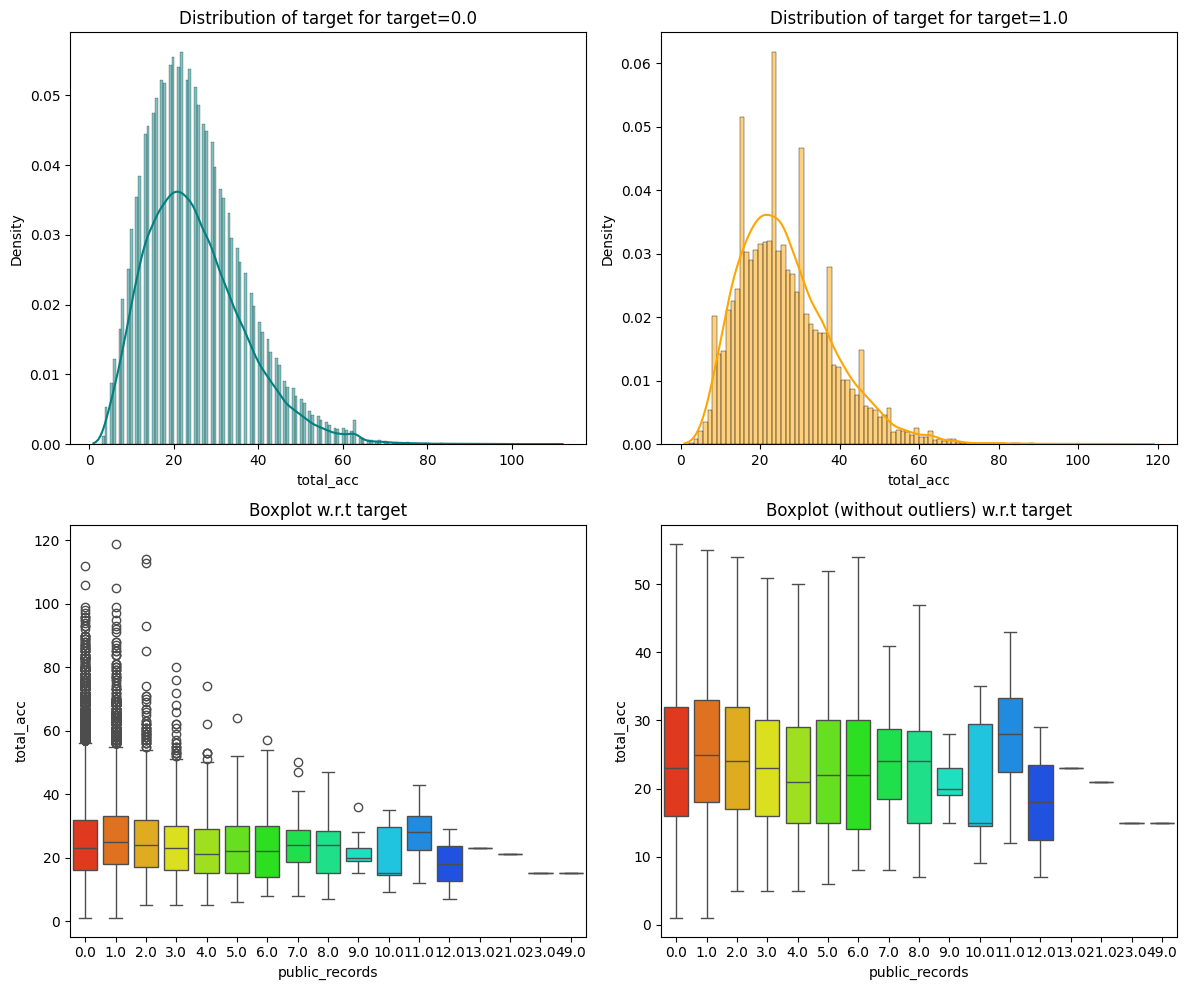

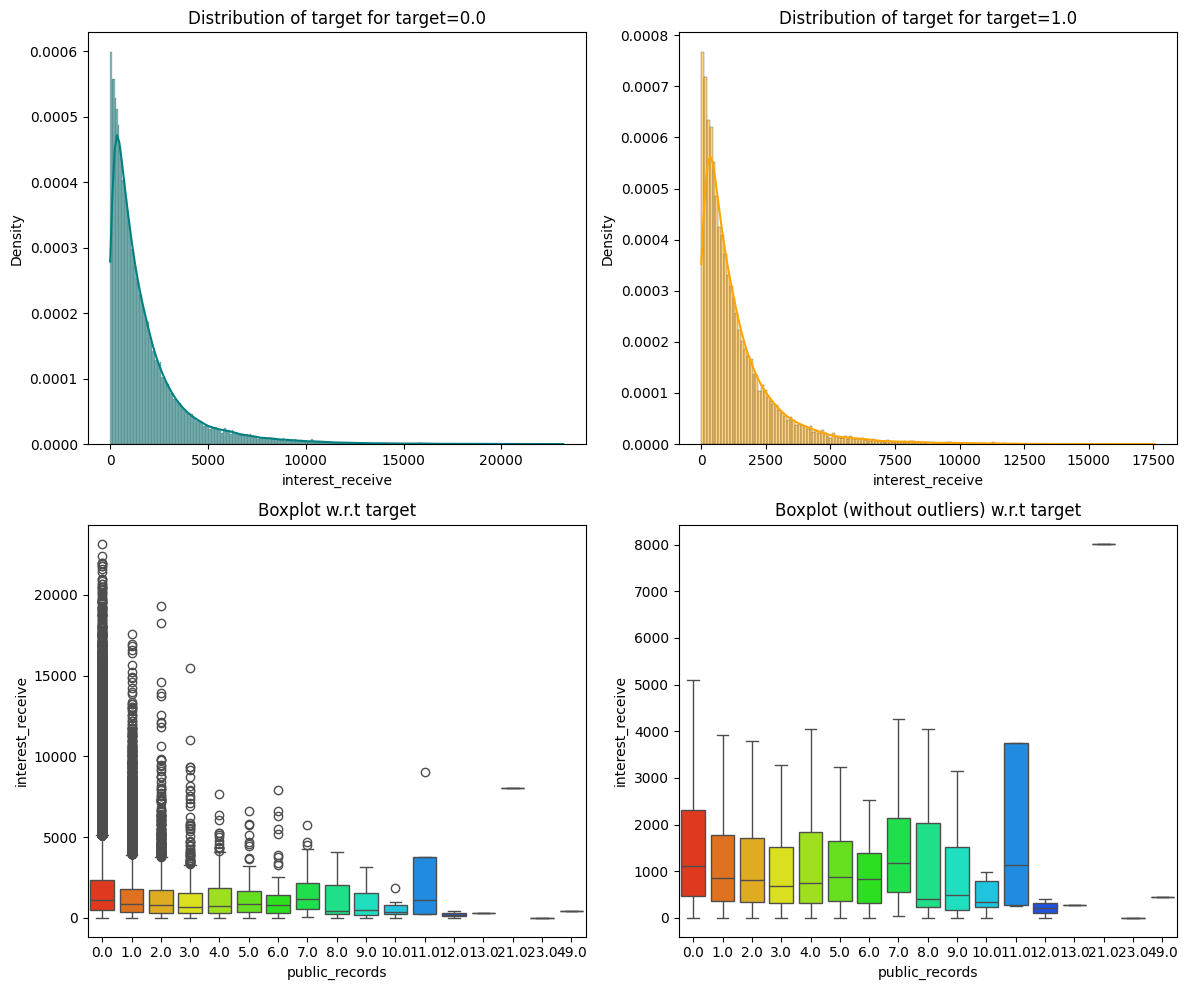

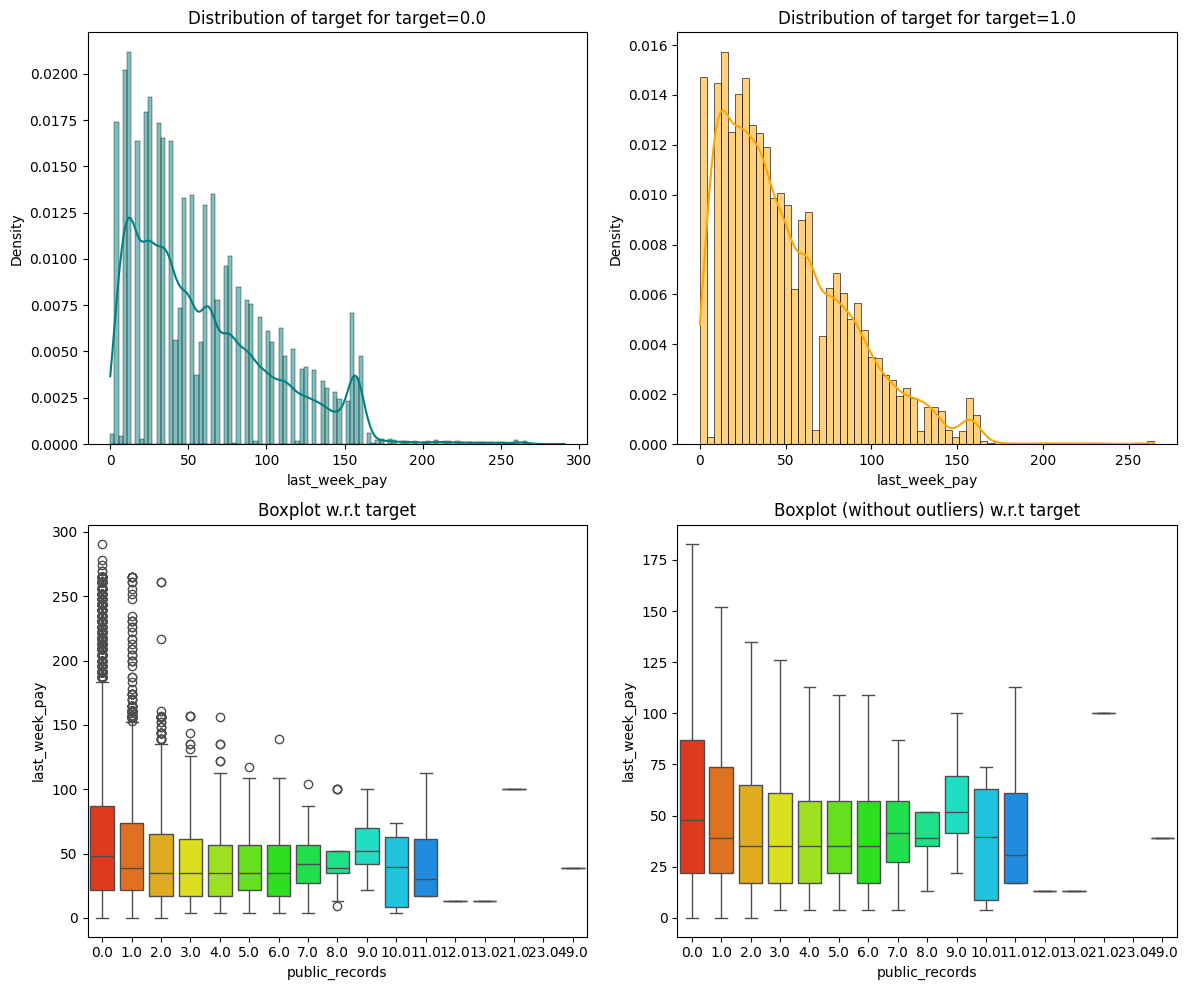

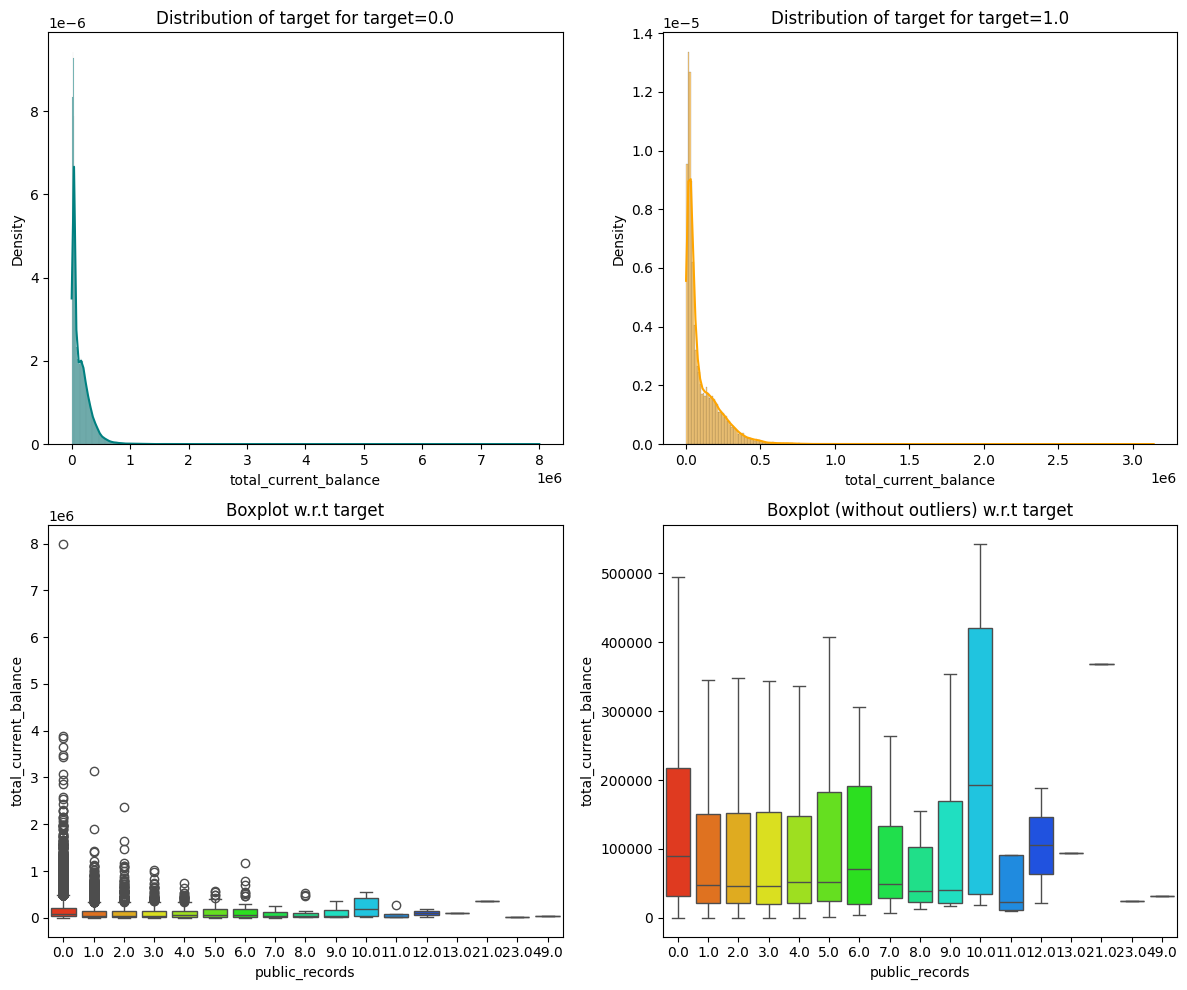

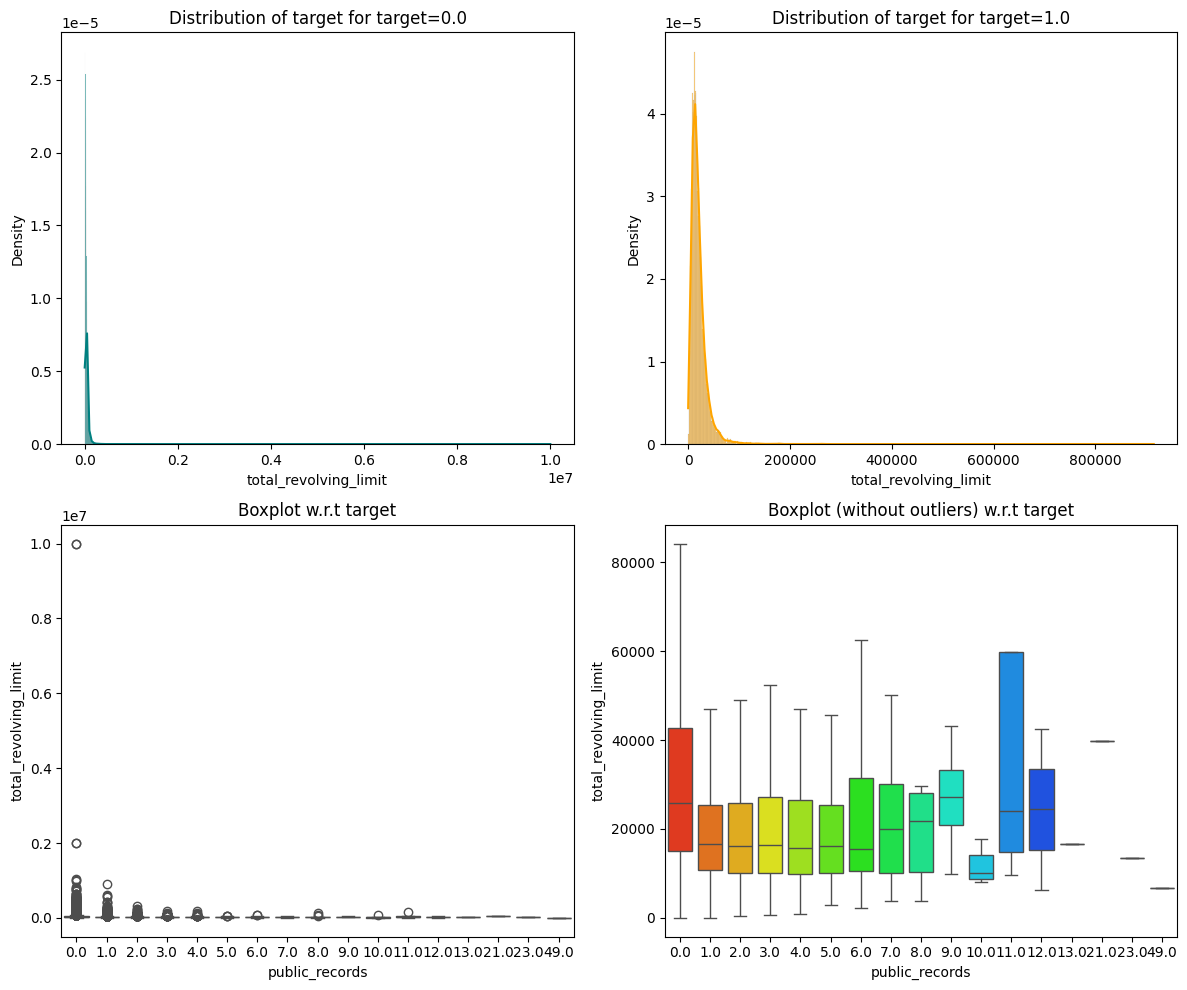

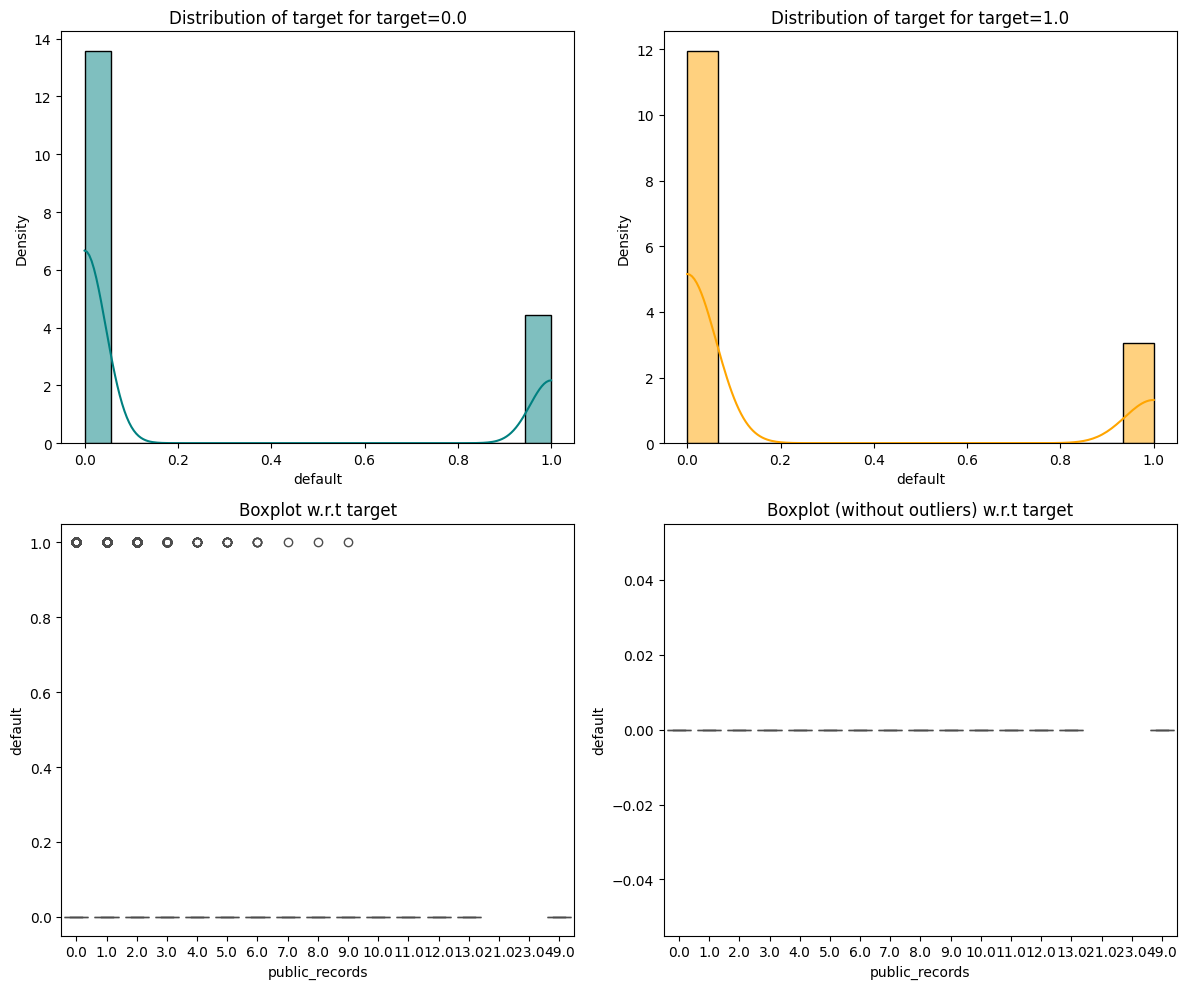

In [ ]:
for feature in data.select_dtypes(include=['number']).columns:
    distribution_plot_wrt_target(data, feature, "public_records")

In [ ]:
for feature in data.select_dtypes(include=['number']).columns:
    distribution_plot_wrt_target(data, feature, "total_acc")

Output hidden; open in https://colab.research.google.com to view.

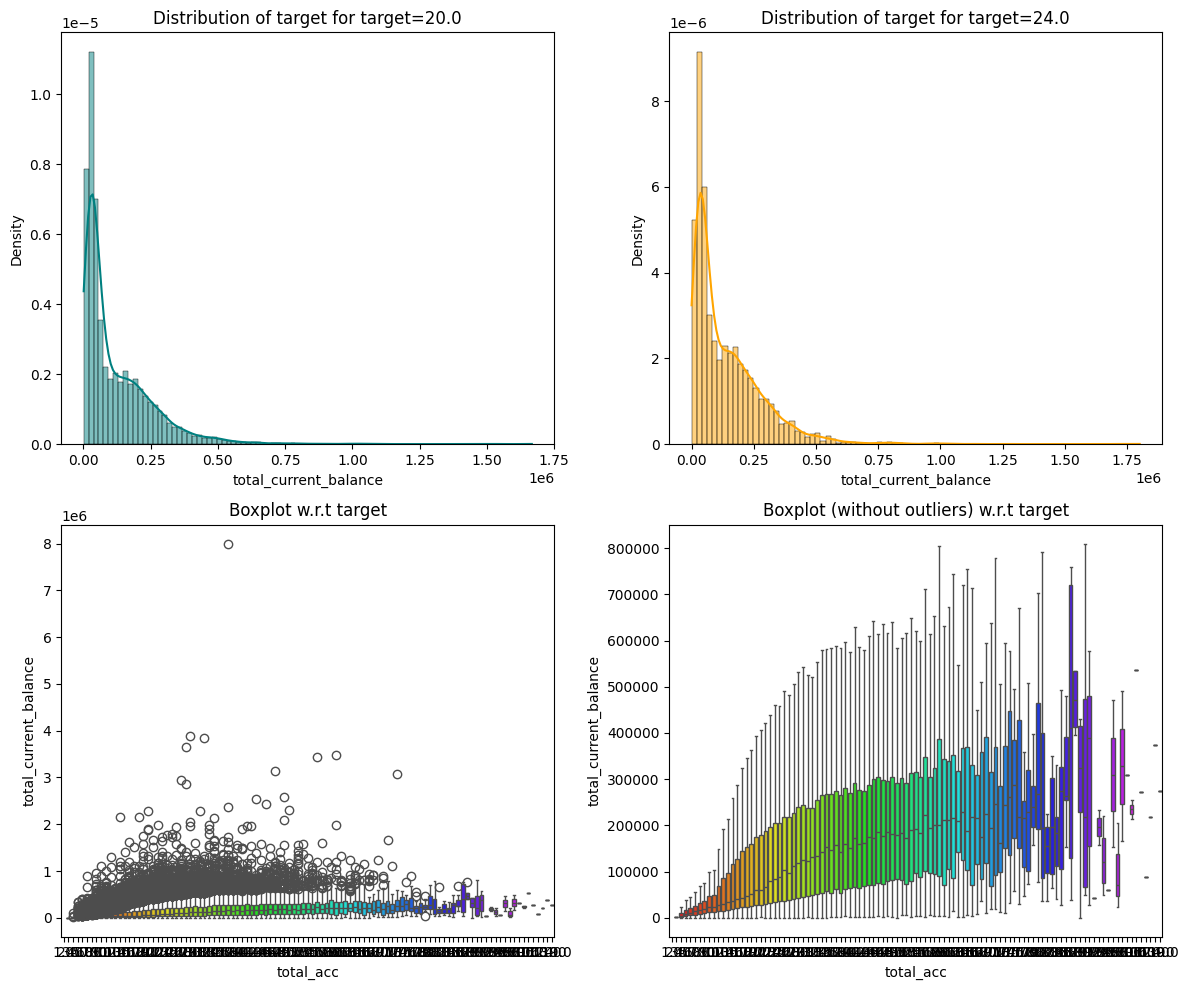

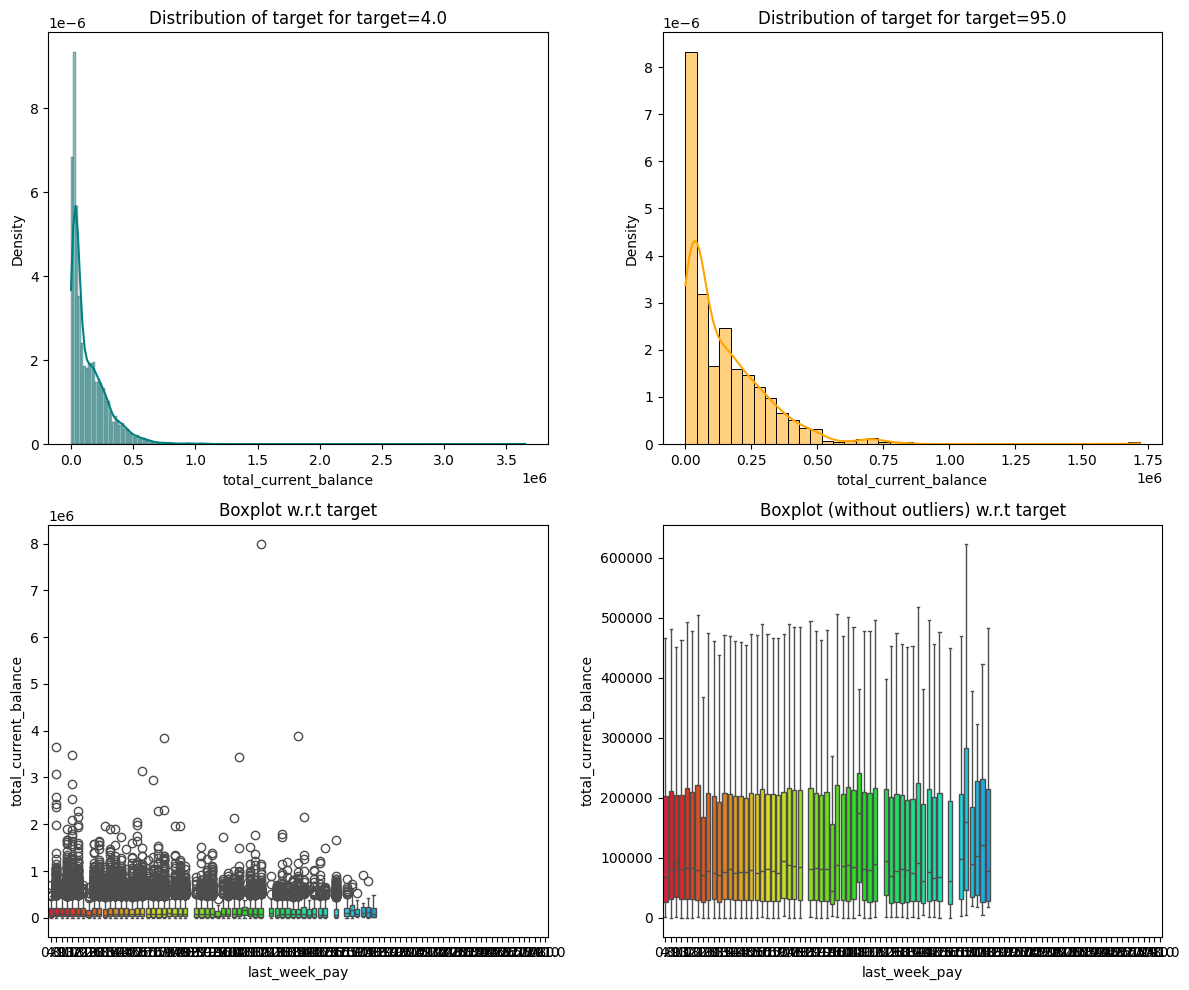

In [ ]:
for feature in select_columns:
    distribution_plot_wrt_target(data, "total_current_balance", feature)

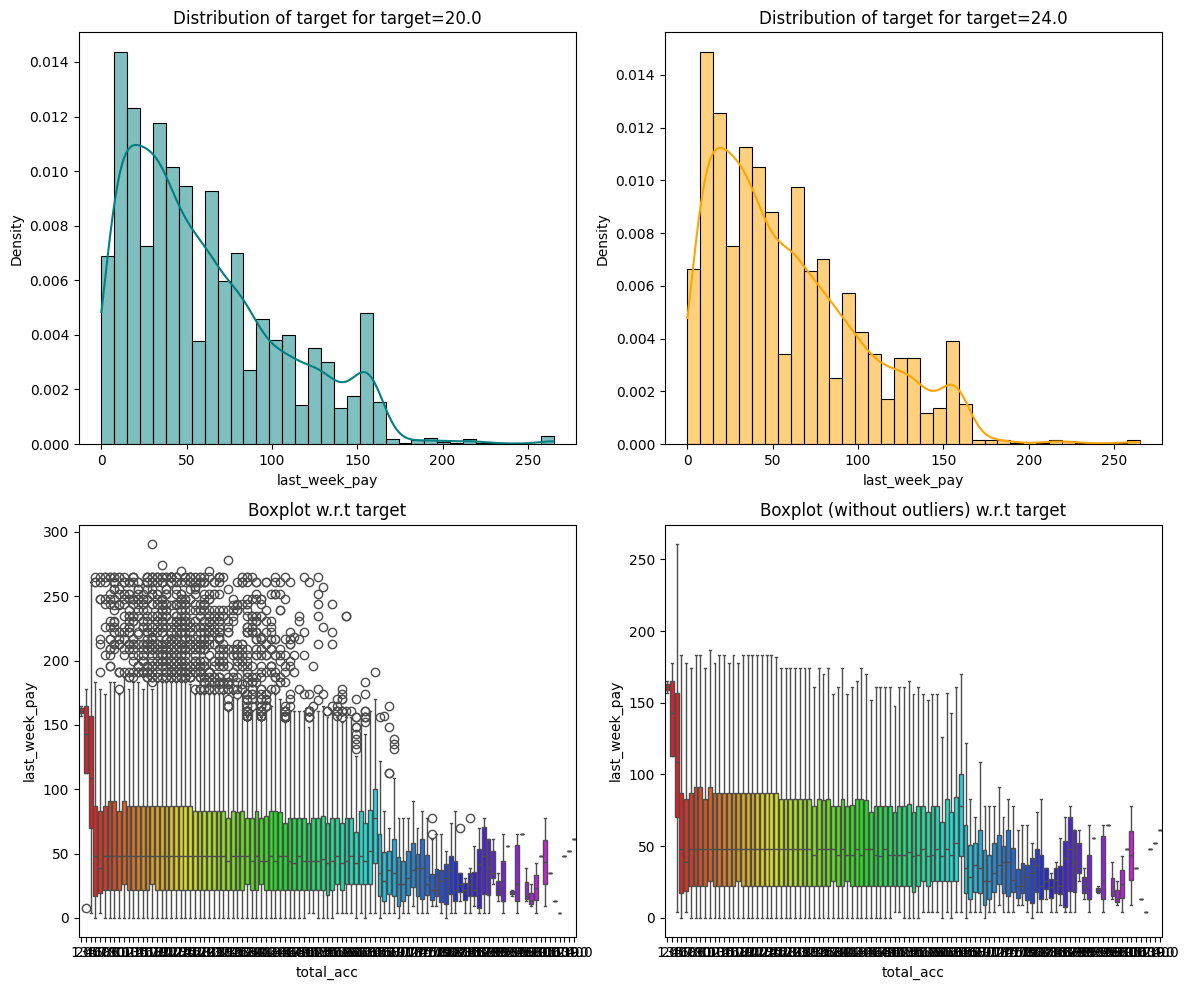

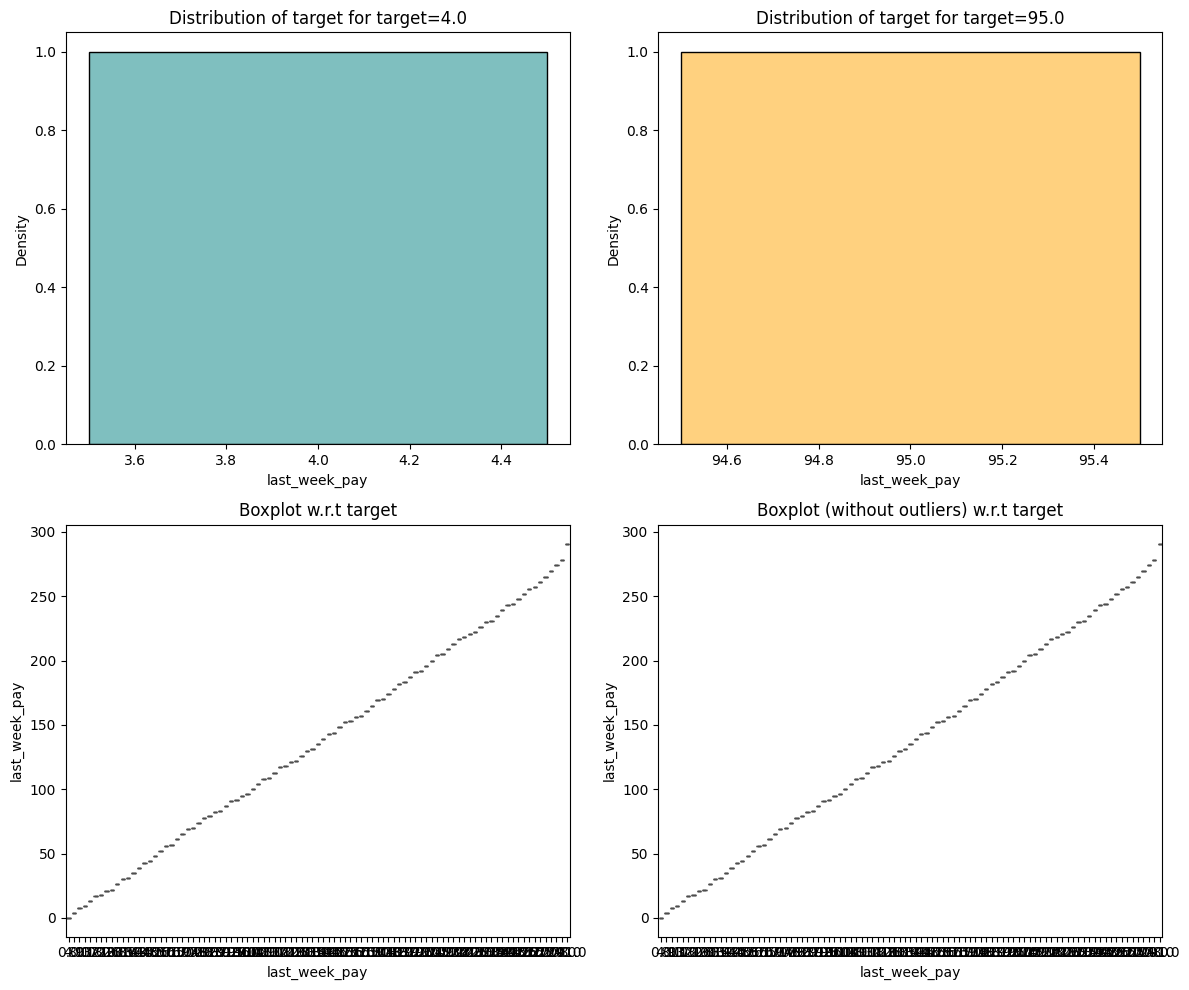

In [ ]:
for feature in select_columns:
    distribution_plot_wrt_target(data, "last_week_pay", feature)

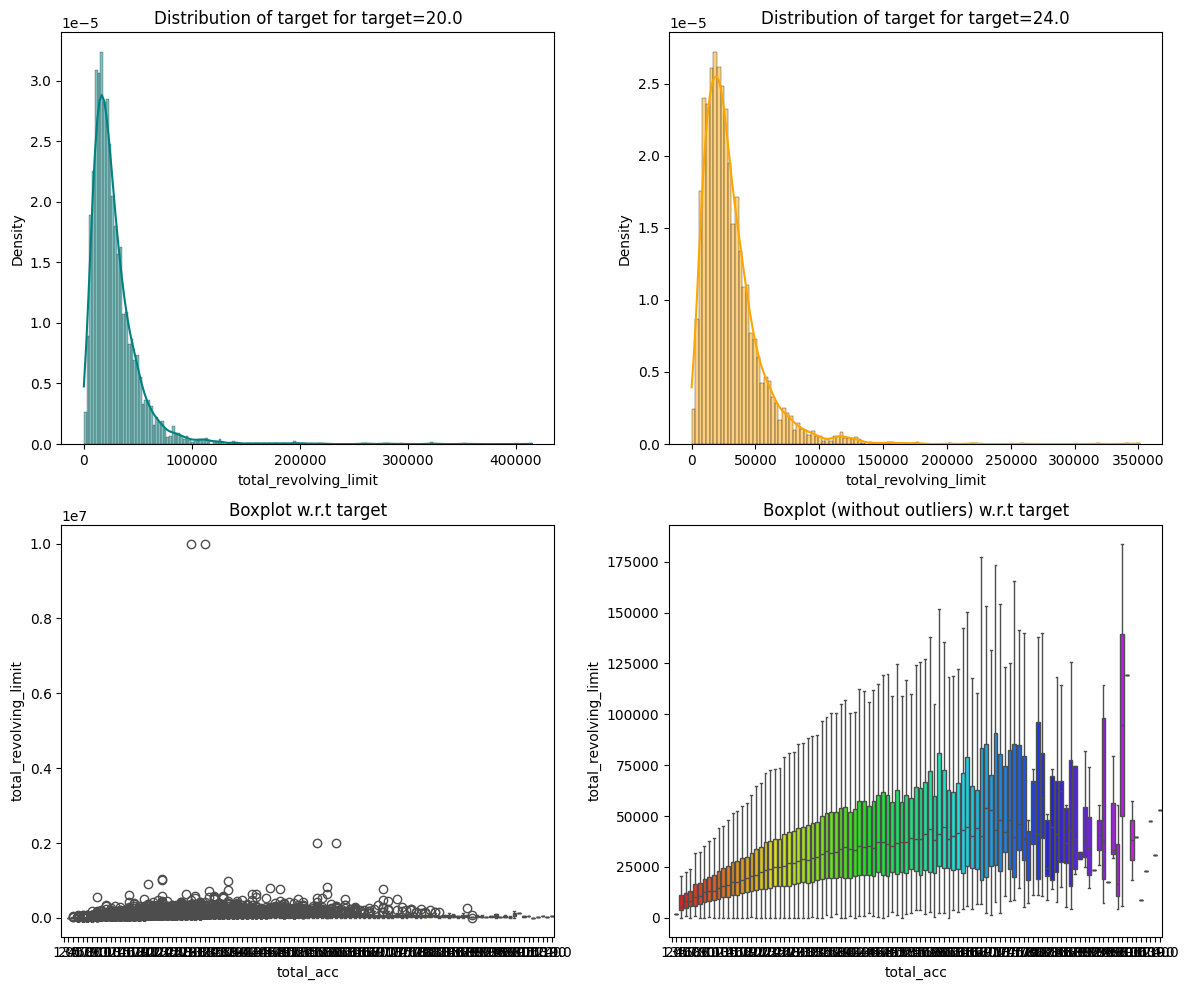

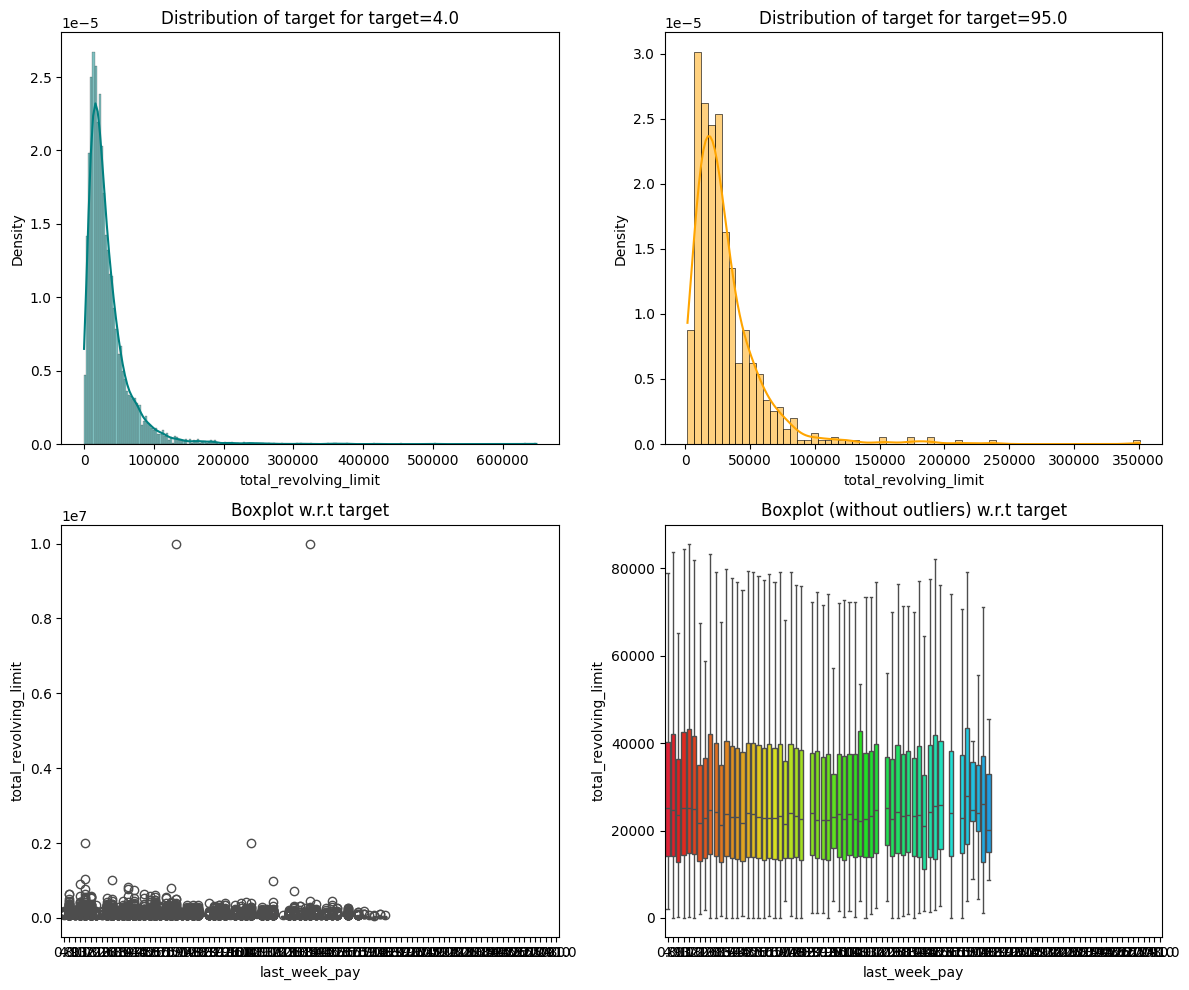

In [ ]:
for feature in select_columns:
    distribution_plot_wrt_target(data, "total_revolving_limit", feature)

In [ ]:
data['delinq_2yrs'] = data.groupby(["loan_amnt","revolving_balance","interest_receive"])['delinq_2yrs'].transform(lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else np.nan))
data['public_records'] = data.groupby(["loan_amnt","revolving_balance","interest_receive"])['public_records'].transform(lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else np.nan))
data['total_acc'] = data.groupby(["annual_income","debt_to_income"])['total_acc'].transform('median')
data['total_current_balance'] = data.groupby(["total_acc" ,"loan_term","home_ownership"])['total_current_balance'].transform('median')
data['total_revolving_limit'] = data.groupby(["total_acc","application_type","home_ownership"])['total_revolving_limit'].transform('median')
data['last_week_pay'] = data.groupby(["application_type","public_records"])['last_week_pay'].transform('median')

In [ ]:
data.isnull().sum()

ID                                0
loan_amnt                         0
loan_term                         0
interest_rate                     0
loan_grade                        0
loan_subgrade                     0
job_experience                    0
home_ownership                    0
annual_income                     0
income_verification_status        0
loan_purpose                      0
state_code                        0
debt_to_income                    0
delinq_2yrs                       2
public_records                    2
revolving_balance                 0
total_acc                         2
interest_receive                  0
application_type                  0
last_week_pay                     3
total_current_balance            24
total_revolving_limit            22
default                       39933
dtype: int64

In [ ]:
data['delinq_2yrs'] = data.groupby(["loan_amnt", "revolving_balance"])['delinq_2yrs'].transform(lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else np.nan))
data['public_records'] = data.groupby(["loan_amnt", "revolving_balance"])['public_records'].transform(lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else np.nan))
data['total_acc'] = data.groupby(["annual_income"])['total_acc'].transform('median')
data['last_week_pay'] = data.groupby(["public_records"])['last_week_pay'].transform('median')
data['total_current_balance'] = data.groupby(["total_acc" ,"loan_term"])['total_current_balance'].transform('median')
data['total_revolving_limit'] = data.groupby(["total_acc","application_type"])['total_revolving_limit'].transform('median')

In [ ]:
data.isnull().sum()

ID                                0
loan_amnt                         0
loan_term                         0
interest_rate                     0
loan_grade                        0
loan_subgrade                     0
job_experience                    0
home_ownership                    0
annual_income                     0
income_verification_status        0
loan_purpose                      0
state_code                        0
debt_to_income                    0
delinq_2yrs                       0
public_records                    0
revolving_balance                 0
total_acc                         0
interest_receive                  0
application_type                  0
last_week_pay                     1
total_current_balance             0
total_revolving_limit             0
default                       39933
dtype: int64

In [ ]:
data[data["last_week_pay"].isnull()]

ID  loan_amnt  loan_term  interest_rate loan_grade  \
132878  72838143      12000          3         11.990          C   

       loan_subgrade job_experience home_ownership  annual_income  \
132878            C1       <5 Years           RENT      60000.000   

       income_verification_status        loan_purpose state_code  \
132878            Source Verified  debt_consolidation         OR   

        debt_to_income  delinq_2yrs  public_records  revolving_balance  \
132878          14.120        0.000          23.000               4858   

        total_acc  interest_receive application_type  last_week_pay  \
132878     23.000             0.000       INDIVIDUAL            NaN   

        total_current_balance  total_revolving_limit  default  
132878              51579.000              23300.000      NaN

In [ ]:
data['last_week_pay'] = data.groupby(["application_type"])['last_week_pay'].transform('median')

In [ ]:
data.isnull().sum()

ID                                0
loan_amnt                         0
loan_term                         0
interest_rate                     0
loan_grade                        0
loan_subgrade                     0
job_experience                    0
home_ownership                    0
annual_income                     0
income_verification_status        0
loan_purpose                      0
state_code                        0
debt_to_income                    0
delinq_2yrs                       0
public_records                    0
revolving_balance                 0
total_acc                         0
interest_receive                  0
application_type                  0
last_week_pay                     0
total_current_balance             0
total_revolving_limit             0
default                       39933
dtype: int64

In [ ]:
replaceStruct = {
                "loan_grade":     {"G": 1, "F": 2, "E": 3, "D": 4, "C": 5, "B": 6, "A": 7},
                "loan_subgrade": {"G5": 1, "G4": 2, "G3": 3, "G2": 4, "G1": 5, "F5": 6, "F4": 7, "F3": 8, "F2": 9, "F1": 10, "E5": 11, "E4": 12, "E3": 13, "E2": 14, "E1": 15, "D5": 16, "D4": 17, "D3": 18, "D2": 19, "D1": 20, "C5": 21, "C4": 22, "C3": 23, "C2": 24, "C1": 25, "B5": 26, "B4": 27, "B3": 28, "B2": 29, "B1": 30, "A5": 31, "A4": 32, "A3": 33, "A2": 34, "A1": 35},
                 "job_experience": {"<5 Years": 1, "6-10 years":2 , "10+ years": 3},
                 "income_verification_status":     {"Verified": 1, "Source Verified": 2 ,"Not Verified": -1}
                    }
oneHotCols=["home_ownership","loan_purpose","state_code","application_type"]


In [ ]:
data=data.replace(replaceStruct)
data=pd.get_dummies(data, columns=oneHotCols)
data = data.apply(pd.to_numeric, errors="coerce")
data.head(10)

ID  loan_amnt  loan_term  interest_rate  loan_grade  loan_subgrade  \
0  72199369       9000          3          9.170           6             29   
1  14257956      18000          3         13.650           5             25   
2  66216451      16000          3          7.260           7             32   
3  46974169      25000          3         13.990           5             22   
4  46725961      17000          3          6.390           7             34   
5  56469197      10000          3         12.690           5             24   
6   3409695      15000          3         11.140           6             29   
7  26276447      10000          3          6.490           7             34   
8  48393405      12000          3         10.990           6             27   
9  15140624       7000          3         12.490           6             27   

   job_experience  annual_income  income_verification_status  debt_to_income  \
0               1      85000.000                          -1          26.680   
1               1      64000.000                           1          31.670   
2               1     150000.000                           2          19.700   
3               1      59800.000                           1          37.390   
4               3      72000.000                           2           8.920   
5               1      56000.000                          -1          16.160   
6               3     100000.000                          -1          10.510   
7               3     109000.000                          -1          10.840   
8               1      45000.000                           1           8.210   
9               1      53000.000                          -1          18.840   

   delinq_2yrs  public_records  revolving_balance  total_acc  \
0        0.000           0.000              39519     26.500   
1        0.000           1.000               9783     24.000   
2        2.000           0.000              13641     28.000   
3        0.000           0.000              35020     30.500   
4        0.000           0.000              23990     25.000   
5        0.000           1.000               6643     23.000   
6        0.000           1.000              14088     26.500   
7        1.000           0.000              12337     28.500   
8        0.000           0.000              10550     21.000   
9        0.000           0.000              12108     23.000   

   interest_receive  last_week_pay  total_current_balance  \
0            59.600         48.000             154322.000   
1          3348.250         48.000              81526.000   
2           276.690         48.000             164771.000   
3          1106.720         48.000             184117.000   
4           725.290         48.000             130985.000   
5           590.500         48.000              51579.000   
6          1020.570         48.000             154322.000   
7           728.680         48.000             169074.000   
8           879.150         48.000              38434.500   
9          1186.800         48.000              51579.000   

   total_revolving_limit  default  home_ownership_MORTGAGE  \
0              26800.000    0.000                        0   
1              24550.000    0.000                        0   
2              27700.000    0.000                        1   
3              29800.000    0.000                        1   
4              26100.000    0.000                        1   
5              23300.000    0.000                        0   
6              26800.000    1.000                        0   
7              28000.000    0.000                        1   
8              21750.000    0.000                        0   
9              23300.000    0.000                        1   

   home_ownership_NONE  home_ownership_OTHER  home_ownership_OWN  \
0                    0                     0                   1   
1                    0                     0                  

In [ ]:
# Dividing train data into X and y
X = data.drop(["default"], axis=1)
X = X[X['ID'].isin(train_data['ID'])]
y = data[data['ID'].isin(train_data['ID'])]["default"]

In [ ]:
# Assigning X_test
X_test = data.drop(["default"], axis=1)
X_test = X_test[X_test['ID'].isin(test_data['ID'])]

In [ ]:
X = X.drop(columns=['ID'])
X_test = X_test.drop(columns=['ID'])

In [ ]:
# Splitting train dataset into training and validation set

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.25, random_state=1, stratify=y
) ## Complete the code to split the train dataset into train test in the ratio 75:25

In [ ]:
# Checking the number of rows and columns in the X_train data
print("Train: ", X_train.shape) ##  Complete the code to view dimensions of the X_train data

# Checking the number of rows and columns in the X_val data
print("Validation: ",X_val.shape) ##  Complete the code to view dimensions of the X_val data

Train:  (69879, 78)
Validation:  (23294, 78)


In [ ]:
# Checking the number of rows and columns in the X_test data
print("Test: ", X_test.shape) ##  Complete the code to view dimensions of the X_test data

Test:  (39933, 78)


In [ ]:
# Checking that no column has missing values in train or test sets
print("Train:\n")
print(X_train.isna().sum())
print("-" * 30)

print("Validation:\n")
print(X_val.isna().sum()) ## Complete the code to check the count of missing values in validation set
print("-" * 30)

print("Test:\n")
print(X_test.isna().sum()) ## Complete the code to check the count of missing values in test set
print("-" * 30)

Train:

loan_amnt                          0
loan_term                          0
interest_rate                      0
loan_grade                         0
loan_subgrade                      0
job_experience                     0
annual_income                      0
income_verification_status         0
debt_to_income                     0
delinq_2yrs                        0
public_records                     0
revolving_balance                  0
total_acc                          0
interest_receive                   0
last_week_pay                      0
total_current_balance              0
total_revolving_limit              0
home_ownership_MORTGAGE            0
home_ownership_NONE                0
home_ownership_OTHER               0
home_ownership_OWN                 0
home_ownership_RENT                0
loan_purpose_credit_card           0
loan_purpose_debt_consolidation    0
loan_purpose_home_improvement      0
loan_purpose_other                 0
state_code_AK                 

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1
        },
        index=[0],
    )

    return df_perf

In [ ]:
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.accuracy_score)

In [ ]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Logistic regression", LogisticRegression(random_state=1)))
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
models.append(("dtree", DecisionTreeClassifier(random_state=1))) ## Complete the code to append remaining 4 models in the list models

results1 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation performance on training dataset:" "\n")

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring=scorer, cv=kfold
    )
    results1.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Cross-Validation performance on training dataset:

Logistic regression: 0.7603571827195713
Bagging: 0.7892357017857344
Random forest: 0.7815653084818031
GBM: 0.7848853593126167
Adaboost: 0.7700024411897524
Xgboost: 0.8208475403272464
dtree: 0.7303910849470547

Validation Performance:

Logistic regression: 0.004519161243673174
Bagging: 0.3138105567606652
Random forest: 0.16992046276211134
GBM: 0.1688358640636298
Adaboost: 0.1332248734634852
Xgboost: 0.43998553868402024
dtree: 0.44143167028199565


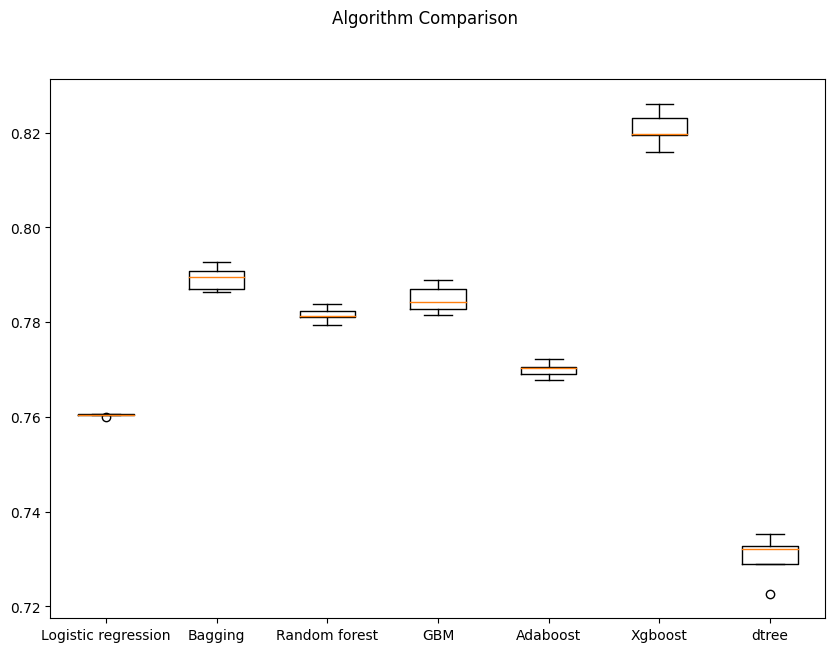

In [ ]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results1)
ax.set_xticklabels(names)

plt.show()

In [ ]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

# Synthetic Minority Over Sampling Technique
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After OverSampling, counts of label '1': {}".format(sum(y_train_over == 1)))
print("After OverSampling, counts of label '0': {} \n".format(sum(y_train_over == 0)))


print("After OverSampling, the shape of train_X: {}".format(X_train_over.shape))
print("After OverSampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before OverSampling, counts of label '1': 16596
Before OverSampling, counts of label '0': 53283 

After OverSampling, counts of label '1': 53283
After OverSampling, counts of label '0': 53283 

After OverSampling, the shape of train_X: (106566, 78)
After OverSampling, the shape of train_y: (106566,) 



In [ ]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Logistic regression", LogisticRegression(random_state=1)))
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
models.append(("dtree", DecisionTreeClassifier(random_state=1))) ## Complete the code to append remaining 4 models in the list models

results1 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation performance on training dataset:" "\n")

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train_over, y=y_train_over, scoring=scorer, cv=kfold
    )  ## Complete the code to build models on oversampled data
    results1.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_over,y_train_over)## Complete the code to build models on oversampled data
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Cross-Validation performance on training dataset:

Logistic regression: 0.6021619305698999
Bagging: 0.8224293086082681
Random forest: 0.8486009014441919
GBM: 0.8265394567397296
Adaboost: 0.803511491771894
Xgboost: 0.8624608631218267
dtree: 0.7749094820765986

Validation Performance:

Logistic regression: 0.6388286334056399
Bagging: 0.2725958062183659
Random forest: 0.21330441070137382
GBM: 0.24638467100506145
Adaboost: 0.27892263195950834
Xgboost: 0.3732827187274042
dtree: 0.39949385394070863


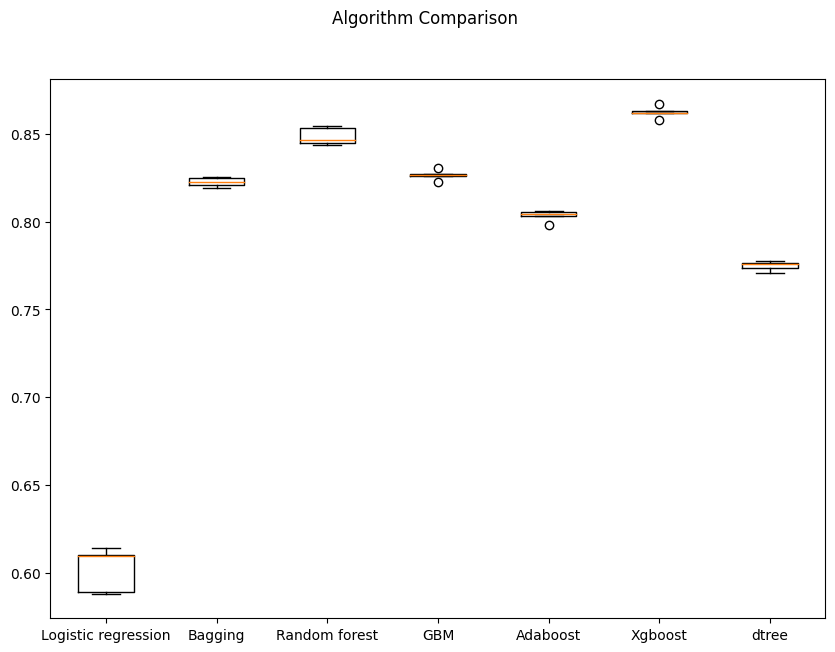

In [ ]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results1)
ax.set_xticklabels(names)

plt.show() ## Write the code to create boxplot to check model performance on oversampled data

In [ ]:
rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)


print("Before UnderSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before UnderSampling, counts of label '0': {} \n".format(sum(y_train == 0)))


print("After UnderSampling, counts of label '1': {}".format(sum(y_train_un == 1)))
print("After UnderSampling, counts of label '0': {} \n".format(sum(y_train_un == 0)))


print("After UnderSampling, the shape of train_X: {}".format(X_train_un.shape))
print("After UnderSampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before UnderSampling, counts of label '1': 16596
Before UnderSampling, counts of label '0': 53283 

After UnderSampling, counts of label '1': 16596
After UnderSampling, counts of label '0': 16596 

After UnderSampling, the shape of train_X: (33192, 78)
After UnderSampling, the shape of train_y: (33192,) 



In [ ]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Logistic regression", LogisticRegression(random_state=1)))
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
models.append(("dtree", DecisionTreeClassifier(random_state=1))) ## Complete the code to append remaining 4 models in the list models

results1 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation performance on training dataset:" "\n")

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train_un, y=y_train_un, scoring=scorer, cv=kfold
    )  ## Complete the code to build models on undersampled data
    results1.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_un,y_train_un)## Complete the code to build models on undersampled data
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Cross-Validation performance on training dataset:

Logistic regression: 0.6065614315074932
Bagging: 0.6907389438389867
Random forest: 0.6962219877148195
GBM: 0.7121293545980205
Adaboost: 0.6889310841861759
Xgboost: 0.7537358177442715
dtree: 0.6358157973547438

Validation Performance:

Logistic regression: 0.6804049168474331
Bagging: 0.6319595083152567
Random forest: 0.6988430947216197
GBM: 0.7315618221258134
Adaboost: 0.7057122198120029
Xgboost: 0.7516268980477223
dtree: 0.6221981200289226


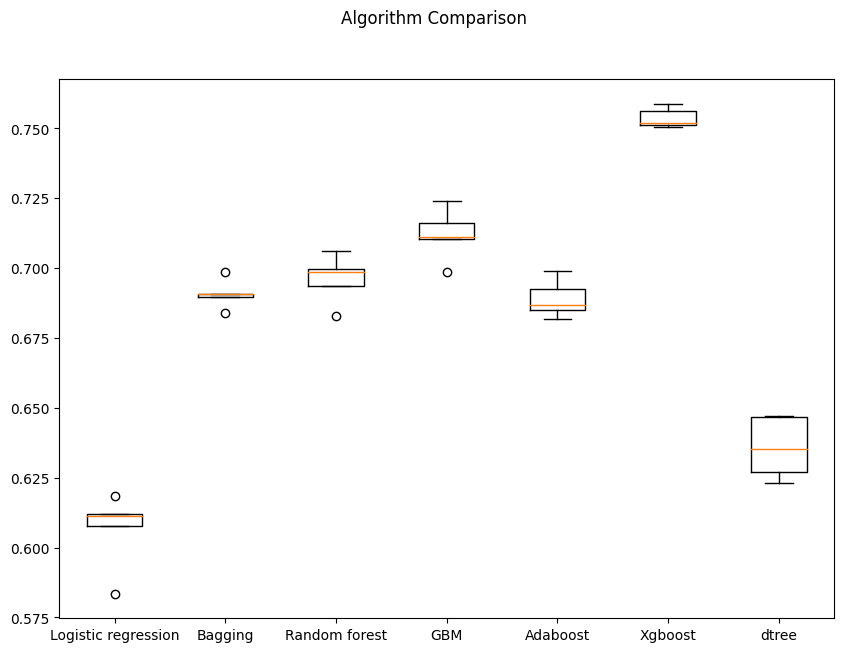

In [ ]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results1)
ax.set_xticklabels(names)

plt.show() ## Write the code to create boxplot to check model performance on undersampled data

In [87]:
%%time

# defining model
Model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": [100,150,200],
    "learning_rate": [0.2, 0.05],
    "base_estimator": [DecisionTreeClassifier(max_depth=1, random_state=1), DecisionTreeClassifier(max_depth=2, random_state=1), DecisionTreeClassifier(max_depth=3, random_state=1),
    ]
}


#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, n_jobs = -1, scoring=scorer, cv=5, random_state=1, verbose=2)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over,y_train_over) ## Complete the code to fit the model on over sampled data

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best parameters are {'n_estimators': 200, 'learning_rate': 0.2, 'base_estimator': DecisionTreeClassifier(max_depth=3, random_state=1)} with CV score=0.8218877752581586:
CPU times: user 2min 29s, sys: 7.39 s, total: 2min 37s
Wall time: 1h 4min 6s


In [88]:
# Creating new pipeline with best parameters
tuned_ada = AdaBoostClassifier(
    n_estimators= 200, learning_rate= 0.2, base_estimator= DecisionTreeClassifier(max_depth=3, random_state=1)
) ## Complete the code with the best parameters obtained from tuning

tuned_ada.fit(X_train_over,y_train_over) ## Complete the code to fit the model on oversampled data

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         random_state=1),
                   learning_rate=0.2, n_estimators=200)

In [89]:
ada_train_perf = model_performance_classification_sklearn(tuned_ada, X_train_over, y_train_over)
ada_train_perf

Accuracy  Recall  Precision    F1
0     0.868   0.799      0.926 0.858

In [90]:
ada_val_perf = model_performance_classification_sklearn(tuned_ada, X_val,y_val) ## Complete the code to check the performance on validation set
ada_val_perf

Accuracy  Recall  Precision    F1
0     0.796   0.374      0.615 0.465

In [91]:
%%time

# defining model
Model = RandomForestClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": [200,250,300],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)}


#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un) ## Complete the code to fit the model on under sampled data

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 300, 'min_samples_leaf': 2, 'max_samples': 0.6, 'max_features': 'sqrt'} with CV score=0.6994454191886386:
CPU times: user 29.5 s, sys: 2.37 s, total: 31.8 s
Wall time: 18min 53s


In [92]:
# Creating new pipeline with best parameters
tuned_rf2 = RandomForestClassifier(
    max_features='sqrt',
    random_state=1,
    max_samples=0.6,
    n_estimators=300,
    min_samples_leaf=2,
)## Complete the code with the best parameters obtained from tuning

tuned_rf2.fit(X_train_un,y_train_un) ## Complete the code to fit the model on under sampled data

RandomForestClassifier(max_samples=0.6, min_samples_leaf=2, n_estimators=300,
                       random_state=1)

In [93]:
rf2_train_perf = model_performance_classification_sklearn(tuned_rf2, X_train_un,y_train_un) ## Complete the code to check the performance on undersampled train set
rf2_train_perf

Accuracy  Recall  Precision    F1
0     0.934   0.939      0.929 0.934

In [94]:
rf2_val_perf = model_performance_classification_sklearn(tuned_rf2, X_val,y_val) ## Complete the code to check the performance on validation set
rf2_val_perf

Accuracy  Recall  Precision    F1
0     0.687   0.712      0.409 0.519

In [95]:
%%time

# defining model
Model = GradientBoostingClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid={"n_estimators": np.arange(100,150,25), "learning_rate": [0.2, 0.05, 1], "subsample":[0.5,0.7], "max_features":[0.5,0.7]}

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, scoring=scorer, n_iter=50, n_jobs = -1, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over, y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.7, 'n_estimators': 125, 'max_features': 0.7, 'learning_rate': 1} with CV score=0.8338612647928485:
CPU times: user 57.4 s, sys: 4.41 s, total: 1min 1s
Wall time: 32min 50s


In [96]:
# Creating new pipeline with best parameters
tuned_gbm = GradientBoostingClassifier(
    max_features=0.7,
    random_state=1,
    learning_rate=1,
    n_estimators=125,
    subsample=0.7,
)## Complete the code with the best parameters obtained from tuning

tuned_gbm.fit(X_train_over, y_train_over)

GradientBoostingClassifier(learning_rate=1, max_features=0.7, n_estimators=125,
                           random_state=1, subsample=0.7)

In [97]:
gbm_train_perf = model_performance_classification_sklearn(tuned_gbm, X_train_over, y_train_over) ## Complete the code to check the performance on oversampled train set
gbm_train_perf

Accuracy  Recall  Precision    F1
0     0.872   0.822      0.914 0.866

In [98]:
gbm_val_perf = model_performance_classification_sklearn(tuned_gbm, X_val,y_val) ## Complete the code to check the performance on validation set
gbm_val_perf

Accuracy  Recall  Precision    F1
0     0.783   0.385      0.565 0.458

In [99]:
%%time

# defining model
Model = XGBClassifier(random_state=1,eval_metric='logloss')

#Parameter grid to pass in RandomSearchCV
param_grid={'n_estimators':[150,200,250],'scale_pos_weight':[5,10], 'learning_rate':[0.1,0.2], 'gamma':[0,3,5], 'subsample':[0.8,0.9]}

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over, y_train_over) ## Complete the code to fit the model on over sampled data

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.8, 'scale_pos_weight': 5, 'n_estimators': 250, 'learning_rate': 0.2, 'gamma': 5} with CV score=0.7880945526451216:
CPU times: user 26.7 s, sys: 2.47 s, total: 29.2 s
Wall time: 18min 18s


In [101]:
xgb2 = XGBClassifier(
    random_state=1,
    eval_metric="logloss",
    subsample=0.8,
    scale_pos_weight=5,
    n_estimators=250,
    learning_rate=0.2,
    gamma=0,
)## Complete the code with the best parameters obtained from tuning

xgb2.fit(X_train_over, y_train_over) ## Complete the code to fit the model on over sampled data

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=0, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.2, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=250,
              n_jobs=None, num_parallel_tree=None, random_state=1, ...)

In [102]:
xgb2_train_perf =  model_performance_classification_sklearn(xgb2, X_train_over, y_train_over)## Complete the code to check the performance on oversampled train set
xgb2_train_perf

Accuracy  Recall  Precision    F1
0     0.855   0.981      0.784 0.871

In [103]:
xgb2_val_perf =  model_performance_classification_sklearn(xgb2, X_val,y_val) ## Complete the code to check the performance on validation set
xgb2_val_perf

Accuracy  Recall  Precision    F1
0     0.697   0.789      0.426 0.553

In [104]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        gbm_train_perf.T,
        ada_train_perf.T,
        rf2_train_perf.T,
        xgb2_train_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Gradient Boosting tuned with oversampled data",
    "AdaBoost classifier tuned with oversampled data",
    "Random forest tuned with undersampled data",
    "XGBoost tuned with oversampled data",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Gradient Boosting tuned with oversampled data  \
Accuracy                                           0.872   
Recall                                             0.822   
Precision                                          0.914   
F1                                                 0.866   

           AdaBoost classifier tuned with oversampled data  \
Accuracy                                             0.868   
Recall                                               0.799   
Precision                                            0.926   
F1                                                   0.858   

           Random forest tuned with undersampled data  \
Accuracy                                        0.934   
Recall                                          0.939   
Precision                                       0.929   
F1                                              0.934   

           XGBoost tuned with oversampled data  
Accuracy                                 0.855  
Recall                                   0.981  
Precision                                0.784  
F1                                       0.871

In [105]:
# validation performance comparison

models_val_comp_df = pd.concat(
    [
        gbm_val_perf.T,
        ada_val_perf.T,
        rf2_val_perf.T,
        xgb2_val_perf.T,
    ],
    axis=1,
)
models_val_comp_df.columns = [
    "Gradient Boosting tuned with oversampled data",
    "AdaBoost classifier tuned with oversampled data",
    "Random forest tuned with undersampled data",
    "XGBoost tuned with oversampled data",
]
print("Validation performance comparison:")
models_val_comp_df ## Write the code to compare the performance on validation set

Validation performance comparison:


Gradient Boosting tuned with oversampled data  \
Accuracy                                           0.783   
Recall                                             0.385   
Precision                                          0.565   
F1                                                 0.458   

           AdaBoost classifier tuned with oversampled data  \
Accuracy                                             0.796   
Recall                                               0.374   
Precision                                            0.615   
F1                                                   0.465   

           Random forest tuned with undersampled data  \
Accuracy                                        0.687   
Recall                                          0.712   
Precision                                       0.409   
F1                                              0.519   

           XGBoost tuned with oversampled data  
Accuracy                                 0.697  
Recall                                   0.789  
Precision                                0.426  
F1                                       0.553

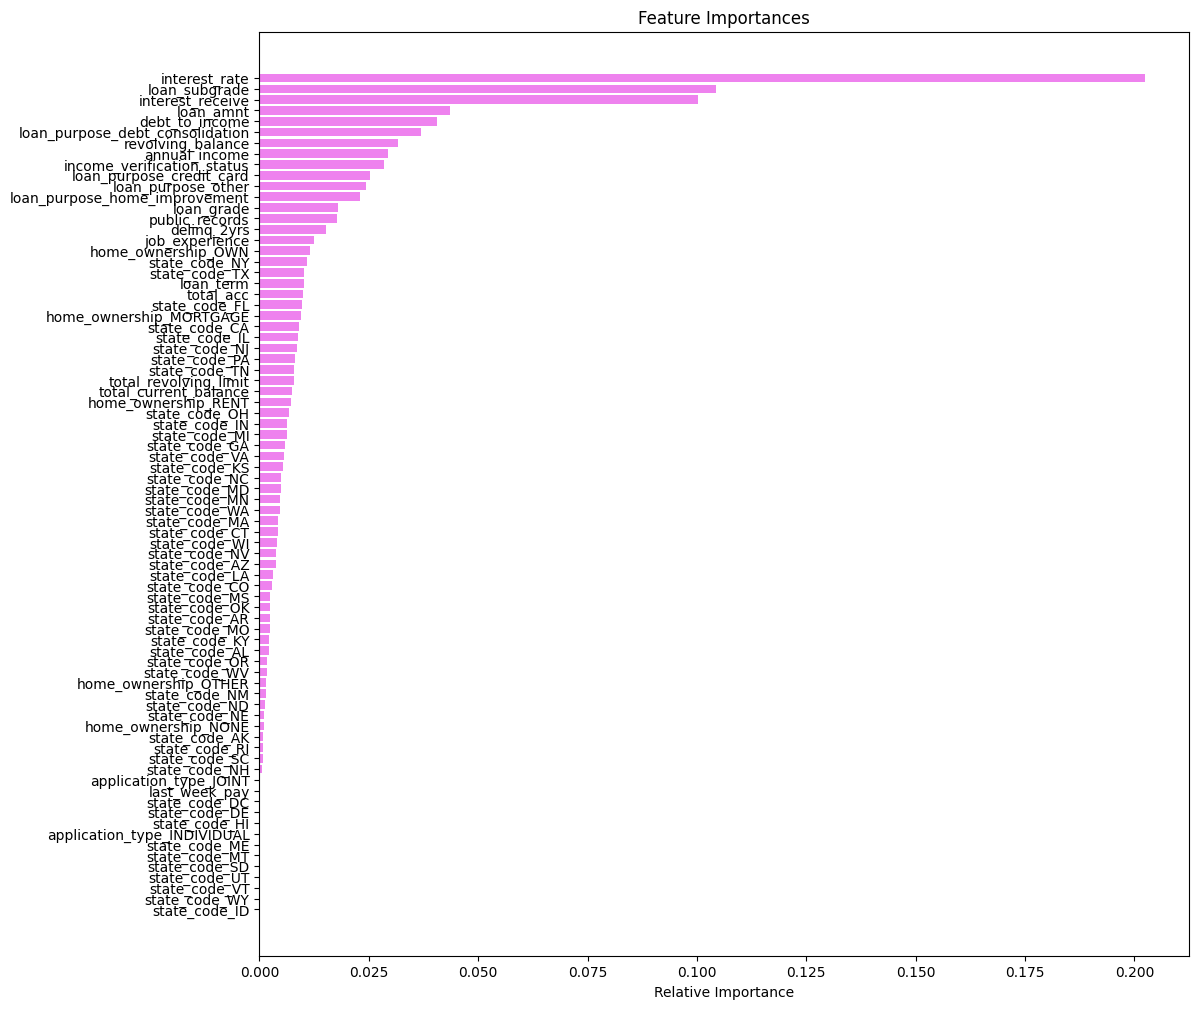

In [106]:
feature_names = X_train.columns
importances =  tuned_ada.feature_importances_ ## Complete the code to check the feature importance of the best model
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

In [108]:
predictions = pd.DataFrame()
predictions["ID"] = test_data["ID"]
predictions["default"] = tuned_ada.predict(X_test)
predictions[['ID', 'default']].to_csv('/content/drive/MyDrive/Python Course/Hackathons/NBFC Loan Default/NBFC_Loan_Default_Ariel_Sama_2.csv', index=False)

In [109]:
predictions.shape

(39933, 2)